In [1]:
# 데이터 전처리
import pandas as pd
import numpy as np
import scipy.stats as ss
import random
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝
import sklearn
from sklearn import metrics, datasets
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.tree import export_graphviz, DecisionTreeClassifier
import pydotplus
from IPython.display import Image

# 포트폴리오 최적화
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# waring 제거
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 불러오기
data = pd.read_excel('신한dataset.xlsx',header=5)
data.set_index('Name',inplace=True)
data

Symbol  PER(배)  PBR(배)  배당수익률(보통주,현금+주식)(%) 영업이익증가율(전년동기)(%)   
Name                                                                        
삼성전자        A005930    6.86    1.09                 2.61           -15.99  \
LG에너지솔루션    A373220  131.71    5.44                  NaN            57.94   
SK하이닉스      A000660   24.49    0.83                 1.60           -45.13   
삼성바이오로직스    A207940   72.07    6.50                  NaN            83.07   
LG화학        A051910   25.45    1.49                 1.67            -40.4   
...             ...     ...     ...                  ...              ...   
키움제6호스팩     A413600  653.39    1.05                  NaN               적지   
유진스팩9호      A442130     NaN    1.04                  NaN              NaN   
엔에이치스팩25호   A438580  126.13    1.20                  NaN              NaN   
하나금융20호스팩   A400560  215.99    1.10                  NaN               적지   
IBKS제17호스팩  A405350     NaN    1.22                  NaN               적지   

           영업이익증가율(3년평균)(%)  수익률 (현금배당반영,3개월)(%)  수익률 (현금배당반영,12개월)(%)   
Name                                                                     
삼성전자                  16.03                 5.03                  1.62  \
LG에너지솔루션                NaN                 2.20                 38.98   
SK하이닉스                 35.8                -6.22                -16.31   
삼성바이오로직스             120.51                -3.43                 -0.76   
LG화학                  53.68                 8.04                 41.93   
...                     ...                  ...                   ...   
키움제6호스팩                 NaN                 6.80                -19.27   
유진스팩9호                  NaN                 3.88                   NaN   
엔에이치스팩25호               NaN                 2.41                   NaN   
하나금융20호스팩               NaN                 4.87                 -2.43   
IBKS제17호스팩              NaN                 3.52                  5.06   

            순매수대금(기관/외국인계)(20일합산)(만원) ROE(영업이익)(%)  시가총액 (보통-상장예정주식수 포함)(백만원)   
Name                                                                            
삼성전자                      227727546.0        13.15                  393408670  \
LG에너지솔루션                   -6248190.0         8.27                  130572000   
SK하이닉스                     39752554.0        10.85                   64573810   
삼성바이오로직스                     743676.0        14.08                   56085112   
LG화학                      -23948508.0         9.87                   51250041   
...                               ...          ...                        ...   
키움제6호스팩                        6382.0        -1.54                       7546   
유진스팩9호                        -2944.0          NaN                       7404   
엔에이치스팩25호                     -9484.0          NaN                       7067   
하나금융20호스팩                         0.0        -0.66                       9638   
IBKS제17호스팩                     1856.0        -3.44                       6406   

           부채비율(%)  
Name                
삼성전자         26.41  
LG에너지솔루션     85.98  
SK하이닉스       64.12  
삼성바이오로직스     84.56  
LG화학         81.35  
...            ...  
키움제6호스팩      17.86  
유진스팩9호       15.45  
엔에이치스팩25호     7.21  
하나금융20호스팩    15.35  
IBKS제17호스팩   15.38  

[2433 rows x 12 columns]

In [3]:
# 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2433 entries, 삼성전자 to IBKS제17호스팩
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Symbol                     2433 non-null   object 
 1   PER(배)                     1592 non-null   float64
 2   PBR(배)                     2370 non-null   float64
 3   배당수익률(보통주,현금+주식)(%)        1168 non-null   float64
 4   영업이익증가율(전년동기)(%)           2366 non-null   object 
 5   영업이익증가율(3년평균)(%)           2311 non-null   object 
 6   수익률 (현금배당반영,3개월)(%)        2405 non-null   float64
 7   수익률 (현금배당반영,12개월)(%)       2314 non-null   float64
 8   순매수대금(기관/외국인계)(20일합산)(만원)  2396 non-null   float64
 9   ROE(영업이익)(%)               2366 non-null   object 
 10  시가총액 (보통-상장예정주식수 포함)(백만원)  2433 non-null   int64  
 11  부채비율(%)                    2411 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 247.1+ KB


In [4]:
# 열 추가 
new_data = data.copy() 
new_data['순매수강세'] = new_data['순매수대금(기관/외국인계)(20일합산)(만원)']/new_data['시가총액 (보통-상장예정주식수 포함)(백만원)']
new_data.drop(['순매수대금(기관/외국인계)(20일합산)(만원)','시가총액 (보통-상장예정주식수 포함)(백만원)'],axis=1, inplace=True)
new_data

Symbol  PER(배)  PBR(배)  배당수익률(보통주,현금+주식)(%) 영업이익증가율(전년동기)(%)   
Name                                                                        
삼성전자        A005930    6.86    1.09                 2.61           -15.99  \
LG에너지솔루션    A373220  131.71    5.44                  NaN            57.94   
SK하이닉스      A000660   24.49    0.83                 1.60           -45.13   
삼성바이오로직스    A207940   72.07    6.50                  NaN            83.07   
LG화학        A051910   25.45    1.49                 1.67            -40.4   
...             ...     ...     ...                  ...              ...   
키움제6호스팩     A413600  653.39    1.05                  NaN               적지   
유진스팩9호      A442130     NaN    1.04                  NaN              NaN   
엔에이치스팩25호   A438580  126.13    1.20                  NaN              NaN   
하나금융20호스팩   A400560  215.99    1.10                  NaN               적지   
IBKS제17호스팩  A405350     NaN    1.22                  NaN               적지   

           영업이익증가율(3년평균)(%)  수익률 (현금배당반영,3개월)(%)  수익률 (현금배당반영,12개월)(%)   
Name                                                                     
삼성전자                  16.03                 5.03                  1.62  \
LG에너지솔루션                NaN                 2.20                 38.98   
SK하이닉스                 35.8                -6.22                -16.31   
삼성바이오로직스             120.51                -3.43                 -0.76   
LG화학                  53.68                 8.04                 41.93   
...                     ...                  ...                   ...   
키움제6호스팩                 NaN                 6.80                -19.27   
유진스팩9호                  NaN                 3.88                   NaN   
엔에이치스팩25호               NaN                 2.41                   NaN   
하나금융20호스팩               NaN                 4.87                 -2.43   
IBKS제17호스팩              NaN                 3.52                  5.06   

           ROE(영업이익)(%) 부채비율(%)     순매수강세  
Name                                       
삼성전자              13.15   26.41  0.578857  
LG에너지솔루션           8.27   85.98 -0.047852  
SK하이닉스            10.85   64.12  0.615614  
삼성바이오로직스          14.08   84.56  0.013260  
LG화학               9.87   81.35 -0.467288  
...                 ...     ...       ...  
키움제6호스팩           -1.54   17.86  0.845746  
유진스팩9호              NaN   15.45 -0.397623  
엔에이치스팩25호           NaN    7.21 -1.342012  
하나금융20호스팩         -0.66   15.35  0.000000  
IBKS제17호스팩        -3.44   15.38  0.289728  

[2433 rows x 11 columns]

In [5]:
# # 데이터타입 object인 이유 확인
# # 영업이익증가율은 '흑전','적전'등이 포함되어 있어서

# # 각 데이터의 고유값들을 구하는
# print(new_data['부채비율(%)'].unique())
# print(new_data['ROE(영업이익)(%)'].unique())
# print(new_data['영업이익증가율(전년동기)(%)'].unique())
# print(new_data['영업이익증가율(3년평균)(%)'].unique())

In [6]:
new_data['부채비율(%)'].replace('N/A(IFRS)',np.nan,inplace=True)
new_data['ROE(영업이익)(%)'].replace('N/A(IFRS)',np.nan,inplace=True)
new_data['부채비율(%)'].replace('완전잠식',np.nan,inplace=True)
new_data['ROE(영업이익)(%)'].replace('완전잠식',np.nan,inplace=True)
new_data['부채비율(%)'].replace('N/A(IFRS)',np.nan,inplace=True)
new_data['ROE(영업이익)(%)'].replace('N/A(IFRS)',np.nan,inplace=True)
new_data['영업이익증가율(전년동기)(%)'].replace('적지',np.nan,inplace=True)
new_data['영업이익증가율(3년평균)(%)'].replace('적지',np.nan,inplace=True)
new_data['영업이익증가율(전년동기)(%)'].replace('흑전',np.nan,inplace=True)
new_data['영업이익증가율(3년평균)(%)'].replace('흑전',np.nan,inplace=True)
new_data['영업이익증가율(전년동기)(%)'].replace('적전',np.nan,inplace=True)
new_data['영업이익증가율(3년평균)(%)'].replace('적전',np.nan,inplace=True)
new_data['영업이익증가율(전년동기)(%)'].replace('N/A(IFRS)',np.nan,inplace=True)
new_data['영업이익증가율(3년평균)(%)'].replace('N/A(IFRS)',np.nan,inplace=True)

In [7]:
new_data

Symbol  PER(배)  PBR(배)  배당수익률(보통주,현금+주식)(%)  영업이익증가율(전년동기)(%)   
Name                                                                         
삼성전자        A005930    6.86    1.09                 2.61            -15.99  \
LG에너지솔루션    A373220  131.71    5.44                  NaN             57.94   
SK하이닉스      A000660   24.49    0.83                 1.60            -45.13   
삼성바이오로직스    A207940   72.07    6.50                  NaN             83.07   
LG화학        A051910   25.45    1.49                 1.67            -40.40   
...             ...     ...     ...                  ...               ...   
키움제6호스팩     A413600  653.39    1.05                  NaN               NaN   
유진스팩9호      A442130     NaN    1.04                  NaN               NaN   
엔에이치스팩25호   A438580  126.13    1.20                  NaN               NaN   
하나금융20호스팩   A400560  215.99    1.10                  NaN               NaN   
IBKS제17호스팩  A405350     NaN    1.22                  NaN               NaN   

            영업이익증가율(3년평균)(%)  수익률 (현금배당반영,3개월)(%)  수익률 (현금배당반영,12개월)(%)   
Name                                                                      
삼성전자                   16.03                 5.03                  1.62  \
LG에너지솔루션                 NaN                 2.20                 38.98   
SK하이닉스                 35.80                -6.22                -16.31   
삼성바이오로직스              120.51                -3.43                 -0.76   
LG화학                   53.68                 8.04                 41.93   
...                      ...                  ...                   ...   
키움제6호스팩                  NaN                 6.80                -19.27   
유진스팩9호                   NaN                 3.88                   NaN   
엔에이치스팩25호                NaN                 2.41                   NaN   
하나금융20호스팩                NaN                 4.87                 -2.43   
IBKS제17호스팩               NaN                 3.52                  5.06   

            ROE(영업이익)(%)  부채비율(%)     순매수강세  
Name                                         
삼성전자               13.15    26.41  0.578857  
LG에너지솔루션            8.27    85.98 -0.047852  
SK하이닉스             10.85    64.12  0.615614  
삼성바이오로직스           14.08    84.56  0.013260  
LG화학                9.87    81.35 -0.467288  
...                  ...      ...       ...  
키움제6호스팩            -1.54    17.86  0.845746  
유진스팩9호               NaN    15.45 -0.397623  
엔에이치스팩25호            NaN     7.21 -1.342012  
하나금융20호스팩          -0.66    15.35  0.000000  
IBKS제17호스팩         -3.44    15.38  0.289728  

[2433 rows x 11 columns]

In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2433 entries, 삼성전자 to IBKS제17호스팩
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Symbol                2433 non-null   object 
 1   PER(배)                1592 non-null   float64
 2   PBR(배)                2370 non-null   float64
 3   배당수익률(보통주,현금+주식)(%)   1168 non-null   float64
 4   영업이익증가율(전년동기)(%)      1524 non-null   float64
 5   영업이익증가율(3년평균)(%)      1389 non-null   float64
 6   수익률 (현금배당반영,3개월)(%)   2405 non-null   float64
 7   수익률 (현금배당반영,12개월)(%)  2314 non-null   float64
 8   ROE(영업이익)(%)          2359 non-null   float64
 9   부채비율(%)               2405 non-null   float64
 10  순매수강세                 2396 non-null   float64
dtypes: float64(10), object(1)
memory usage: 228.1+ KB


In [9]:
new_data = new_data.astype({'부채비율(%)':'float64',
                            'ROE(영업이익)(%)':'float64',
                            '영업이익증가율(전년동기)(%)':'float64',
                            '영업이익증가율(3년평균)(%)':'float64'})
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2433 entries, 삼성전자 to IBKS제17호스팩
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Symbol                2433 non-null   object 
 1   PER(배)                1592 non-null   float64
 2   PBR(배)                2370 non-null   float64
 3   배당수익률(보통주,현금+주식)(%)   1168 non-null   float64
 4   영업이익증가율(전년동기)(%)      1524 non-null   float64
 5   영업이익증가율(3년평균)(%)      1389 non-null   float64
 6   수익률 (현금배당반영,3개월)(%)   2405 non-null   float64
 7   수익률 (현금배당반영,12개월)(%)  2314 non-null   float64
 8   ROE(영업이익)(%)          2359 non-null   float64
 9   부채비율(%)               2405 non-null   float64
 10  순매수강세                 2396 non-null   float64
dtypes: float64(10), object(1)
memory usage: 228.1+ KB


- Z-점수는 통계학에서 중요한 개념으로, 관측치가 평균으로부터 얼마나 떨어져 있는지를 측정하는 값입니다.  Z-점수는 원래 데이터가 정규분포를 따르고 있을 때 특히 유용하며, 이는 정규분포의 특성을 활용하여 특정 값이 얼마나 일반적인지, 또는 비일반적인지를 쉽게 이해할 수 있게 도와줍니다. Z = (X - μ) / σ
-  Z-점수가 1인 경우, 이는 관측치가 평균보다 1 표준편차 높다는 것을 의미합니다. 만약 Z-점수가 -2라면, 관측치는 평균보다 2 표준편차 낮다는 것을 나타냅니다.

In [10]:
# nan값이 제거된 값들을 z-score변환
zscore_data = ss.zscore(new_data.iloc[:,1:],nan_policy='omit') # Symbol,	Name 제거 후  z 스코어화 
zscore_data

PER(배)    PBR(배)  배당수익률(보통주,현금+주식)(%)  영업이익증가율(전년동기)(%)   
Name                                                                    
삼성전자       -0.196697 -0.219802             0.046185         -0.184030  \
LG에너지솔루션    0.413925  1.171564                  NaN         -0.047108   
SK하이닉스     -0.110471 -0.302964            -0.418766         -0.237999   
삼성바이오로직스    0.122235  1.510610                  NaN         -0.000566   
LG화학       -0.105776 -0.091860            -0.386542         -0.229239   
...              ...       ...                  ...               ...   
키움제6호스팩     2.965377 -0.232596                  NaN               NaN   
유진스팩9호           NaN -0.235795                  NaN               NaN   
엔에이치스팩25호   0.386634 -0.184618                  NaN               NaN   
하나금융20호스팩   0.826124 -0.216603                  NaN               NaN   
IBKS제17호스팩       NaN -0.178221                  NaN               NaN   

            영업이익증가율(3년평균)(%)  수익률 (현금배당반영,3개월)(%)  수익률 (현금배당반영,12개월)(%)   
Name                                                                      
삼성전자               -0.095105             0.101762              0.178272  \
LG에너지솔루션                 NaN             0.014618              0.777877   
SK하이닉스              0.245677            -0.244657             -0.109493   
삼성바이오로직스            1.705853            -0.158745              0.140075   
LG화학                0.553881             0.194448              0.825222   
...                      ...                  ...                   ...   
키움제6호스팩                  NaN             0.156265             -0.156999   
유진스팩9호                   NaN             0.066350                   NaN   
엔에이치스팩25호                NaN             0.021085                   NaN   
하나금융20호스팩                NaN             0.096835              0.113272   
IBKS제17호스팩               NaN             0.055265              0.233482   

            ROE(영업이익)(%)   부채비율(%)     순매수강세  
Name                                          
삼성전자            0.334203 -0.255359  0.477517  
LG에너지솔루션        0.183570 -0.112851  0.146087  
SK하이닉스          0.263208 -0.165146  0.496955  
삼성바이오로직스        0.362910 -0.116248  0.178405  
LG화학            0.232958 -0.123927 -0.075728  
...                  ...       ...       ...  
키움제6호스팩        -0.119239 -0.275813  0.618659  
유진스팩9호               NaN -0.281578 -0.038886  
엔에이치스팩25호            NaN -0.301290 -0.538318  
하나금융20호스팩      -0.092075 -0.281817  0.171393  
IBKS제17호스팩     -0.177887 -0.281745  0.324613  

[2433 rows x 10 columns]

In [11]:
zscore_data = zscore_data.fillna(0) # 결측치 평균 대치
zscore_data

PER(배)    PBR(배)  배당수익률(보통주,현금+주식)(%)  영업이익증가율(전년동기)(%)   
Name                                                                    
삼성전자       -0.196697 -0.219802             0.046185         -0.184030  \
LG에너지솔루션    0.413925  1.171564             0.000000         -0.047108   
SK하이닉스     -0.110471 -0.302964            -0.418766         -0.237999   
삼성바이오로직스    0.122235  1.510610             0.000000         -0.000566   
LG화학       -0.105776 -0.091860            -0.386542         -0.229239   
...              ...       ...                  ...               ...   
키움제6호스팩     2.965377 -0.232596             0.000000          0.000000   
유진스팩9호      0.000000 -0.235795             0.000000          0.000000   
엔에이치스팩25호   0.386634 -0.184618             0.000000          0.000000   
하나금융20호스팩   0.826124 -0.216603             0.000000          0.000000   
IBKS제17호스팩  0.000000 -0.178221             0.000000          0.000000   

            영업이익증가율(3년평균)(%)  수익률 (현금배당반영,3개월)(%)  수익률 (현금배당반영,12개월)(%)   
Name                                                                      
삼성전자               -0.095105             0.101762              0.178272  \
LG에너지솔루션            0.000000             0.014618              0.777877   
SK하이닉스              0.245677            -0.244657             -0.109493   
삼성바이오로직스            1.705853            -0.158745              0.140075   
LG화학                0.553881             0.194448              0.825222   
...                      ...                  ...                   ...   
키움제6호스팩             0.000000             0.156265             -0.156999   
유진스팩9호              0.000000             0.066350              0.000000   
엔에이치스팩25호           0.000000             0.021085              0.000000   
하나금융20호스팩           0.000000             0.096835              0.113272   
IBKS제17호스팩          0.000000             0.055265              0.233482   

            ROE(영업이익)(%)   부채비율(%)     순매수강세  
Name                                          
삼성전자            0.334203 -0.255359  0.477517  
LG에너지솔루션        0.183570 -0.112851  0.146087  
SK하이닉스          0.263208 -0.165146  0.496955  
삼성바이오로직스        0.362910 -0.116248  0.178405  
LG화학            0.232958 -0.123927 -0.075728  
...                  ...       ...       ...  
키움제6호스팩        -0.119239 -0.275813  0.618659  
유진스팩9호          0.000000 -0.281578 -0.038886  
엔에이치스팩25호       0.000000 -0.301290 -0.538318  
하나금융20호스팩      -0.092075 -0.281817  0.171393  
IBKS제17호스팩     -0.177887 -0.281745  0.324613  

[2433 rows x 10 columns]

In [12]:
#value

# High 스코어 : 평균 +2표준편차 넘어가는거, Low 스코어 : 평균 -2표준편차보다 더 작은거
value_high_zscore = zscore_data[(zscore_data['PER(배)'] >= 2) | (zscore_data['PBR(배)'] >= 2) ]
value_low_zscore = zscore_data[(zscore_data['PER(배)'] <= -2) | (zscore_data['PBR(배)'] <= -2) ]

# 10개의 컬럼 중에서 PER< PBR만 추출
valuer_high_zscore=value_high_zscore.iloc[:, :2]
value_low_zscore=value_low_zscore.iloc[:, :2]

# Low부분이나 Low 부분에 해당하는거 제외한 나머지
value_zscore_data = ( zscore_data[(zscore_data['PER(배)'] <= 2) & (zscore_data['PER(배)'] >= -2) & (zscore_data['PBR(배)'] <= 2) & (zscore_data['PBR(배)'] >= -2)]).iloc[:,:2]
value_zscore_data

PER(배)    PBR(배)
Name                          
삼성전자       -0.196697 -0.219802
LG에너지솔루션    0.413925  1.171564
SK하이닉스     -0.110471 -0.302964
삼성바이오로직스    0.122235  1.510610
LG화학       -0.105776 -0.091860
...              ...       ...
유진스팩6호      1.001070 -0.210206
유진스팩9호      0.000000 -0.235795
엔에이치스팩25호   0.386634 -0.184618
하나금융20호스팩   0.826124 -0.216603
IBKS제17호스팩  0.000000 -0.178221

[2367 rows x 2 columns]

In [13]:
#growth
growth_high_zscore = zscore_data[(zscore_data['영업이익증가율(전년동기)(%)'] >= 2) | (zscore_data['영업이익증가율(3년평균)(%)'] >= 2) ]
growth_low_zscore = zscore_data[(zscore_data['영업이익증가율(전년동기)(%)'] <= -2) | (zscore_data['영업이익증가율(3년평균)(%)'] <= -2) ]
growth_high_zscore=growth_high_zscore.iloc[:, 3:5]
growth_low_zscore=growth_low_zscore.iloc[:, 3:5]
growth_zscore_data = ( zscore_data[(zscore_data['영업이익증가율(전년동기)(%)'] <= 2) & (zscore_data['영업이익증가율(전년동기)(%)'] >= -2) & (zscore_data['영업이익증가율(3년평균)(%)'] <= 2) & (zscore_data['영업이익증가율(3년평균)(%)'] >= -2)]).iloc[:,3:5];
growth_zscore_data

영업이익증가율(전년동기)(%)  영업이익증가율(3년평균)(%)
Name                                          
삼성전자               -0.184030         -0.095105
LG에너지솔루션           -0.047108          0.000000
SK하이닉스             -0.237999          0.245677
삼성바이오로직스           -0.000566          1.705853
LG화학               -0.229239          0.553881
...                      ...               ...
키움제6호스팩             0.000000          0.000000
유진스팩9호              0.000000          0.000000
엔에이치스팩25호           0.000000          0.000000
하나금융20호스팩           0.000000          0.000000
IBKS제17호스팩          0.000000          0.000000

[2373 rows x 2 columns]

In [14]:
#momentum
momentum_high_zscore = zscore_data[(zscore_data['수익률 (현금배당반영,3개월)(%)'] >= 2) | (zscore_data['수익률 (현금배당반영,12개월)(%)'] >= 2) | (zscore_data['순매수강세'] >= 2) ]
momentum_low_zscore = zscore_data[(zscore_data['수익률 (현금배당반영,3개월)(%)'] <= -2) | (zscore_data['수익률 (현금배당반영,12개월)(%)'] <= -2) | (zscore_data['순매수강세'] <= -2) ] 
momentum_high_zscore=momentum_high_zscore.iloc[:,[5,6,9]]
momentum_low_zscore=momentum_low_zscore.iloc[:, [5,6,9]]
momentum_zscore_data = ( zscore_data[(zscore_data['수익률 (현금배당반영,3개월)(%)'] <= 2) & (zscore_data['수익률 (현금배당반영,3개월)(%)'] >= -2) &
                                       (zscore_data['수익률 (현금배당반영,12개월)(%)'] <= 2) & (zscore_data['수익률 (현금배당반영,12개월)(%)'] >= -2) &
                                       (zscore_data['순매수강세'] <= 2) & (zscore_data['순매수강세'] >= -2)
                                       ]).iloc[:,[5,6,9]];
momentum_zscore_data

수익률 (현금배당반영,3개월)(%)  수익률 (현금배당반영,12개월)(%)     순매수강세
Name                                                           
삼성전자                   0.101762              0.178272  0.477517
LG에너지솔루션               0.014618              0.777877  0.146087
SK하이닉스                -0.244657             -0.109493  0.496955
삼성바이오로직스              -0.158745              0.140075  0.178405
LG화학                   0.194448              0.825222 -0.075728
...                         ...                   ...       ...
키움제6호스팩                0.156265             -0.156999  0.618659
유진스팩9호                 0.066350              0.000000 -0.038886
엔에이치스팩25호              0.021085              0.000000 -0.538318
하나금융20호스팩              0.096835              0.113272  0.171393
IBKS제17호스팩             0.055265              0.233482  0.324613

[2271 rows x 3 columns]

In [15]:
#quality
quality_high_zscore = zscore_data[(zscore_data['ROE(영업이익)(%)'] >= 2) | (zscore_data['부채비율(%)'] >= 2) ]
quality_low_zscore = zscore_data[(zscore_data['ROE(영업이익)(%)'] <= -2) | (zscore_data['부채비율(%)'] <= -2) ]
quality_high_zscore=quality_high_zscore.iloc[:, 7:9]
quality_low_zscore=quality_low_zscore.iloc[:, 7:9]
quality_zscore_data = ( zscore_data[(zscore_data['ROE(영업이익)(%)'] <= 2) & (zscore_data['ROE(영업이익)(%)'] >= -2) & (zscore_data['부채비율(%)'] <= 2) & (zscore_data['부채비율(%)'] >= -2)]).iloc[:,7:9];
quality_zscore_data

ROE(영업이익)(%)   부채비율(%)
Name                              
삼성전자            0.334203 -0.255359
LG에너지솔루션        0.183570 -0.112851
SK하이닉스          0.263208 -0.165146
삼성바이오로직스        0.362910 -0.116248
LG화학            0.232958 -0.123927
...                  ...       ...
키움제6호스팩        -0.119239 -0.275813
유진스팩9호          0.000000 -0.281578
엔에이치스팩25호       0.000000 -0.301290
하나금융20호스팩      -0.092075 -0.281817
IBKS제17호스팩     -0.177887 -0.281745

[2349 rows x 2 columns]

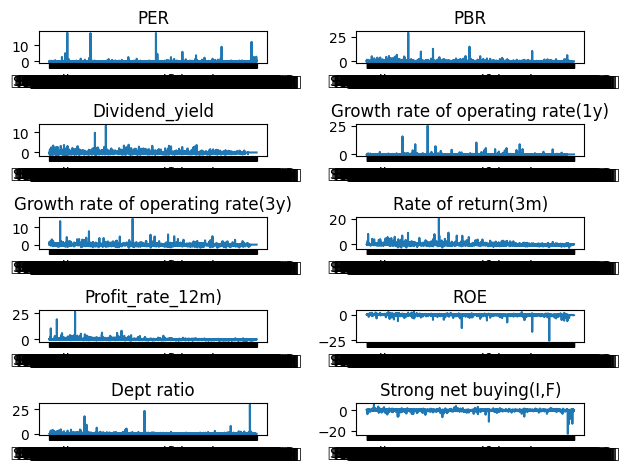

In [16]:
fig, axs = plt.subplots(5,2)
axs[0][0].plot(zscore_data['PER(배)'])
axs[0][0].set_title('PER')
axs[0][1].plot(zscore_data['PBR(배)'])
axs[0][1].set_title('PBR')
axs[1][0].plot(zscore_data['배당수익률(보통주,현금+주식)(%)'])
axs[1][0].set_title('Dividend_yield')
axs[1][1].plot(zscore_data['영업이익증가율(전년동기)(%)'])
axs[1][1].set_title('Growth rate of operating rate(1y)')
axs[2][0].plot(zscore_data['영업이익증가율(3년평균)(%)'])
axs[2][0].set_title('Growth rate of operating rate(3y)')
axs[2][1].plot(zscore_data['수익률 (현금배당반영,3개월)(%)'])
axs[2][1].set_title('Rate of return(3m)')
axs[3][0].plot(zscore_data['수익률 (현금배당반영,12개월)(%)'])
axs[3][0].set_title('Profit_rate_12m)')
axs[3][1].plot(zscore_data['ROE(영업이익)(%)'])
axs[3][1].set_title('ROE')
axs[4][0].plot(zscore_data['부채비율(%)'])
axs[4][0].set_title('Dept ratio')
axs[4][1].plot(zscore_data['순매수강세'])
axs[4][1].set_title('Strong net buying(I,F)')
plt.tight_layout()
plt.show()

In [17]:
zscore_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2433 entries, 삼성전자 to IBKS제17호스팩
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PER(배)                2433 non-null   float64
 1   PBR(배)                2433 non-null   float64
 2   배당수익률(보통주,현금+주식)(%)   2433 non-null   float64
 3   영업이익증가율(전년동기)(%)      2433 non-null   float64
 4   영업이익증가율(3년평균)(%)      2433 non-null   float64
 5   수익률 (현금배당반영,3개월)(%)   2433 non-null   float64
 6   수익률 (현금배당반영,12개월)(%)  2433 non-null   float64
 7   ROE(영업이익)(%)          2433 non-null   float64
 8   부채비율(%)               2433 non-null   float64
 9   순매수강세                 2433 non-null   float64
dtypes: float64(10)
memory usage: 209.1+ KB


In [18]:
zscore_data.describe() # zscore 잘됨

PER(배)        PBR(배)  배당수익률(보통주,현금+주식)(%)  영업이익증가율(전년동기)(%)   
count  2.433000e+03  2.433000e+03         2.433000e+03      2.433000e+03  \
mean  -8.761316e-18 -7.009053e-17        -2.920439e-18      6.570987e-18   
std    8.090768e-01  9.871710e-01         6.930102e-01      7.916090e-01   
min   -2.288782e-01 -5.428548e-01        -1.155322e+00     -3.394178e-01   
25%   -1.814860e-01 -3.637364e-01        -2.254205e-01     -1.644170e-01   
50%   -7.736009e-02 -2.198020e-01         0.000000e+00     -2.916140e-02   
75%    0.000000e+00  2.648582e-02         0.000000e+00      0.000000e+00   
max    1.785480e+01  2.885495e+01         1.318450e+01      2.494398e+01   

       영업이익증가율(3년평균)(%)  수익률 (현금배당반영,3개월)(%)  수익률 (현금배당반영,12개월)(%)   
count      2.433000e+03         2.433000e+03           2433.000000  \
mean      -8.761316e-18        -1.168175e-17              0.000000   
std        7.557347e-01         9.944335e-01              0.975438   
min       -1.837456e+00        -2.614780e+00             -1.285431   
25%       -2.354171e-01        -4.435789e-01             -0.366444   
50%        0.000000e+00        -1.532027e-01             -0.135333   
75%        0.000000e+00         1.833626e-01              0.117284   
max        1.493465e+01         2.000962e+01             26.407447   

       ROE(영업이익)(%)       부채비율(%)         순매수강세  
count  2.433000e+03  2.433000e+03  2.433000e+03  
mean  -1.168175e-17  2.336351e-17  5.840877e-18  
std    9.848774e-01  9.944335e-01  9.925711e-01  
min   -2.547650e+01 -3.149742e-01 -2.274464e+01  
25%   -9.392744e-02 -2.465072e-01 -1.282918e-01  
50%    9.189430e-02 -1.575385e-01  1.220446e-01  
75%    3.261779e-01 -4.145848e-03  3.000969e-01  
max    3.090045e+00  2.948268e+01  5.291533e+00

In [19]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42) # 5개의 군집화로 KMeans 실행 
y_pred = kmeans.fit_predict(zscore_data) # zscore 값으로 y_pred : 예측 값 

In [20]:
kmeans.cluster_centers_

array([[-3.82907302e-02, -9.70045539e-02,  5.87281574e-03,
        -9.47656799e-03, -7.01404262e-03, -1.16264274e-01,
        -1.00924405e-01,  8.22973825e-02, -4.81285389e-02,
         4.90267532e-02],
       [ 3.96682114e-03,  2.55405017e-01, -1.52701062e-01,
         2.93711898e-01,  2.34605682e-01,  3.49602694e+00,
         3.00162493e+00,  1.17526965e-01, -1.98038776e-02,
        -1.29622459e+00],
       [ 1.43985904e+01,  3.61266635e-01, -1.33475781e-01,
        -1.42792345e-01, -3.26732606e-01,  6.10125609e-02,
         1.27261821e-01,  4.25064634e-02, -4.42324042e-02,
        -1.97100441e+00],
       [ 2.81829874e-02,  3.80029209e+00, -1.81401663e-02,
         0.00000000e+00,  0.00000000e+00, -2.04765061e-02,
         6.59454285e-03, -3.52893639e+00,  8.21799472e-01,
        -7.65468768e-03],
       [-7.29343720e-02,  2.35792435e+00,  0.00000000e+00,
        -2.87327899e-04,  3.08148791e-33, -5.24358663e-01,
        -1.67526312e-01, -6.09454989e+00,  2.34605484e+01,
        -1.

In [21]:
np.unique(y_pred[:]) # 라벨링 잘 되어있음

array([0, 1, 2, 3, 4])

In [22]:
X = zscore_data.values
y = y_pred

In [23]:
kmeans.cluster_centers_[:,0]

array([-3.82907302e-02,  3.96682114e-03,  1.43985904e+01,  2.81829874e-02,
       -7.29343720e-02])

In [24]:
kmeans.cluster_centers_[:,1]

array([-0.09700455,  0.25540502,  0.36126663,  3.80029209,  2.35792435])

In [25]:
pd.DataFrame(data=kmeans.cluster_centers_)

0         1         2         3             4         5         6   
0  -0.038291 -0.097005  0.005873 -0.009477 -7.014043e-03 -0.116264 -0.100924  \
1   0.003967  0.255405 -0.152701  0.293712  2.346057e-01  3.496027  3.001625   
2  14.398590  0.361267 -0.133476 -0.142792 -3.267326e-01  0.061013  0.127262   
3   0.028183  3.800292 -0.018140  0.000000  0.000000e+00 -0.020477  0.006595   
4  -0.072934  2.357924  0.000000 -0.000287  3.081488e-33 -0.524359 -0.167526   

          7          8         9  
0  0.082297  -0.048129  0.049027  
1  0.117527  -0.019804 -1.296225  
2  0.042506  -0.044232 -1.971004  
3 -3.528936   0.821799 -0.007655  
4 -6.094550  23.460548 -0.179905

### 전체 피처(10개)로 k-means 수행

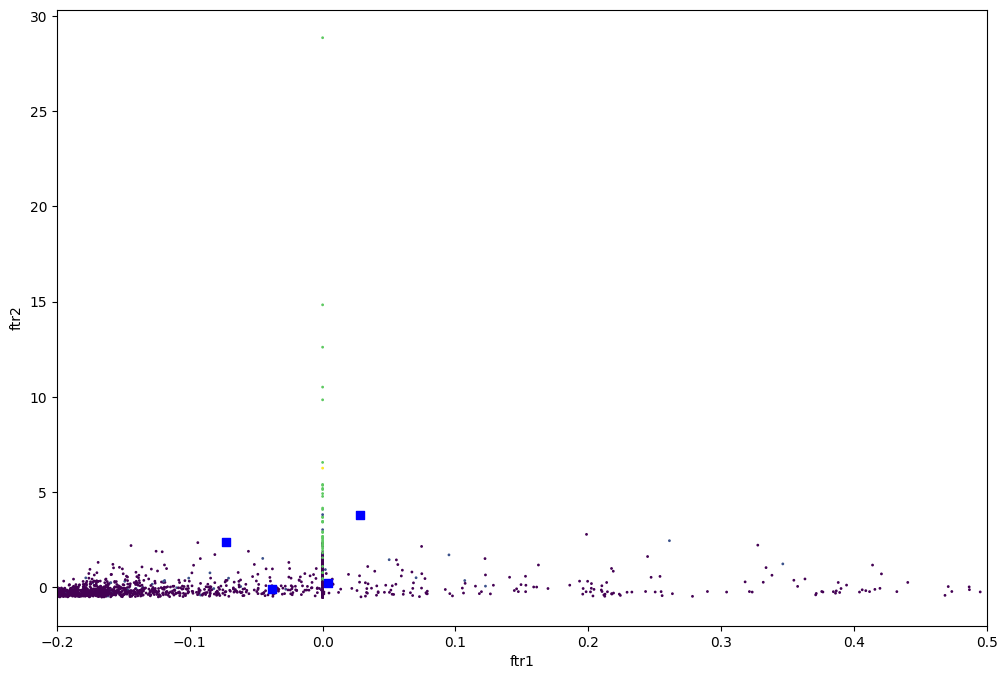

In [26]:
# 위 데이터셋의 산점도

plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1], s=1, c=y)    # 점 분포
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='s', c='b') # 군집그룹 5개. 나머지 하나의 점은 14.3 근처에 있더라
plt.xlim(-0.2,0.5)
plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.show()

In [27]:
# Cluster 그리는 함수
def draw_cluster(X, y, centers=None, title=None): # 여기서 y는 label임
    markers = ['sb','^r','og']
    plt.figure(figsize=(12,8))
    plt.scatter(X[:,0],X[:,1], s=1, c=y)
    if centers:
        for i, center_label in enumerate(centers):
            label, center = center_label
            plt.scatter(center[:,0], center[:,1],
                        marker=markers[i][0] , c=markers[i][1],
                        label=label)
        plt.legend()
    plt.xlabel('X1', fontsize=14)
    plt.ylabel('X2', fontsize=14, rotation=0)
    plt.title(title)
    plt.show()

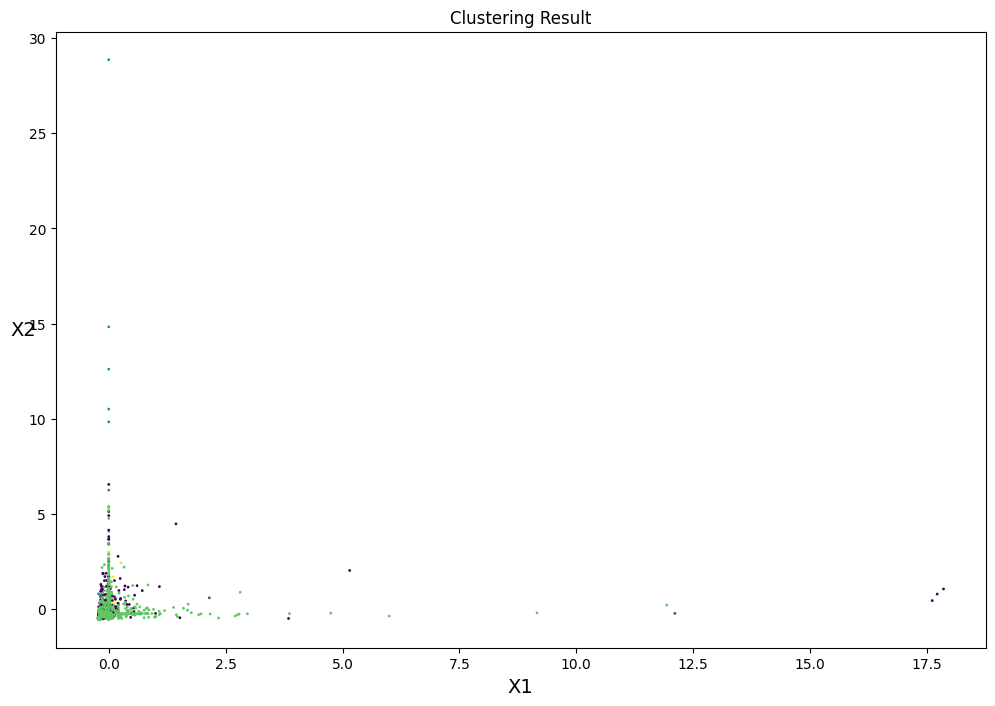

In [28]:
k = 5  # 군집 개수
kmeans = KMeans(n_clusters=k, init='random', random_state=42)
y_pred = kmeans.fit_predict(zscore_data)

# 군집 결과 시각화
draw_cluster(zscore_data.values, y_pred, centers=None, title='Clustering Result')

방법1) 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션을 선택

max_iter=1일 때 클러스터 중심좌표
[[-0.13 -0.18  0.09 -0.07  0.06  0.38  0.24  0.39 -0.09  0.17]
 [ 0.03  0.84 -0.11  0.24  0.06  0.01  0.15 -0.4   0.02  0.16]
 [-0.01 -0.18 -0.1   0.01 -0.06 -0.38 -0.33 -0.21 -0.15 -0.13]
 [-0.11 -0.11  0.57 -0.14 -0.31 -0.15  0.32 -0.46  2.88 -0.16]
 [ 3.88  2.25 -0.11 -0.08 -0.22 -0.21 -0.05 -0.75  0.16 -2.41]]


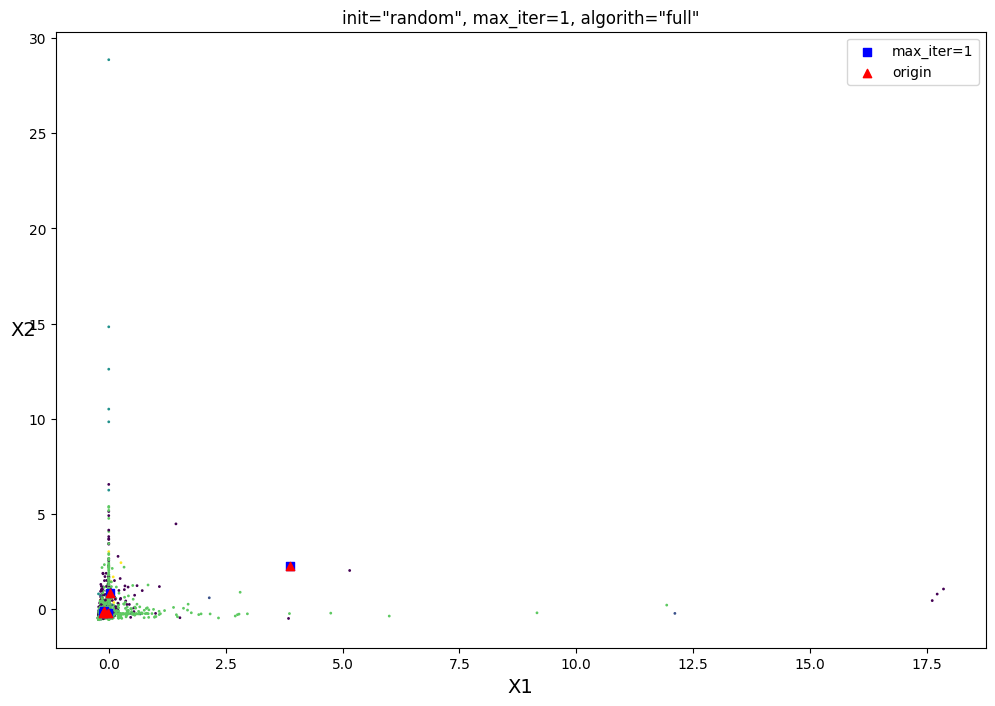

max_iter=2일 때 클러스터 중심좌표
[[-0.11 -0.17  0.18 -0.04  0.18  0.57  0.39  0.34 -0.09  0.21]
 [ 0.03  1.16 -0.11  0.44  0.01  0.01  0.11 -0.85  0.02  0.12]
 [-0.01 -0.18 -0.15 -0.05 -0.12 -0.4  -0.31 -0.02 -0.12 -0.09]
 [-0.08 -0.03  1.01 -0.12 -0.14 -0.31 -0.04 -0.8   3.9  -0.1 ]
 [ 4.59  3.25 -0.12 -0.1  -0.16 -0.29 -0.04 -1.09  0.24 -3.8 ]]


max_iter=3일 때 클러스터 중심좌표
[[-0.1  -0.12  0.22 -0.02  0.27  0.74  0.53  0.33 -0.07  0.22]
 [ 0.03  1.28 -0.05  0.55 -0.01 -0.05 -0.02 -1.28  0.08  0.05]
 [-0.02 -0.17 -0.13 -0.06 -0.13 -0.35 -0.26  0.06 -0.1  -0.06]
 [-0.13  0.08  1.28 -0.07 -0.05 -0.24  0.04 -1.16  5.48 -0.07]
 [ 5.46  3.93 -0.11 -0.08 -0.07 -0.21  0.02 -1.39  0.34 -4.62]]


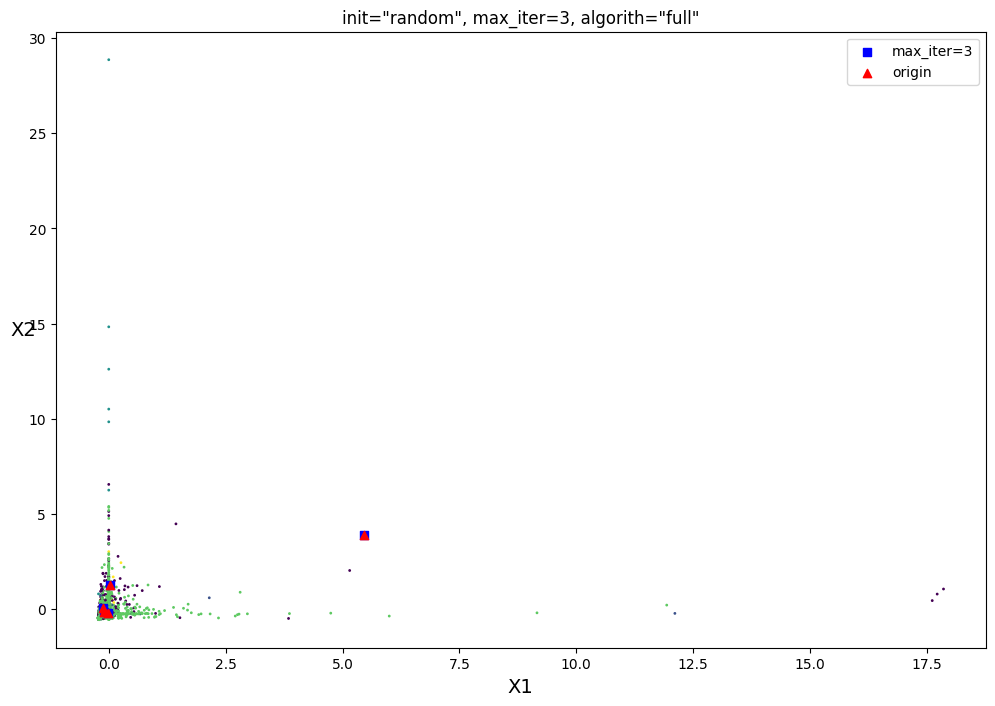

max_iter=4일 때 클러스터 중심좌표
[[-0.09 -0.08  0.24 -0.    0.33  0.9   0.68  0.32 -0.04  0.22]
 [ 0.01  1.42 -0.02  0.65  0.01 -0.11 -0.11 -1.68  0.17  0.02]
 [-0.02 -0.15 -0.1  -0.06 -0.12 -0.31 -0.24  0.08 -0.09 -0.03]
 [-0.13  0.21  1.   -0.04  0.05 -0.25 -0.11 -1.37  7.03 -0.16]
 [ 6.15  4.02 -0.13 -0.07 -0.08 -0.07  0.08 -0.58  0.24 -5.11]]


max_iter=5일 때 클러스터 중심좌표
[[-8.000e-02 -2.000e-02  2.400e-01  0.000e+00  3.500e-01  1.090e+00
   8.300e-01  3.100e-01 -1.000e-02  1.900e-01]
 [ 0.000e+00  1.700e+00 -0.000e+00  6.500e-01  1.000e-02 -1.600e-01
  -1.300e-01 -2.010e+00  2.800e-01  5.000e-02]
 [-3.000e-02 -1.500e-01 -6.000e-02 -5.000e-02 -1.000e-01 -2.800e-01
  -2.200e-01  9.000e-02 -8.000e-02 -1.000e-02]
 [-9.000e-02  5.100e-01 -0.000e+00 -6.000e-02  1.700e-01 -2.400e-01
  -2.200e-01 -2.220e+00  1.062e+01 -3.800e-01]
 [ 7.090e+00  2.530e+00 -1.500e-01 -8.000e-02 -9.000e-02  9.000e-02
   1.300e-01 -6.000e-02  9.000e-02 -5.880e+00]]


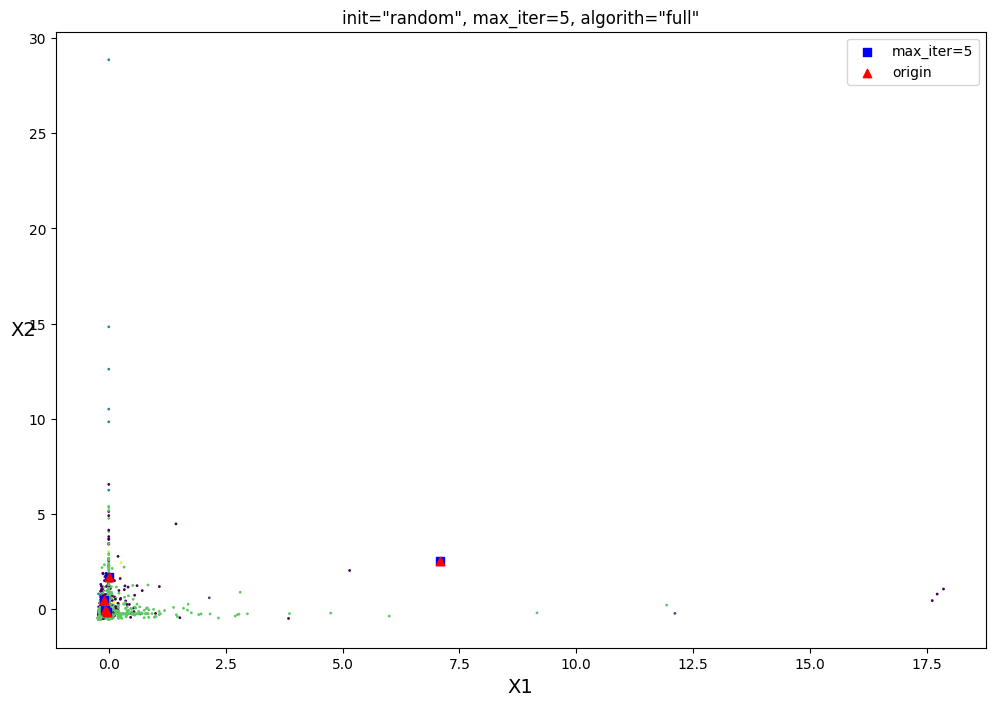

max_iter=6일 때 클러스터 중심좌표
[[-7.000e-02  3.000e-02  1.100e-01  2.000e-02  3.800e-01  1.350e+00
   1.030e+00  2.800e-01 -3.000e-02  1.600e-01]
 [ 1.000e-02  2.220e+00  1.000e-02  5.400e-01  2.000e-02 -1.300e-01
  -8.000e-02 -2.370e+00  4.000e-01  5.000e-02]
 [-3.000e-02 -1.400e-01 -2.000e-02 -3.000e-02 -7.000e-02 -2.600e-01
  -2.000e-01  9.000e-02 -7.000e-02  1.000e-02]
 [-6.000e-02  1.000e+00 -0.000e+00 -3.000e-02 -9.000e-02 -2.400e-01
  -2.500e-01 -2.940e+00  1.418e+01 -1.700e-01]
 [ 7.690e+00  3.300e-01 -1.600e-01 -9.000e-02 -1.000e-01  1.000e-01
   1.300e-01  3.000e-02 -1.000e-02 -6.370e+00]]


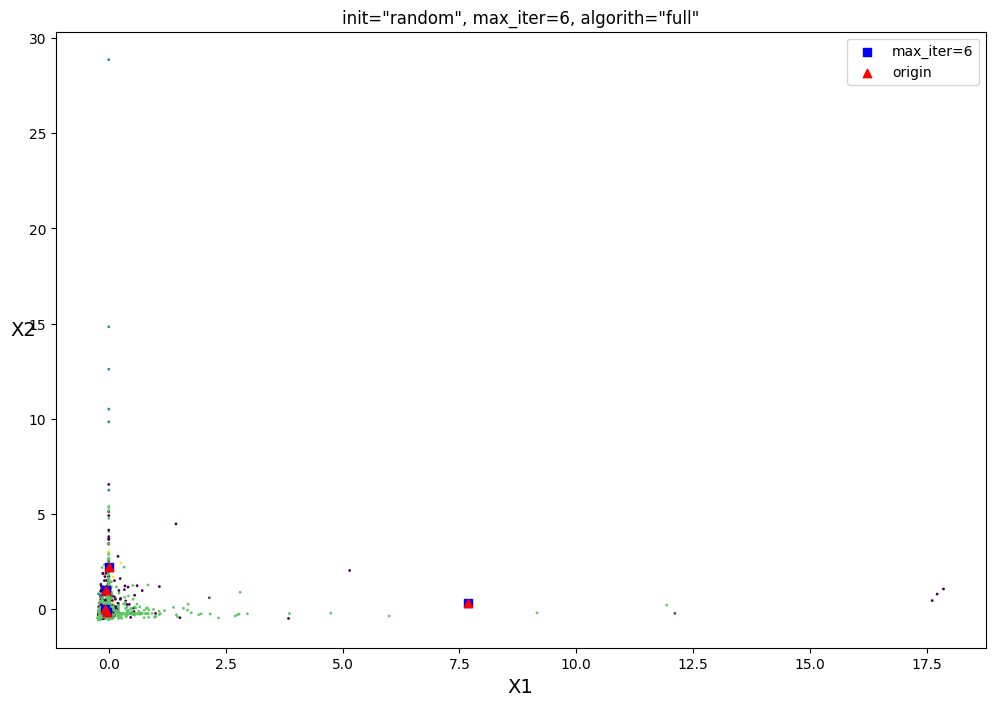

max_iter=7일 때 클러스터 중심좌표
[[-6.000e-02  9.000e-02 -4.000e-02  7.000e-02  4.000e-01  1.610e+00
   1.240e+00  2.700e-01 -3.000e-02  1.200e-01]
 [ 1.000e-02  2.520e+00 -2.000e-02  4.300e-01  0.000e+00 -1.200e-01
  -7.000e-02 -2.640e+00  5.300e-01  5.000e-02]
 [-3.000e-02 -1.400e-01  1.000e-02 -3.000e-02 -6.000e-02 -2.300e-01
  -1.800e-01  9.000e-02 -6.000e-02  2.000e-02]
 [-4.000e-02  1.430e+00 -0.000e+00 -0.000e+00  0.000e+00 -2.200e-01
  -1.500e-01 -3.440e+00  1.743e+01 -3.000e-02]
 [ 7.920e+00  1.800e-01 -7.000e-02 -8.000e-02 -1.800e-01  9.000e-02
   1.100e-01  1.000e-02 -2.000e-02 -6.870e+00]]


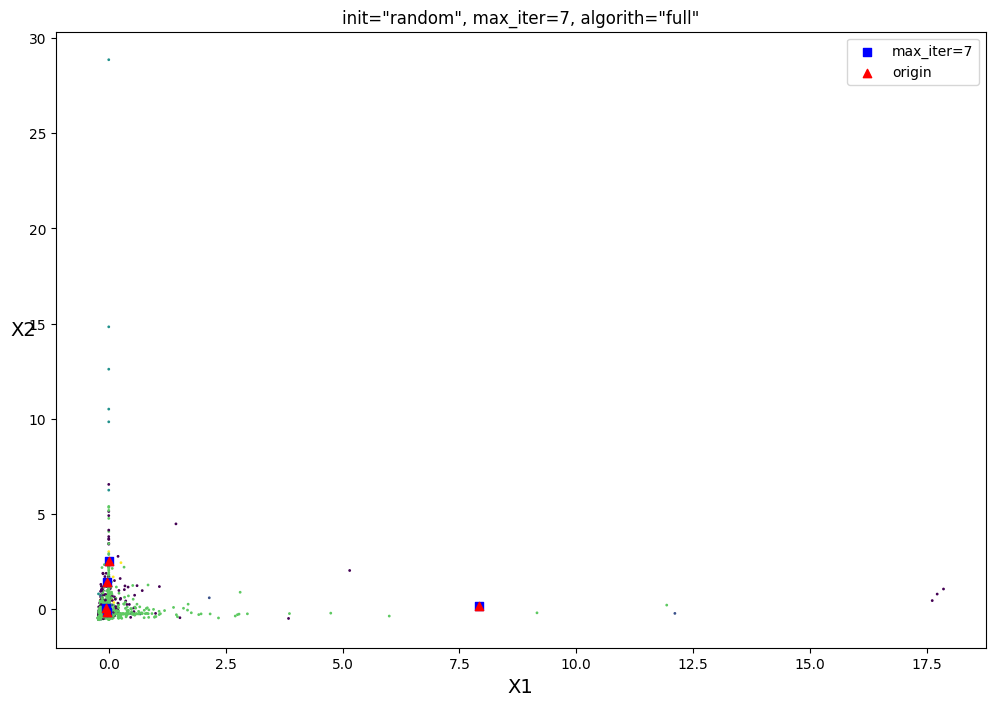

max_iter=8일 때 클러스터 중심좌표
[[-6.000e-02  1.300e-01 -5.000e-02  2.300e-01  4.000e-01  1.870e+00
   1.480e+00  2.300e-01 -4.000e-02  7.000e-02]
 [ 2.000e-02  2.850e+00 -1.000e-02  0.000e+00  0.000e+00 -1.900e-01
  -1.100e-01 -2.960e+00  6.500e-01 -1.000e-02]
 [-4.000e-02 -1.200e-01  1.000e-02 -3.000e-02 -4.000e-02 -2.100e-01
  -1.700e-01  9.000e-02 -5.000e-02  3.000e-02]
 [-7.000e-02  2.360e+00  0.000e+00 -0.000e+00  0.000e+00 -5.200e-01
  -1.700e-01 -6.090e+00  2.346e+01 -1.800e-01]
 [ 7.920e+00  1.800e-01 -7.000e-02 -8.000e-02 -1.800e-01  9.000e-02
   1.100e-01  1.000e-02 -2.000e-02 -6.870e+00]]


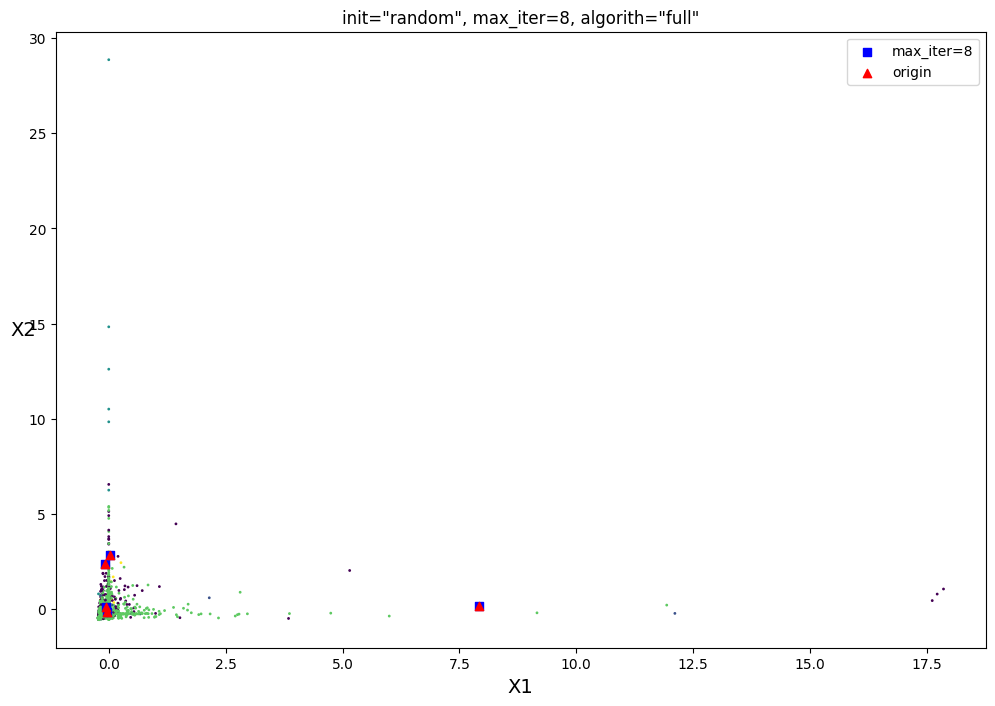

max_iter=9일 때 클러스터 중심좌표
[[-5.000e-02  1.600e-01 -7.000e-02  2.800e-01  3.900e-01  2.080e+00
   1.680e+00  2.100e-01 -5.000e-02  0.000e+00]
 [ 2.000e-02  3.230e+00 -1.000e-02  0.000e+00  0.000e+00 -1.400e-01
  -9.000e-02 -3.220e+00  7.500e-01 -5.000e-02]
 [-4.000e-02 -1.200e-01  1.000e-02 -3.000e-02 -4.000e-02 -1.900e-01
  -1.600e-01  8.000e-02 -5.000e-02  4.000e-02]
 [-7.000e-02  2.360e+00  0.000e+00 -0.000e+00  0.000e+00 -5.200e-01
  -1.700e-01 -6.090e+00  2.346e+01 -1.800e-01]
 [ 7.920e+00  1.800e-01 -7.000e-02 -8.000e-02 -1.800e-01  9.000e-02
   1.100e-01  1.000e-02 -2.000e-02 -6.870e+00]]


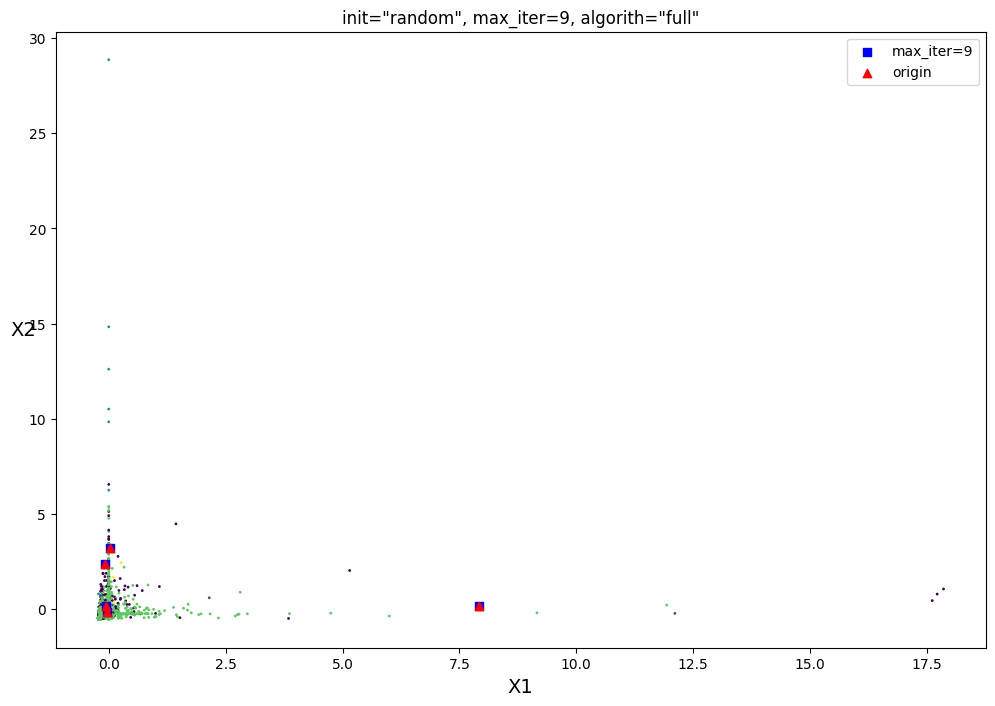

max_iter=10일 때 클러스터 중심좌표
[[-6.000e-02  1.900e-01 -6.000e-02  3.700e-01  2.900e-01  2.380e+00
   1.950e+00  1.900e-01 -4.000e-02 -1.300e-01]
 [ 3.000e-02  3.610e+00 -2.000e-02  0.000e+00  0.000e+00 -5.000e-02
  -2.000e-02 -3.480e+00  8.200e-01 -3.000e-02]
 [-4.000e-02 -1.100e-01  1.000e-02 -3.000e-02 -2.000e-02 -1.700e-01
  -1.400e-01  8.000e-02 -5.000e-02  4.000e-02]
 [-7.000e-02  2.360e+00  0.000e+00 -0.000e+00  0.000e+00 -5.200e-01
  -1.700e-01 -6.090e+00  2.346e+01 -1.800e-01]
 [ 7.920e+00  1.800e-01 -7.000e-02 -8.000e-02 -1.800e-01  9.000e-02
   1.100e-01  1.000e-02 -2.000e-02 -6.870e+00]]


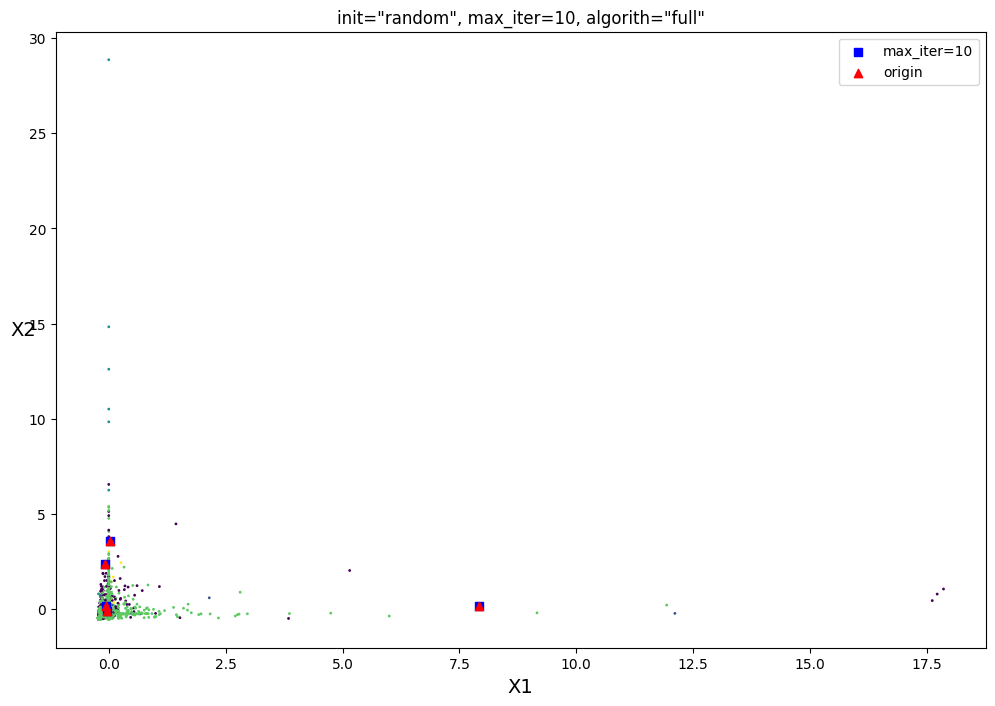

In [29]:
max_iters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for iter_n in max_iters:  # max_iter 변화시키면서 군집 수행
    kmeans = KMeans(n_clusters=k, init='random', n_init=1,
                    max_iter=iter_n, algorithm='full', random_state=0)
    kmeans.fit(X=zscore_data.values)
    centers = kmeans.cluster_centers_
    print(f'max_iter={iter_n}일 때 클러스터 중심좌표\n{np.round(centers,2)}')
    title = f'init="random", max_iter={iter_n}, algorith="full"'
    draw_cluster(X=zscore_data.values,y=y_pred,centers=[(f'max_iter={iter_n}', centers),
                              ('origin',kmeans.cluster_centers_)],
                title=title)

방법2) k-means ++ 초기화 알고리즘 사용

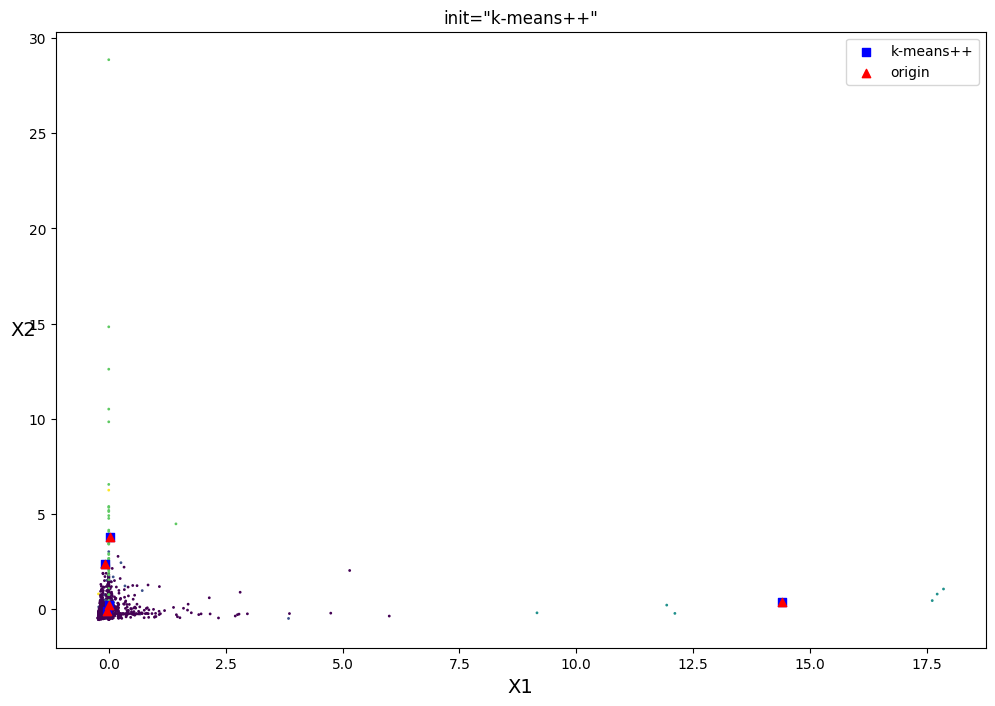

In [30]:
k=5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X)
kp_centers = kmeans.cluster_centers_
draw_cluster(X,y,centers=[('k-means++', kp_centers),
                          ('origin', kmeans.cluster_centers_)], 
             title='init="k-means++"')

방법1) 이너셔가 급격히 작아지는 elbow의 K선택

In [31]:
kmeans_per_k = [KMeans(n_clusters=k, init='k-means++', random_state=42).fit(X) 
                for k in range(1,11)]
inertias = [model.inertia_ for model in kmeans_per_k]
inertias_s = pd.Series(data=inertias, 
                       index=['k='+str(k) for k in range(1,11)])
inertias_s

k=1     19922.000000
k=2     17935.917233
k=3     15990.679319
k=4     14734.416536
k=5     13577.242703
k=6     12623.793998
k=7     11634.258196
k=8     10849.870781
k=9     10052.745716
k=10     9349.894428
dtype: float64

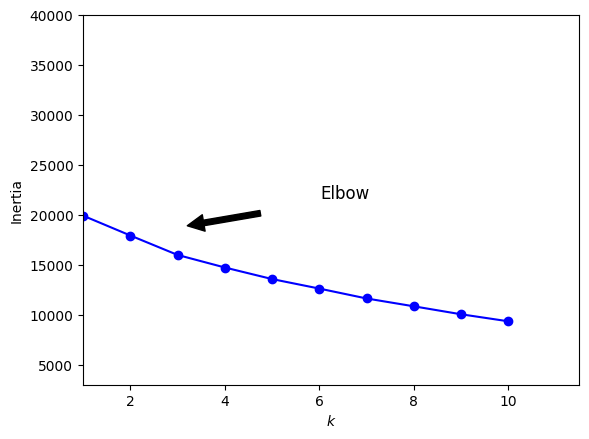

In [32]:
# k=1~10인 KMeans 모델별 이너셔에 대한 그래프 작성
plt.plot(range(1,11), inertias, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Inertia')
plt.axis([1,11.5,3000,40000]) #(x축범위시작,끝,y축범위시작,끝)
plt.annotate('Elbow',xy=(2,inertias[1]),xytext=(0.5,0.5),
            textcoords='figure fraction',
            fontsize=12,
            arrowprops=dict(facecolor='black',shrink=0.3))
plt.show()

In [33]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42,init='k-means++').fit(X)
# kmeans에 대한 실루엣점수
silhouette_score(X, kmeans.labels_) # 묶여진 군집의 결과가 잘 묶였는지

0.6355517704167895

In [34]:
# 클러스터 개수에 따른 실루엣 점수 비교
kmeans_perk= [KMeans(n_clusters=k, init='k-means++', random_state=42).fit(X) 
                for k in range(2,11)] # 실루엣 계산은 거리를 계산하는 거라 최소 2개이상의 클러스터가 되어야 함(라벨의수가 2이상)
sil_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_perk]
sil_scores_s = pd.Series(data=sil_scores,
                         index=['k='+str(i) for i in range(2,11)])
sil_scores_s

k=2     0.688942
k=3     0.627781
k=4     0.626905
k=5     0.635552
k=6     0.623287
k=7     0.543610
k=8     0.273305
k=9     0.259177
k=10    0.203941
dtype: float64

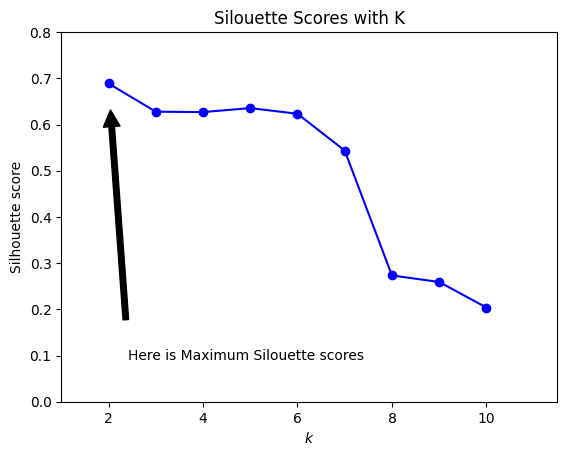

In [35]:
plt.plot(range(2,11), sil_scores, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.axis([1,11.5,0,0.8]) #(x축범위시작,끝,y축범위시작,끝)
plt.title('Silouette Scores with K')
plt.annotate('Here is Maximum Silouette scores ', 
             xy=(2,sil_scores[0]),
             xytext=(0.2,0.2),
             textcoords='figure fraction',
             fontsize=10, 
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

In [36]:
sil_scores_s.index[np.argmax(sil_scores_s.values)] # 실루엣 점수가 가장 높은것

'k=2'

In [37]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 
### 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
# 출처 : 파이썬 머신러닝 완벽가이드, 권철민

def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 
    # 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서
    # 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 
        # 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, init='k-means++', max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

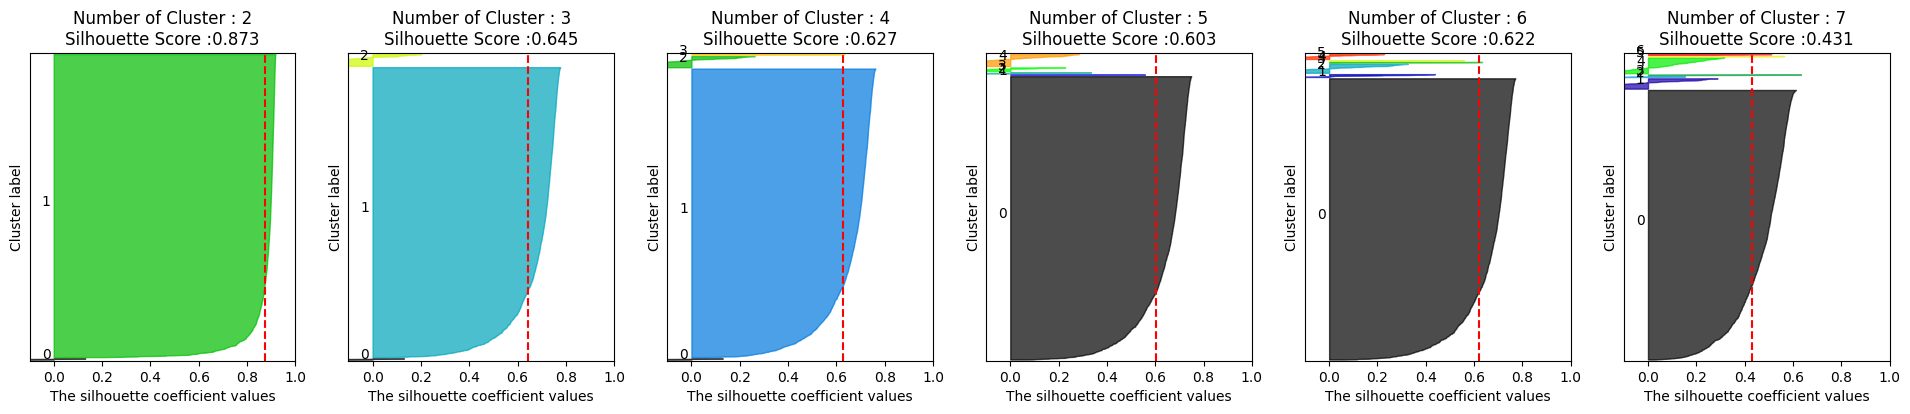

In [38]:
visualize_silhouette([2,3,4,5,6,7], X)

In [39]:
value_zscore_data

PER(배)    PBR(배)
Name                          
삼성전자       -0.196697 -0.219802
LG에너지솔루션    0.413925  1.171564
SK하이닉스     -0.110471 -0.302964
삼성바이오로직스    0.122235  1.510610
LG화학       -0.105776 -0.091860
...              ...       ...
유진스팩6호      1.001070 -0.210206
유진스팩9호      0.000000 -0.235795
엔에이치스팩25호   0.386634 -0.184618
하나금융20호스팩   0.826124 -0.216603
IBKS제17호스팩  0.000000 -0.178221

[2367 rows x 2 columns]

In [40]:
k = 5
kmeans_value = KMeans(n_clusters=k, random_state=42) # 5개의 군집화로 KMeans 실행 
y_pred_value = kmeans_value.fit_predict(value_zscore_data) # zscore 값으로 y_pred : 예측 값 

kmeans_value.cluster_centers_

array([[-0.12711261, -0.35917546],
       [-0.01713322,  0.45226898],
       [ 0.0364712 ,  1.25929987],
       [-0.05575153, -0.05207381],
       [ 0.76228577, -0.16903536]])

In [41]:
np.unique(y_pred_value[:]) # 라벨링 잘 되어있음

array([0, 1, 2, 3, 4])

In [42]:
X = value_zscore_data.values
y = y_pred_value

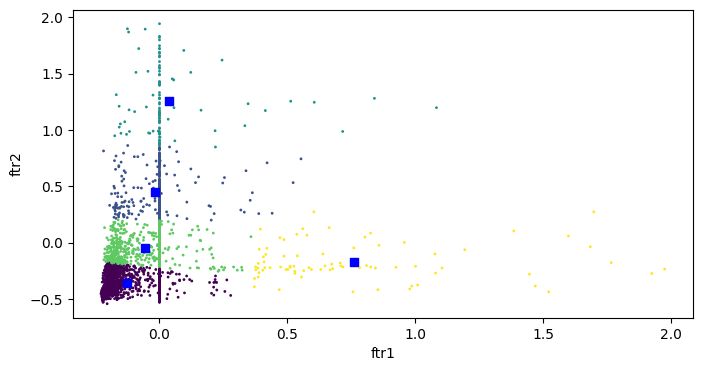

In [43]:
# 위 데이터셋의 산점도

plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1], s=1, c=y)
plt.scatter(kmeans_value.cluster_centers_[:,0],kmeans_value.cluster_centers_[:,1], marker='s', c='b')
plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.show()

### factor1:가치로 클러스터링

In [44]:
value_zscore_data

PER(배)    PBR(배)
Name                          
삼성전자       -0.196697 -0.219802
LG에너지솔루션    0.413925  1.171564
SK하이닉스     -0.110471 -0.302964
삼성바이오로직스    0.122235  1.510610
LG화학       -0.105776 -0.091860
...              ...       ...
유진스팩6호      1.001070 -0.210206
유진스팩9호      0.000000 -0.235795
엔에이치스팩25호   0.386634 -0.184618
하나금융20호스팩   0.826124 -0.216603
IBKS제17호스팩  0.000000 -0.178221

[2367 rows x 2 columns]

In [45]:
k = 5
kmeans_value = KMeans(n_clusters=k, random_state=42) # 5개의 군집화로 KMeans 실행 
y_pred_value = kmeans_value.fit_predict(value_zscore_data) # zscore 값으로 y_pred : 예측 값 

kmeans_value.cluster_centers_

array([[-0.12711261, -0.35917546],
       [-0.01713322,  0.45226898],
       [ 0.0364712 ,  1.25929987],
       [-0.05575153, -0.05207381],
       [ 0.76228577, -0.16903536]])

In [46]:
np.unique(y_pred_value[:]) # 라벨링 잘 되어있음

array([0, 1, 2, 3, 4])

In [47]:
X = value_zscore_data.values
y = y_pred_value

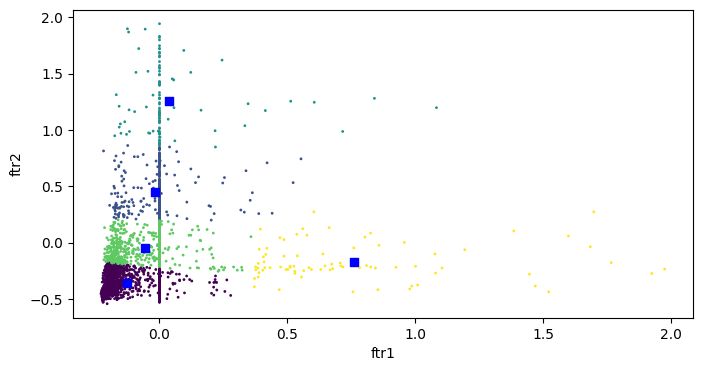

In [48]:
# 위 데이터셋의 산점도

plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1], s=1, c=y)
plt.scatter(kmeans_value.cluster_centers_[:,0],kmeans_value.cluster_centers_[:,1], marker='s', c='b')
plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.show()

중심점 초기화

방법1) 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션을 선택

max_iter=1일 때 클러스터 중심좌표
[[-0.04  0.37]
 [-0.19 -0.35]
 [ 0.04  1.21]
 [ 0.08 -0.33]
 [-0.   -0.05]]


max_iter=2일 때 클러스터 중심좌표
[[-0.02  0.41]
 [-0.18 -0.35]
 [ 0.04  1.22]
 [ 0.14 -0.32]
 [-0.04 -0.04]]


max_iter=3일 때 클러스터 중심좌표
[[-0.02  0.43]
 [-0.18 -0.35]
 [ 0.03  1.23]
 [ 0.16 -0.32]
 [-0.06 -0.04]]


max_iter=4일 때 클러스터 중심좌표
[[-0.01  0.44]
 [-0.17 -0.36]
 [ 0.03  1.24]
 [ 0.19 -0.29]
 [-0.06 -0.04]]


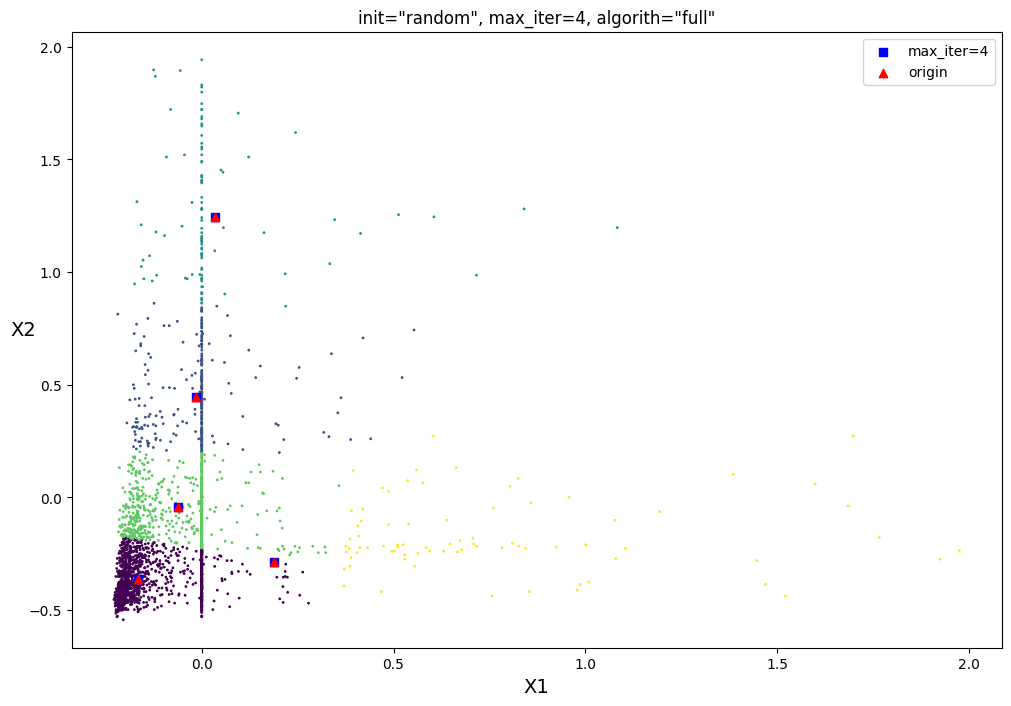

max_iter=5일 때 클러스터 중심좌표
[[-0.01  0.45]
 [-0.14 -0.36]
 [ 0.04  1.25]
 [ 0.36 -0.23]
 [-0.06 -0.05]]


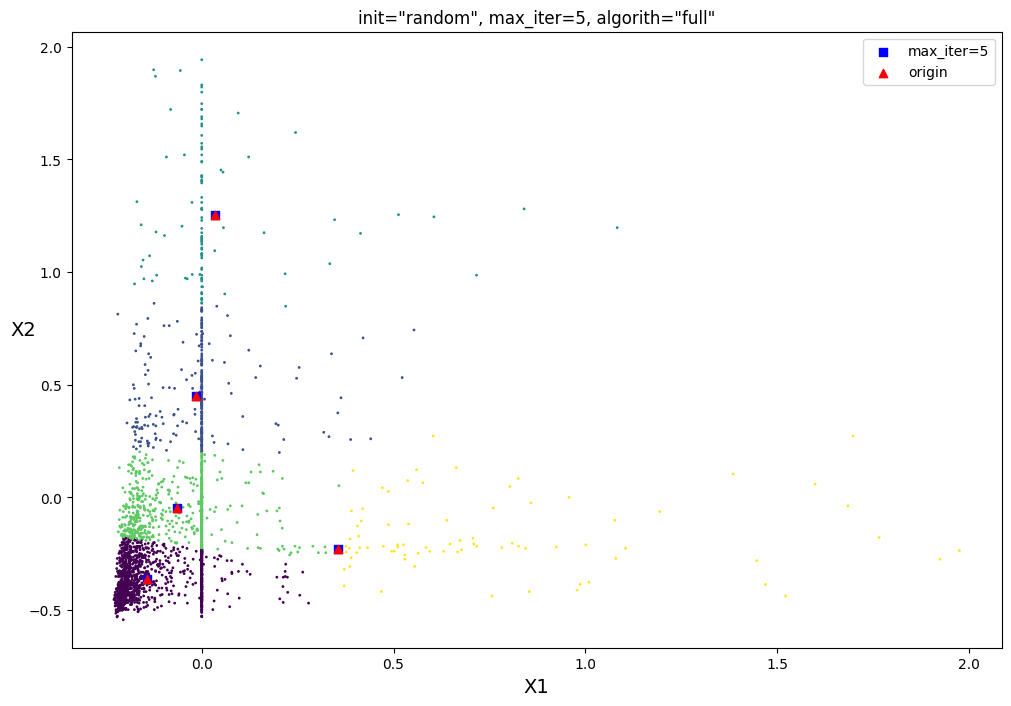

max_iter=6일 때 클러스터 중심좌표
[[-0.02  0.45]
 [-0.13 -0.36]
 [ 0.04  1.25]
 [ 0.59 -0.2 ]
 [-0.06 -0.05]]


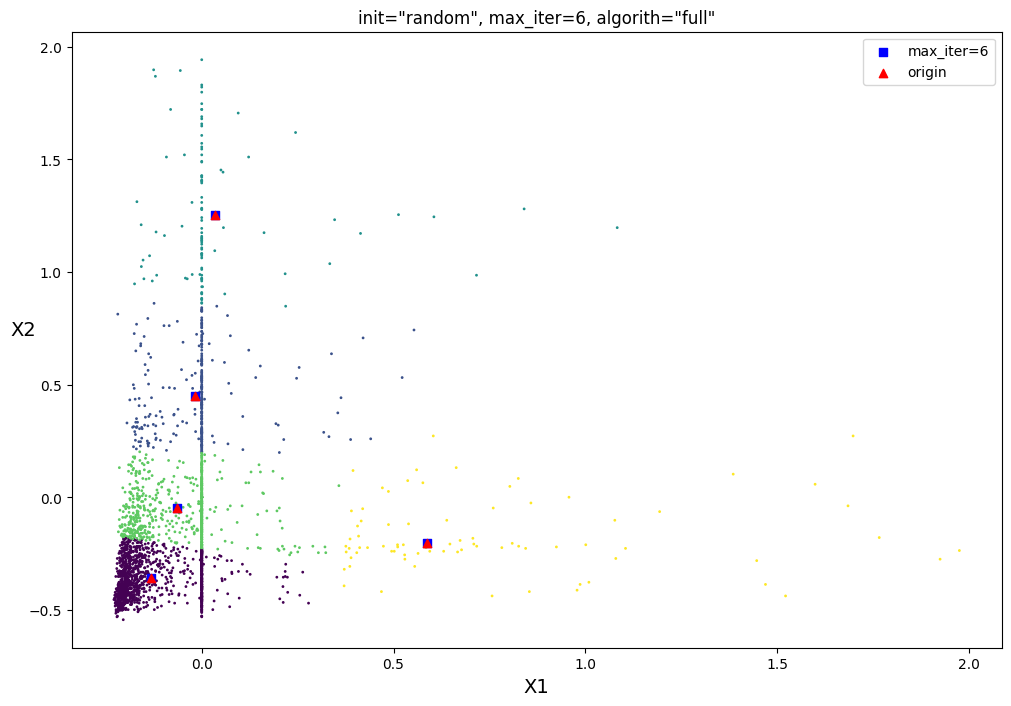

max_iter=7일 때 클러스터 중심좌표
[[-0.02  0.45]
 [-0.13 -0.36]
 [ 0.03  1.26]
 [ 0.71 -0.17]
 [-0.06 -0.05]]


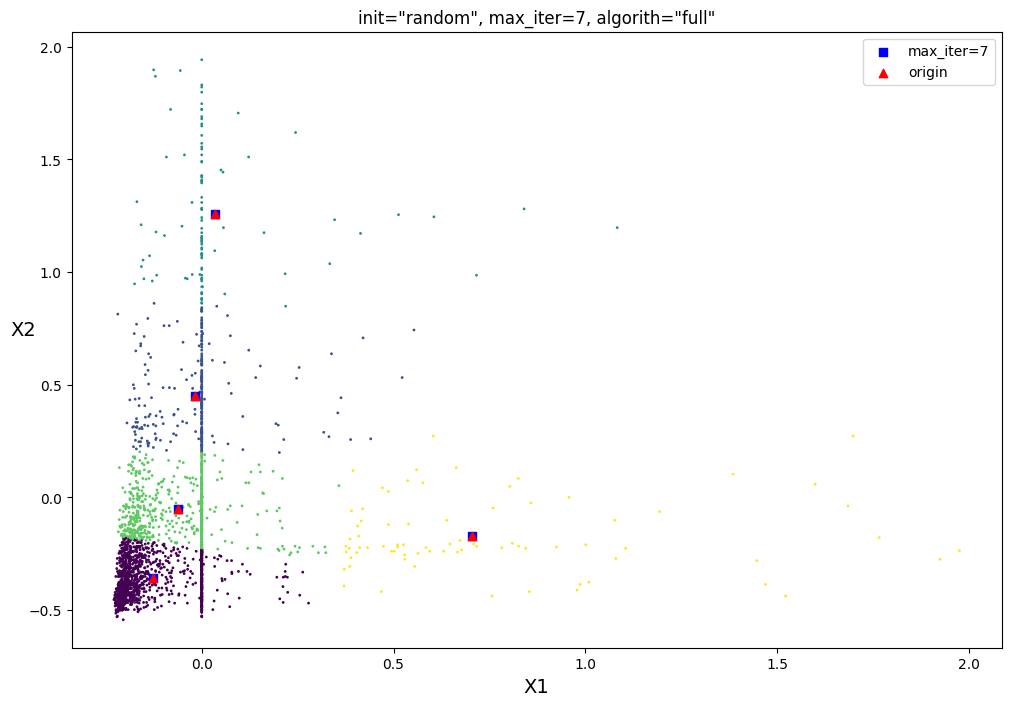

In [49]:
max_iters = [1, 2, 3, 4, 5, 6, 7]
for iter_n in max_iters:  # max_iter 변화시키면서 군집 수행
    kmeans_value = KMeans(n_clusters=k, init='random', n_init=1,
                    max_iter=iter_n, algorithm='full', random_state=42)
    kmeans_value.fit(X)
    centers = kmeans_value.cluster_centers_
    print(f'max_iter={iter_n}일 때 클러스터 중심좌표\n{np.round(centers,2)}')
    title = f'init="random", max_iter={iter_n}, algorith="full"'
    draw_cluster(X,y,centers=[(f'max_iter={iter_n}', centers),
                              ('origin',kmeans_value.cluster_centers_)],
                title=title)

방법2) k-means ++ 초기화 알고리즘 사용

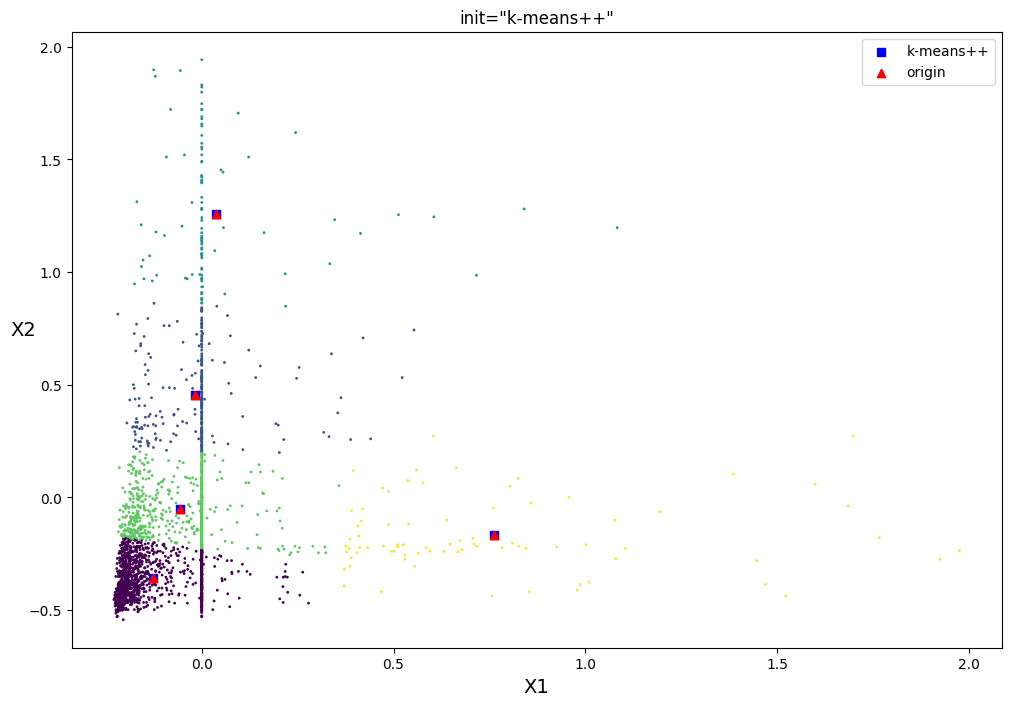

In [50]:
k=5
kmeans_value = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans_value.fit(X)
kp_centers = kmeans_value.cluster_centers_
draw_cluster(X,y,centers=[('k-means++', kp_centers),
                          ('origin', kmeans_value.cluster_centers_)], 
             title='init="k-means++"')

최적의 클러스터 개수 찾기

방법1) 이너셔가 급격히 작아지는 elbow의 K선택

In [51]:
kmeans_value = [KMeans(n_clusters=k, random_state=42).fit(X) 
                for k in range(1,11)]
inertias = [model.inertia_ for model in kmeans_value]
inertias_s = pd.Series(data=inertias, 
                       index=['k='+str(k) for k in range(1,11)])
inertias_s

k=1     498.650109
k=2     224.140683
k=3     152.458243
k=4     102.548233
k=5      73.821126
k=6      62.897244
k=7      53.089041
k=8      45.827547
k=9      37.522212
k=10     32.961631
dtype: float64

In [52]:
plt.plot(range(1,11), inertias, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Inertia')
plt.axis([0,11.5,-1000,4000]) #(x축범위시작,끝,y축범위시작,끝)
plt.annotate('Elbow',xy=(2,inertias[1]),xytext=(0.3,0.5),
            textcoords='figure fraction',
            fontsize=12,
            arrowprops=dict(facecolor='black',shrink=0.3))
plt.show()

방법2) 실루엣 점수로 찾기

In [53]:
k = 5
kmeans_value = KMeans(n_clusters=k, random_state=42).fit(X)
# kmeans에 대한 실루엣점수
silhouette_score(X, kmeans_value.labels_) # 묶여진 군집의 결과가 잘 묶였는지

0.4721347628718442

In [54]:
# 클러스터 개수에 따른 실루엣 점수 비교
kmeans_perk= [KMeans(n_clusters=k, random_state=42).fit(X) 
                for k in range(2,11)] # 실루엣 계산은 거리를 계산하는 거라 최소 2개이상의 클러스터가 되어야 함(라벨의수가 2이상)
sil_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_perk]
sil_scores_s = pd.Series(data=sil_scores,
                         index=['k='+str(i) for i in range(2,11)])
sil_scores_s

k=2     0.638300
k=3     0.497252
k=4     0.523643
k=5     0.472135
k=6     0.450817
k=7     0.447635
k=8     0.395090
k=9     0.456314
k=10    0.453492
dtype: float64

In [55]:
plt.plot(range(2,11), sil_scores, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.axis([1,11.5,0,0.7]) #(x축범위시작,끝,y축범위시작,끝)
plt.title('Silouette Scores with K')
plt.annotate('Here is Maximum Silouette scores ', 
             xy=(2,sil_scores[0]),
             xytext=(0.1,0.2),
             textcoords='figure fraction',
             fontsize=10, 
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

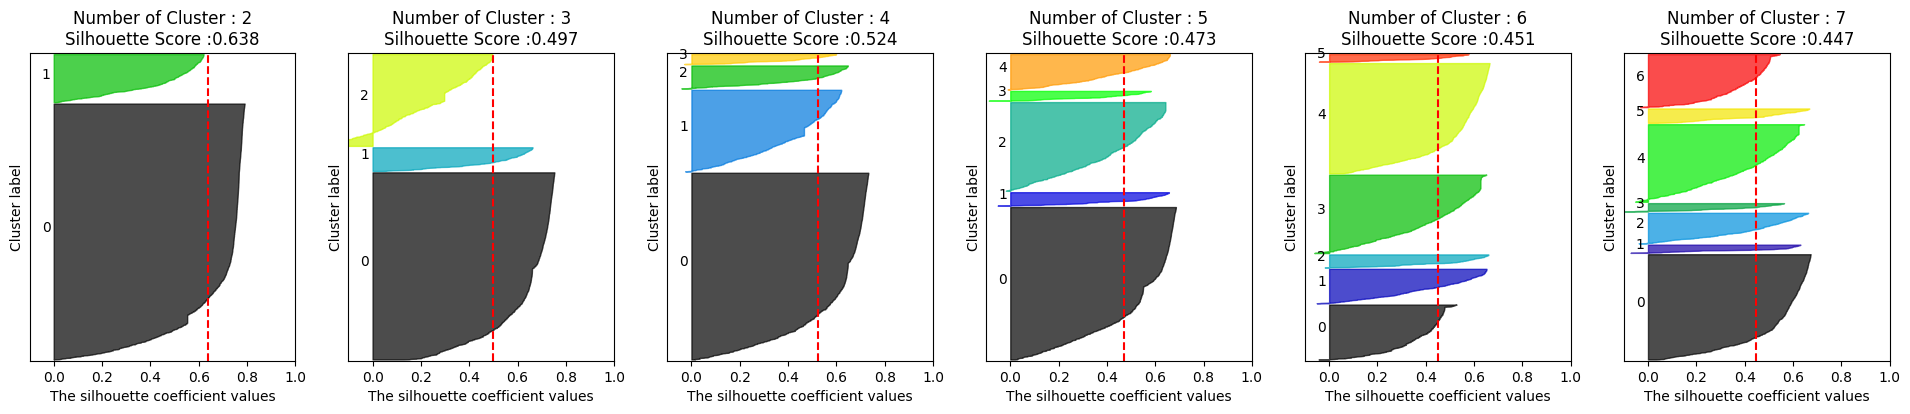

In [56]:
visualize_silhouette([2,3,4,5,6,7], X)

In [57]:
# 최적의 클러스터로 kmeas 수행
k = 2
kmeans_value = KMeans(n_clusters=k, random_state=42) 
y_pred_value = kmeans_value.fit_predict(value_zscore_data) # zscore 값으로 y_pred : 예측 값 

클러스터 라벨링 작업

In [58]:
## cluster열 추가
value_zscore_data['Cluster']=y_pred_value  # 새로운 열 추가 
len(value_zscore_data['Cluster'].unique()) # 추가된 열의 요소 갯수

2

In [59]:
value_zscore_data.Cluster.value_counts()

Cluster
1    1992
0     375
Name: count, dtype: int64

In [60]:

value_zscore_data[value_zscore_data.Cluster==0].describe()

PER(배)      PBR(배)  Cluster
count  375.000000  375.000000    375.0
mean     0.005233    0.690461      0.0
std      0.169182    0.419022      0.0
min     -0.218803    0.227994      0.0
25%     -0.043809    0.349539      0.0
50%      0.000000    0.547848      0.0
75%      0.000000    0.954063      0.0
max      1.697916    1.942413      0.0

In [61]:
value_zscore_data[value_zscore_data.Cluster==1].describe()

PER(배)       PBR(배)  Cluster
count  1992.000000  1992.000000   1992.0
mean     -0.067628    -0.239336      1.0
std       0.206435     0.177773      0.0
min      -0.228878    -0.542855      1.0
25%      -0.189067    -0.389325      1.0
50%      -0.133727    -0.267780      1.0
75%       0.000000    -0.111052      1.0
max       1.974982     0.227994      1.0

- 클러스터 재분류 : 클러스터링을 수행한 후에 하나의 라벨에 몰려있는 데이터를 다시 클러스터링을 진행하면, 데이터를 더 세분화하거나 몰려있는 데이터를 더 세분화할 수 있음.

KMeans로 재수행한 경우

In [62]:
# 1) 라벨 1로 분류된 주식 종목 추출
value_zscore_data2 = value_zscore_data[value_zscore_data.Cluster==1].iloc[:,:2]
value_zscore_data2

PER(배)    PBR(배)
Name                          
삼성전자       -0.196697 -0.219802
SK하이닉스     -0.110471 -0.302964
LG화학       -0.105776 -0.091860
삼성SDI      -0.126024  0.221597
현대차        -0.202468 -0.408516
...              ...       ...
유진스팩6호      1.001070 -0.210206
유진스팩9호      0.000000 -0.235795
엔에이치스팩25호   0.386634 -0.184618
하나금융20호스팩   0.826124 -0.216603
IBKS제17호스팩  0.000000 -0.178221

[1992 rows x 2 columns]

In [63]:
# 2) 라벨 1로 분류된 주식끼리 다시 클러스터링
k = 5
kmeans_value2 = KMeans(n_clusters=k, random_state=42) # 5개의 군집화로 KMeans 실행 
y_pred_value2 = kmeans_value2.fit_predict(value_zscore_data2) # zscore 값으로 y_pred : 예측 값 

kmeans_value2.cluster_centers_

array([[ 0.00897675, -0.32940192],
       [ 0.58125379, -0.18052575],
       [-0.06319474, -0.02312078],
       [-0.1846345 , -0.35647242],
       [ 1.47902863, -0.17920508]])

In [64]:
X = value_zscore_data2.values
y = y_pred_value2

In [65]:
# 최적의 클러스터 개수 찾기
kmeans_value2 = [KMeans(n_clusters=k, random_state=42).fit(X) 
                for k in range(1,11)]
inertias = [model.inertia_ for model in kmeans_value2]
inertias_s = pd.Series(data=inertias, 
                       index=['k='+str(k) for k in range(1,11)])
inertias_s

k=1     147.769193
k=2      92.750436
k=3      48.221754
k=4      37.327439
k=5      29.150124
k=6      21.907632
k=7      18.331059
k=8      15.836036
k=9      13.510709
k=10     11.544432
dtype: float64

In [66]:
k = 5
kmeans_value2 = KMeans(n_clusters=k, random_state=42).fit(X)
# kmeans에 대한 실루엣점수
silhouette_score(X, kmeans_value2.labels_) # 묶여진 군집의 결과가 잘 묶였는지

0.46102312661552175

In [67]:
# 클러스터 개수에 따른 실루엣 점수 비교
kmeans_perk= [KMeans(n_clusters=k, random_state=42).fit(X) 
                for k in range(2,11)] # 실루엣 계산은 거리를 계산하는 거라 최소 2개이상의 클러스터가 되어야 함(라벨의수가 2이상)
sil_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_perk]
sil_scores_s = pd.Series(data=sil_scores,
                         index=['k='+str(i) for i in range(2,11)])
sil_scores_s

k=2     0.475896
k=3     0.491565
k=4     0.459919
k=5     0.461023
k=6     0.458951
k=7     0.469635
k=8     0.471279
k=9     0.473784
k=10    0.462962
dtype: float64

In [68]:
plt.plot(range(2,11), sil_scores, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.axis([1,11.5,0,0.7]) #(x축범위시작,끝,y축범위시작,끝)
plt.title('Silouette Scores with K')
plt.annotate('Here is Maximum Silouette scores ', 
             xy=(3,sil_scores[1]),
             xytext=(0.1,0.2),
             textcoords='figure fraction',
             fontsize=10, 
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

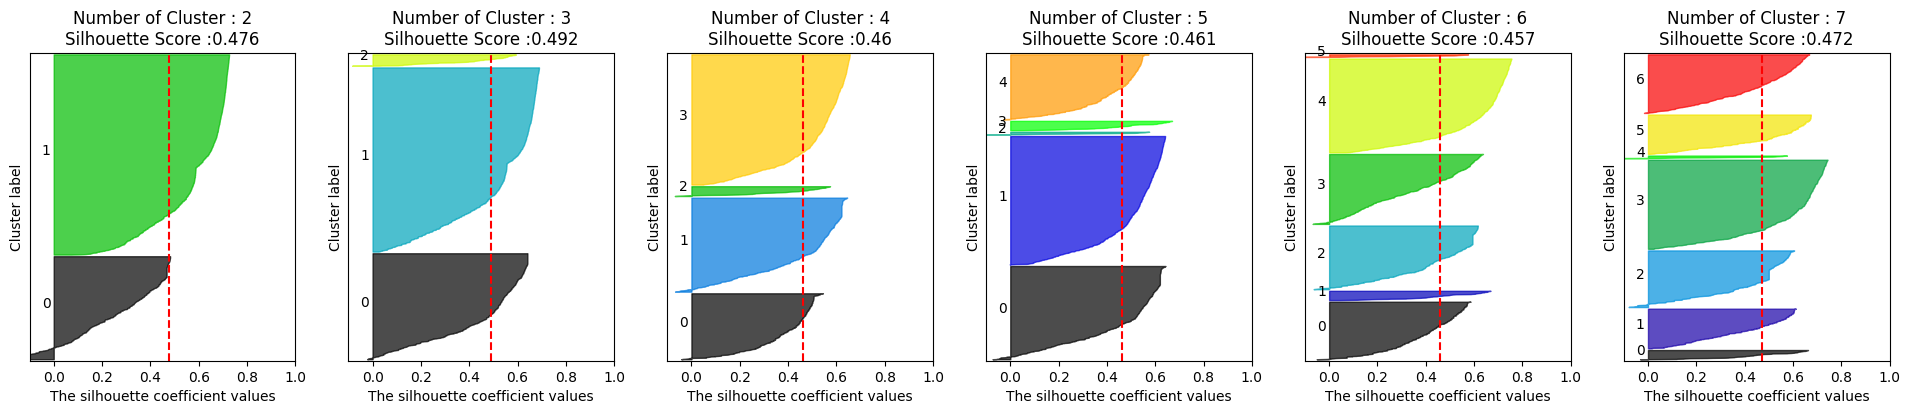

In [69]:
visualize_silhouette([2,3,4,5,6,7], X) 

In [70]:
# 최적의 클러스터로 kmeas 수행
k = 3
kmeans_value2 = KMeans(n_clusters=k, random_state=42) 
y_pred_value2 = kmeans_value2.fit_predict(value_zscore_data2) 

## cluster열 추가
value_zscore_data2['Cluster']=y_pred_value2  # 새로운 열 추가 

## cluster 결과 확인
value_zscore_data2.Cluster.value_counts()

Cluster
0    1214
1     702
2      76
Name: count, dtype: int64

DBSCAN으로 재수행한 경우

In [71]:
# 데이터
data = value_zscore_data2.iloc[:,:-1]

# DBSCAN 모델 생성
dbscan = DBSCAN(eps=0.3, min_samples=2)

# 클러스터링 수행
labels = dbscan.fit_predict(data)

# 클러스터링 결과 출력
print(labels)

[0 0 0 ... 0 0 0]


In [72]:
value_zscore_data3 = data.copy()
value_zscore_data3['Cluster'] = labels
value_zscore_data3

PER(배)    PBR(배)  Cluster
Name                                   
삼성전자       -0.196697 -0.219802        0
SK하이닉스     -0.110471 -0.302964        0
LG화학       -0.105776 -0.091860        0
삼성SDI      -0.126024  0.221597        0
현대차        -0.202468 -0.408516        0
...              ...       ...      ...
유진스팩6호      1.001070 -0.210206        0
유진스팩9호      0.000000 -0.235795        0
엔에이치스팩25호   0.386634 -0.184618        0
하나금융20호스팩   0.826124 -0.216603        0
IBKS제17호스팩  0.000000 -0.178221        0

[1992 rows x 3 columns]

In [73]:
value_zscore_data3.Cluster.value_counts()

Cluster
0    1989
1       3
Name: count, dtype: int64

계층적클러스터링으로 재수행

In [74]:
# 계층적 클러스터링 모델 생성
clusterig = AgglomerativeClustering(n_clusters=2)

# 클러스터링 수행
labels = clusterig.fit_predict(data)

# 클러스터링 결과 출력
print(labels)

[1 1 0 ... 0 0 0]


In [75]:
value_zscore_data4 = data.copy()
value_zscore_data4['Cluster'] = labels
value_zscore_data4

PER(배)    PBR(배)  Cluster
Name                                   
삼성전자       -0.196697 -0.219802        1
SK하이닉스     -0.110471 -0.302964        1
LG화학       -0.105776 -0.091860        0
삼성SDI      -0.126024  0.221597        0
현대차        -0.202468 -0.408516        1
...              ...       ...      ...
유진스팩6호      1.001070 -0.210206        0
유진스팩9호      0.000000 -0.235795        0
엔에이치스팩25호   0.386634 -0.184618        0
하나금융20호스팩   0.826124 -0.216603        0
IBKS제17호스팩  0.000000 -0.178221        0

[1992 rows x 3 columns]

In [76]:
value_zscore_data4.Cluster.value_counts()

Cluster
1    1025
0     967
Name: count, dtype: int64

➡️ 3가지 방법으로 클러스터링 재분류한 결과, factor1은 계층적 클러스터링으로 재수행했을 때 위와 같이 잘 분류되었음을 알 수 있음.

Decision Tree를 이용한 feature_importances_

Accuracy: 1.00


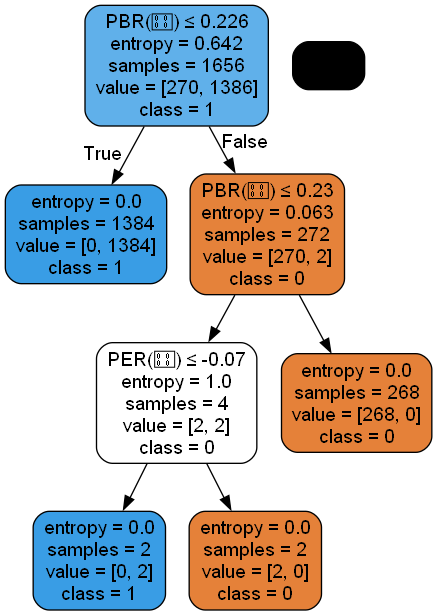

In [77]:
X = value_zscore_data.iloc[:,:2]
Y = value_zscore_data['Cluster'] 


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
tree.fit(X_train, y_train)


y_pred_tr = tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

dot_data = export_graphviz(tree, out_file=None, feature_names= X.columns,
                          class_names=['0','1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [78]:
importance_value= pd.DataFrame()
importance_value= pd.DataFrame()
importance_value['feacture'] = pd.DataFrame(list(value_zscore_data.columns[:2])) 
importance_value['importance'] = tree.feature_importances_
importance_value= importance_value.sort_values(by=importance_value.columns[1],ascending=False)
importance_value

feacture  importance
1   PBR(배)    0.996235
0   PER(배)    0.003765

In [79]:
print( "1번째로 중요한 데이터와 중요도: ",importance_value.iloc[0]['feacture'], "=",importance_value.iloc[0]['importance']) 
print( "2번째로 중요한 데이터와 중요도: ",importance_value.iloc[1]['feacture'], "=",importance_value.iloc[1]['importance']) 

1번째로 중요한 데이터와 중요도:  PBR(배) = 0.9962349113827036
2번째로 중요한 데이터와 중요도:  PER(배) = 0.003765088617296393


### factor2: 성장성으로 클러스터링

In [80]:
growth_zscore_data

영업이익증가율(전년동기)(%)  영업이익증가율(3년평균)(%)
Name                                          
삼성전자               -0.184030         -0.095105
LG에너지솔루션           -0.047108          0.000000
SK하이닉스             -0.237999          0.245677
삼성바이오로직스           -0.000566          1.705853
LG화학               -0.229239          0.553881
...                      ...               ...
키움제6호스팩             0.000000          0.000000
유진스팩9호              0.000000          0.000000
엔에이치스팩25호           0.000000          0.000000
하나금융20호스팩           0.000000          0.000000
IBKS제17호스팩          0.000000          0.000000

[2373 rows x 2 columns]

In [81]:
k = 5
kmeans_growth = KMeans(n_clusters=k, random_state=42) # 5개의 군집화로 KMeans 실행 
y_pred_growth = kmeans_growth.fit_predict(growth_zscore_data) # zscore 값으로 y_pred : 예측 값 

kmeans_growth.cluster_centers_

array([[-0.21304519, -1.04751236],
       [-0.04456784,  0.03275925],
       [-0.03130816,  1.00590169],
       [-0.14136205, -0.40856877],
       [ 0.91826825, -0.09017359]])

In [82]:
np.unique(y_pred_growth[:]) # 라벨링 잘 되어있음

array([0, 1, 2, 3, 4])

In [83]:
X = growth_zscore_data.values
y = y_pred_growth

In [84]:
# 위 데이터셋의 산점도

plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1], s=1, c=y)
plt.scatter(kmeans_growth.cluster_centers_[:,0],kmeans_growth.cluster_centers_[:,1], marker='s', c='b')
plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.show()

중심점 초기화

방법1) 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션을 선택

max_iter=1일 때 클러스터 중심좌표
[[-0.15 -0.56]
 [-0.21  0.08]
 [ 0.01  0.88]
 [-0.14  0.37]
 [ 0.01 -0.01]]


max_iter=2일 때 클러스터 중심좌표
[[-0.16 -0.64]
 [-0.19  0.01]
 [-0.    1.08]
 [-0.08  0.4 ]
 [ 0.02 -0.02]]


max_iter=3일 때 클러스터 중심좌표
[[-0.16 -0.7 ]
 [-0.18 -0.05]
 [-0.01  1.18]
 [-0.06  0.44]
 [ 0.04 -0.02]]


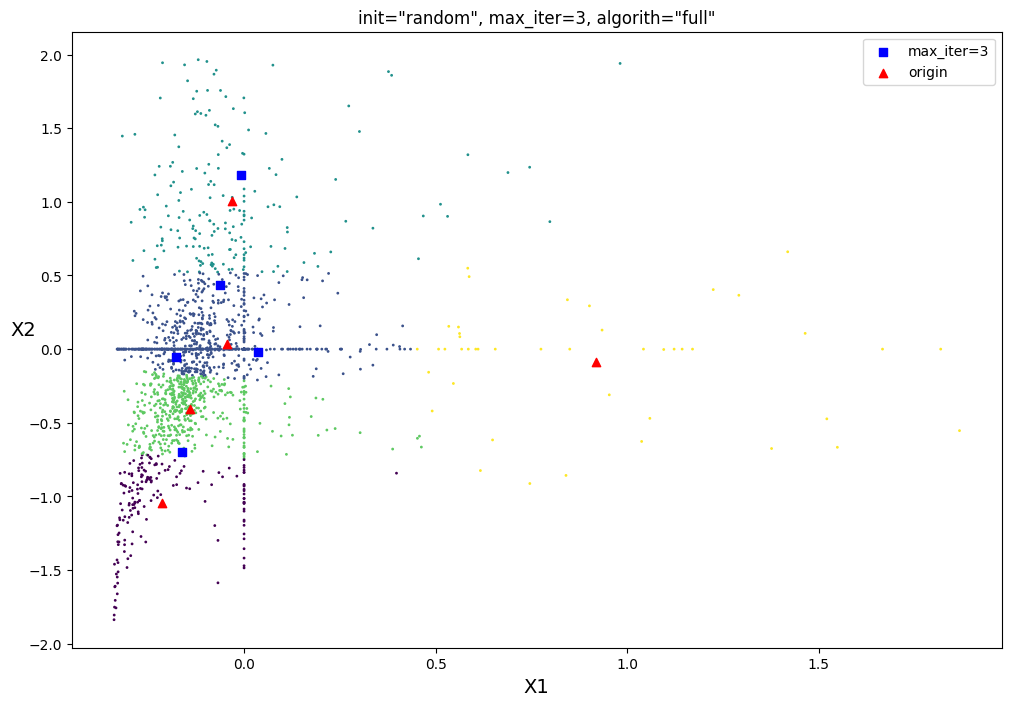

max_iter=4일 때 클러스터 중심좌표
[[-0.16 -0.74]
 [-0.17 -0.1 ]
 [-0.01  1.23]
 [-0.06  0.46]
 [ 0.04 -0.01]]


max_iter=5일 때 클러스터 중심좌표
[[-0.16 -0.78]
 [-0.17 -0.14]
 [-0.01  1.27]
 [-0.06  0.48]
 [ 0.04  0.  ]]


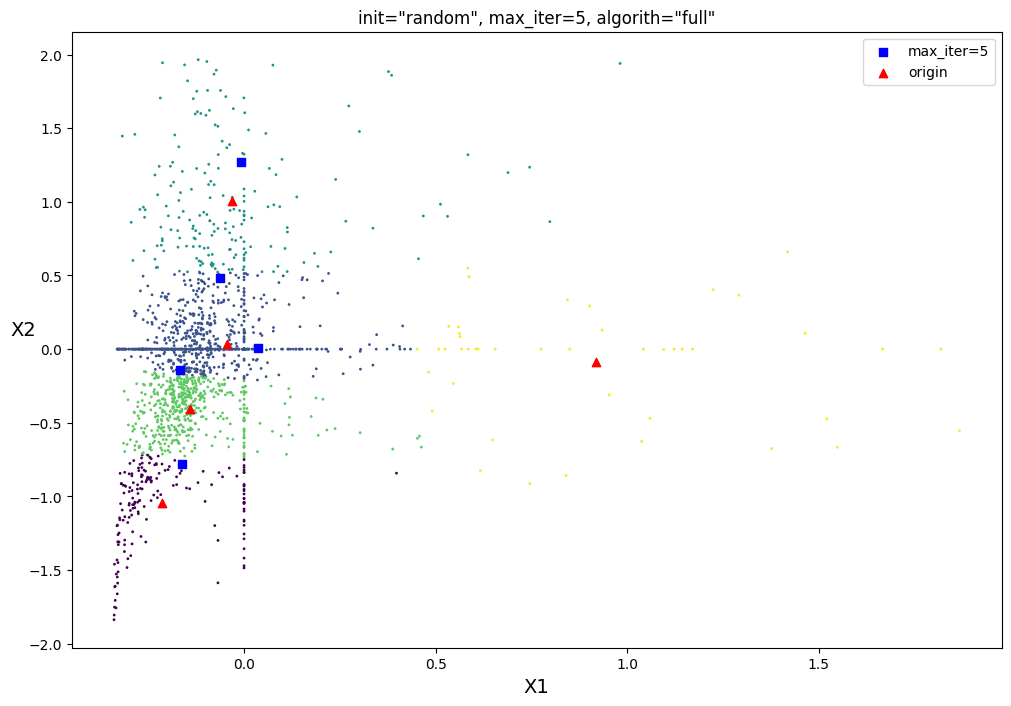

max_iter=6일 때 클러스터 중심좌표
[[-0.16 -0.82]
 [-0.17 -0.19]
 [-0.01  1.29]
 [-0.06  0.5 ]
 [ 0.03  0.01]]


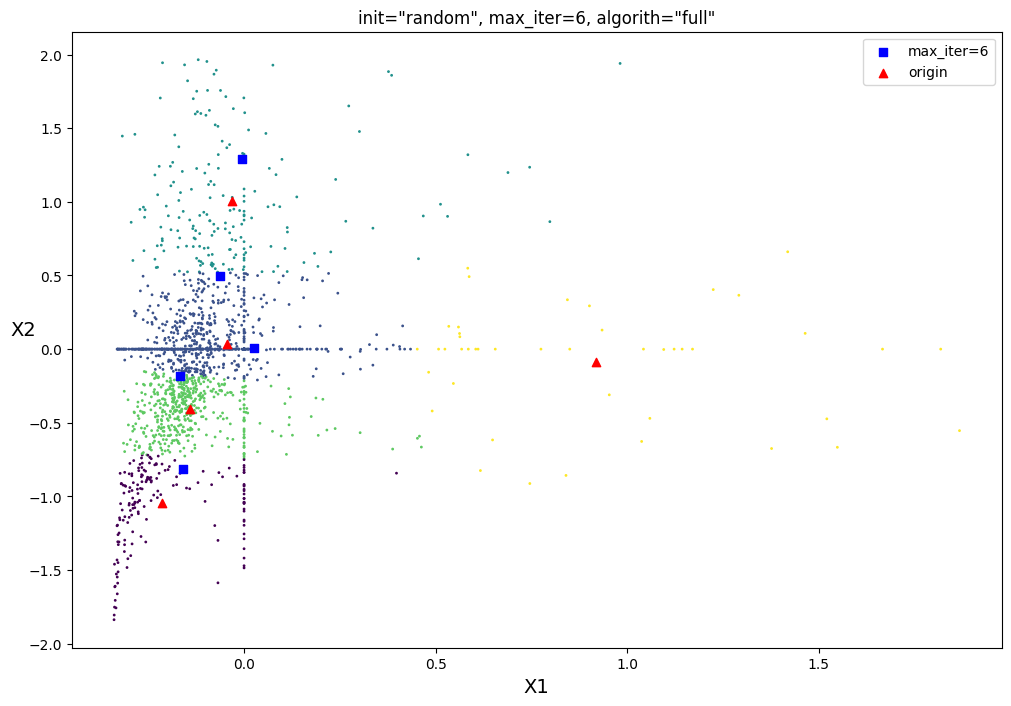

max_iter=7일 때 클러스터 중심좌표
[[-0.17 -0.85]
 [-0.17 -0.22]
 [-0.    1.31]
 [-0.06  0.51]
 [ 0.02  0.01]]


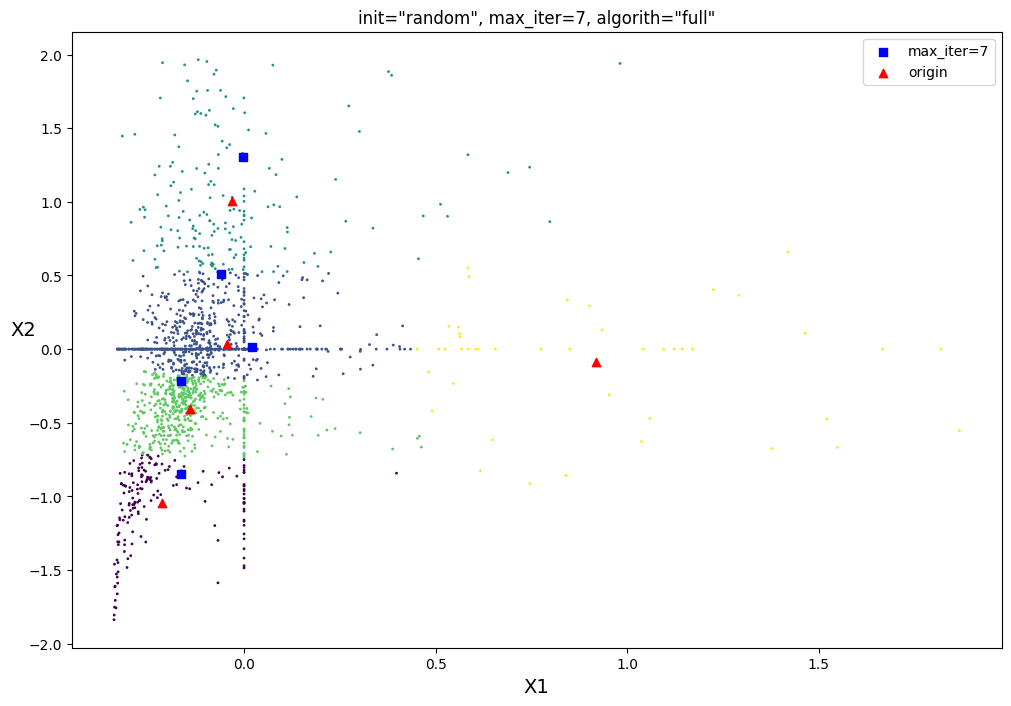

max_iter=8일 때 클러스터 중심좌표
[[-0.17 -0.87]
 [-0.16 -0.24]
 [-0.    1.32]
 [-0.06  0.53]
 [ 0.01  0.01]]


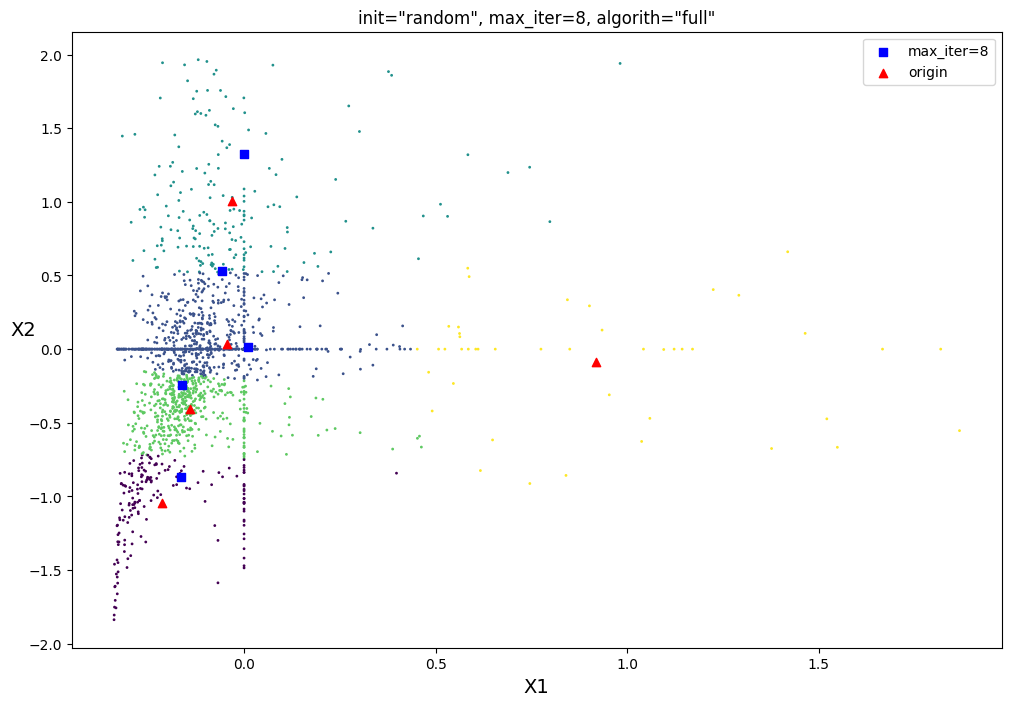

max_iter=9일 때 클러스터 중심좌표
[[-0.17 -0.89]
 [-0.16 -0.28]
 [-0.01  1.34]
 [-0.05  0.54]
 [ 0.    0.01]]


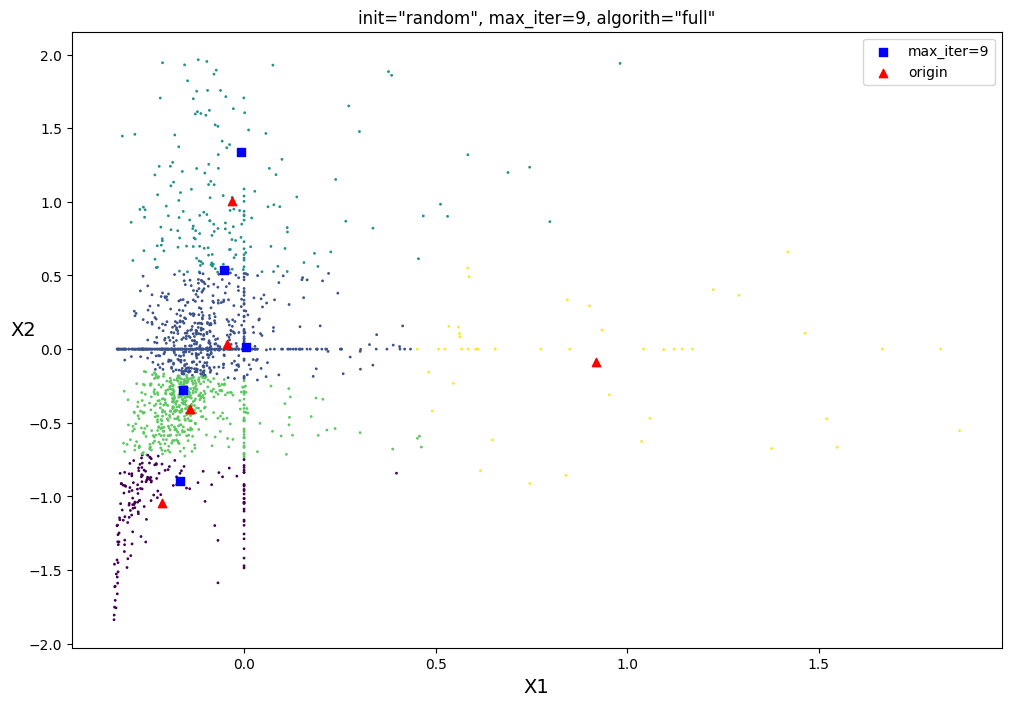

max_iter=10일 때 클러스터 중심좌표
[[-0.18 -0.92]
 [-0.15 -0.32]
 [-0.01  1.37]
 [-0.05  0.56]
 [-0.01  0.01]]


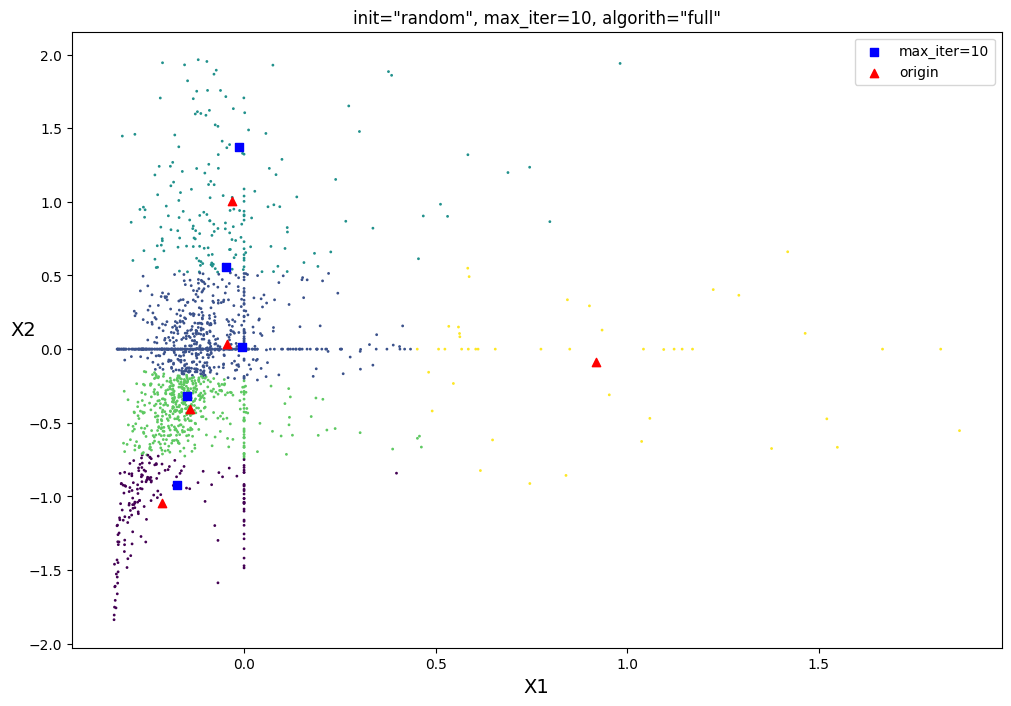

In [85]:
max_iters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for iter_n in max_iters:  # max_iter 변화시키면서 군집 수행
    kmeans = KMeans(n_clusters=k, init='random', n_init=1,
                    max_iter=iter_n, algorithm='full', random_state=0)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    print(f'max_iter={iter_n}일 때 클러스터 중심좌표\n{np.round(centers,2)}')
    title = f'init="random", max_iter={iter_n}, algorith="full"'
    draw_cluster(X,y,centers=[(f'max_iter={iter_n}', centers),
                              ('origin',kmeans_growth.cluster_centers_)],
                title=title)

방법2) k-means ++ 초기화 알고리즘 사용

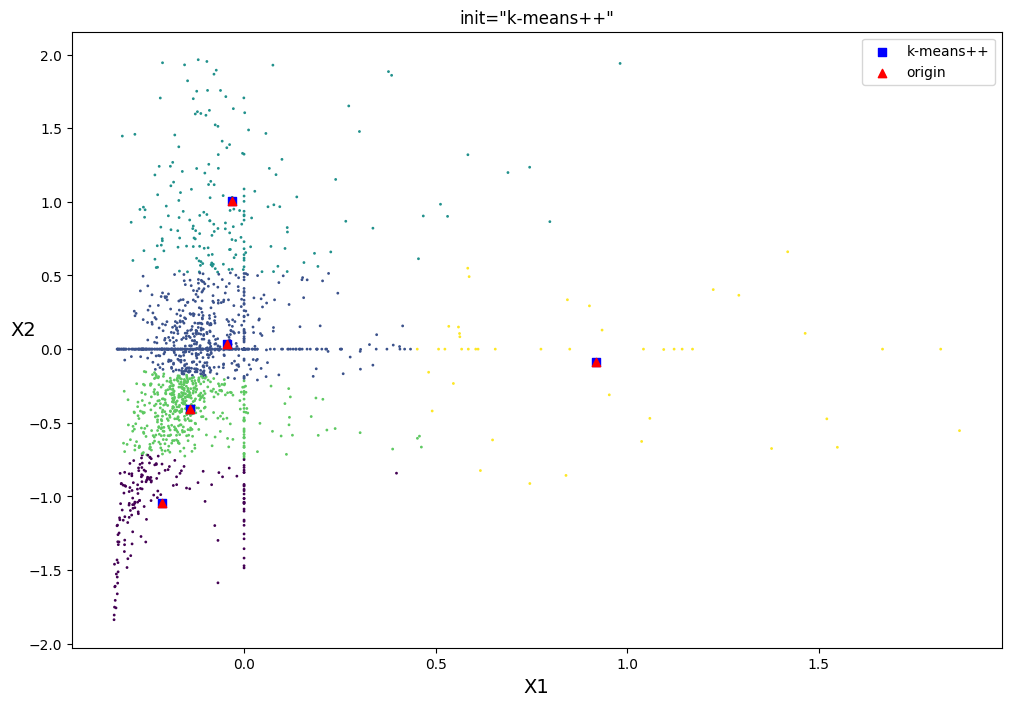

In [86]:
k=5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X)
kp_centers = kmeans.cluster_centers_
draw_cluster(X,y,centers=[('k-means++', kp_centers),
                          ('origin', kmeans_growth.cluster_centers_)], 
             title='init="k-means++"')

최적의 클러스터 개수 찾기

방법1) 이너셔가 급격히 작아지는 elbow의 K선택

In [87]:
kmeans_grwoth = [KMeans(n_clusters=k, random_state=42).fit(X) 
                for k in range(1,11)]
inertias = [model.inertia_ for model in kmeans_grwoth]
inertias_s = pd.Series(data=inertias, 
                       index=['k='+str(k) for k in range(1,11)])
inertias_s

k=1     621.307404
k=2     365.091182
k=3     195.880432
k=4     154.879698
k=5     116.879851
k=6      87.460155
k=7      76.325274
k=8      66.650789
k=9      57.990152
k=10     51.829975
dtype: float64

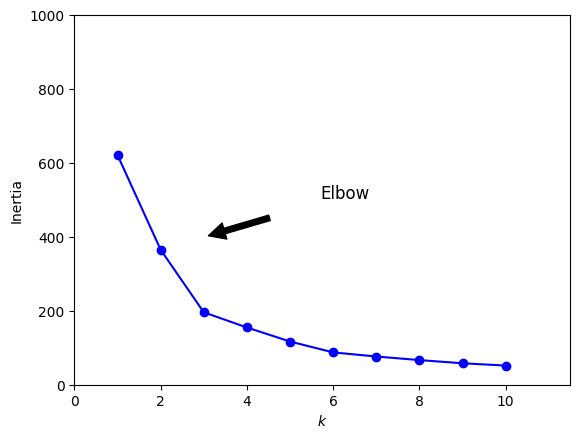

In [88]:
plt.plot(range(1,11), inertias, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Inertia')
plt.axis([0,11.5,0,1000]) #(x축범위시작,끝,y축범위시작,끝)
plt.annotate('Elbow',xy=(2,inertias[1]),xytext=(0.5,0.5),
            textcoords='figure fraction',
            fontsize=12,
            arrowprops=dict(facecolor='black',shrink=0.3))
plt.show()

방법2) 실루엣 점수로 찾기

In [89]:
k = 5
kmeans_growth = KMeans(n_clusters=k, random_state=42).fit(X)
# kmeans에 대한 실루엣점수
silhouette_score(X, kmeans_growth.labels_) # 묶여진 군집의 결과가 잘 묶였는지

0.5743203346224091

In [90]:
# 클러스터 개수에 따른 실루엣 점수 비교
kmeans_perk= [KMeans(n_clusters=k, random_state=42).fit(X) 
                for k in range(2,11)] # 실루엣 계산은 거리를 계산하는 거라 최소 2개이상의 클러스터가 되어야 함(라벨의수가 2이상)
sil_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_perk]
sil_scores_s = pd.Series(data=sil_scores,
                         index=['k='+str(i) for i in range(2,11)])
sil_scores_s

k=2     0.533318
k=3     0.607953
k=4     0.551042
k=5     0.574320
k=6     0.588796
k=7     0.550356
k=8     0.546504
k=9     0.554910
k=10    0.564799
dtype: float64

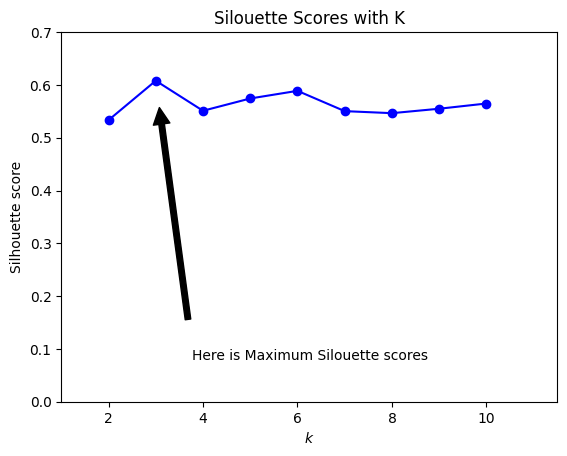

In [91]:
plt.plot(range(2,11), sil_scores, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.axis([1,11.5,0,0.7]) #(x축범위시작,끝,y축범위시작,끝)
plt.title('Silouette Scores with K')
plt.annotate('Here is Maximum Silouette scores ', 
             xy=(3,sil_scores[1]),
             xytext=(0.3,0.2),
             textcoords='figure fraction',
             fontsize=10, 
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

In [92]:
visualize_silhouette([2,3,4,5,6,7], X)

클러스터 라벨링 작업

In [93]:
k = 3
kmeans_growth = KMeans(n_clusters=k, random_state=42) 
y_pred_growth = kmeans_growth.fit_predict(growth_zscore_data) # zscore 값으로 y_pred : 예측 값 

In [94]:
## cluster열 추가
growth_zscore_data['Cluster']=y_pred_growth  # 새로운 열 추가 
len(growth_zscore_data['Cluster'].unique()) # 추가된 열의 요소 갯수

3

In [95]:
growth_zscore_data.Cluster.value_counts()

Cluster
0    1704
1     451
2     218
Name: count, dtype: int64

In [96]:
growth_zscore_data[growth_zscore_data.Cluster==0].describe()

영업이익증가율(전년동기)(%)  영업이익증가율(3년평균)(%)  Cluster
count       1704.000000       1704.000000   1704.0
mean          -0.037371         -0.012027      0.0
std            0.178607          0.139883      0.0
min           -0.331454         -0.553619      0.0
25%           -0.129603          0.000000      0.0
50%            0.000000          0.000000      0.0
75%            0.000000          0.000000      0.0
max            1.867696          0.464247      0.0

In [97]:
growth_zscore_data[growth_zscore_data.Cluster==1].describe()

영업이익증가율(전년동기)(%)  영업이익증가율(3년평균)(%)  Cluster
count        451.000000        451.000000    451.0
mean          -0.153110         -0.724162      1.0
std            0.196433          0.313095      0.0
min           -0.339418         -1.837456      1.0
25%           -0.265484         -0.901641      1.0
50%           -0.193754         -0.636875      1.0
75%           -0.118514         -0.474671      1.0
max            1.548846         -0.343840      1.0

In [98]:
growth_zscore_data[growth_zscore_data.Cluster==2].describe()

영업이익증가율(전년동기)(%)  영업이익증가율(3년평균)(%)  Cluster
count        218.000000        218.000000    218.0
mean          -0.017266          0.938619      2.0
std            0.221621          0.407852      0.0
min           -0.317823          0.463385      2.0
25%           -0.132076          0.602404      2.0
50%           -0.068166          0.833643      2.0
75%            0.001243          1.184121      2.0
max            1.419146          1.965103      2.0

클러스터 재분류

클러스터링을 수행한 후에 하나의 라벨에 몰려있는 데이터를 다시 클러스터링을 진행하면, 데이터를 더 세분화하거나 몰려있는 데이터를 더 세분화할 수 있음.

KMeans로 재수행한 경우

In [99]:
# 1) 라벨 0로 분류된 주식 종목 추출
growth_zscore_data2 = growth_zscore_data[growth_zscore_data.Cluster==0].iloc[:,:2]
growth_zscore_data2

영업이익증가율(전년동기)(%)  영업이익증가율(3년평균)(%)
Name                                          
삼성전자               -0.184030         -0.095105
LG에너지솔루션           -0.047108          0.000000
SK하이닉스             -0.237999          0.245677
현대차                -0.067314          0.312041
NAVER              -0.157324         -0.300057
...                      ...               ...
키움제6호스팩             0.000000          0.000000
유진스팩9호              0.000000          0.000000
엔에이치스팩25호           0.000000          0.000000
하나금융20호스팩           0.000000          0.000000
IBKS제17호스팩          0.000000          0.000000

[1704 rows x 2 columns]

In [100]:
# 2) 라벨 1로 분류된 주식끼리 다시 클러스터링
k = 5
kmeans_growth2 = KMeans(n_clusters=k, random_state=42) # 5개의 군집화로 KMeans 실행 
y_pred_growth2 = kmeans_growth2.fit_predict(growth_zscore_data2) # zscore 값으로 y_pred : 예측 값 

kmeans_growth2.cluster_centers_

array([[ 8.21496298e-03,  5.11998271e-04],
       [ 9.25609832e-01, -1.48622280e-02],
       [-1.33094410e-01, -2.40148508e-01],
       [-9.83858807e-02,  2.87837413e-01],
       [-1.86240508e-01,  1.10829763e-02]])

In [101]:
X = growth_zscore_data2.values
y = y_pred_growth2

In [102]:
# 최적의 클러스터 개수 찾기
kmeans_growth2 = [KMeans(n_clusters=k, random_state=42).fit(X) 
                for k in range(1,11)]
inertias = [model.inertia_ for model in kmeans_growth2]
inertias_s = pd.Series(data=inertias, 
                       index=['k='+str(k) for k in range(1,11)])
inertias_s

k=1     87.649088
k=2     56.354988
k=3     36.913677
k=4     25.203494
k=5     18.330341
k=6     13.027024
k=7     11.387234
k=8      9.961914
k=9      8.951802
k=10     8.055263
dtype: float64

In [103]:
k = 5
kmeans_growth2 = KMeans(n_clusters=k, random_state=42).fit(X)
# kmeans에 대한 실루엣점수
silhouette_score(X, kmeans_growth2.labels_) # 묶여진 군집의 결과가 잘 묶였는지

0.6576856219642889

In [104]:
# 클러스터 개수에 따른 실루엣 점수 비교
kmeans_perk= [KMeans(n_clusters=k, random_state=42).fit(X) 
                for k in range(2,11)] # 실루엣 계산은 거리를 계산하는 거라 최소 2개이상의 클러스터가 되어야 함(라벨의수가 2이상)
sil_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_perk]
sil_scores_s = pd.Series(data=sil_scores,
                         index=['k='+str(i) for i in range(2,11)])
sil_scores_s

k=2     0.790968
k=3     0.549967
k=4     0.614675
k=5     0.657686
k=6     0.673966
k=7     0.675946
k=8     0.674808
k=9     0.655230
k=10    0.666375
dtype: float64

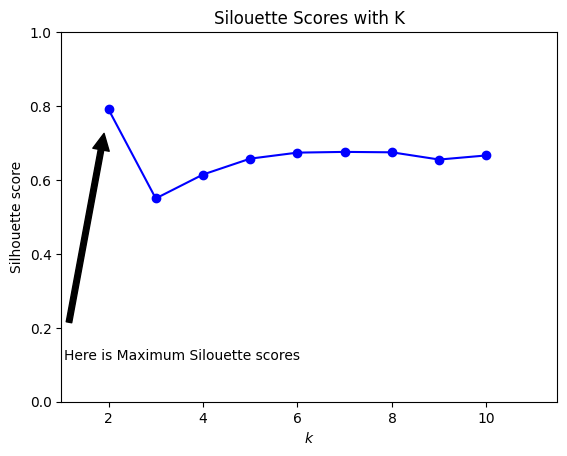

In [105]:
plt.plot(range(2,11), sil_scores, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.axis([1,11.5,0,1]) #(x축범위시작,끝,y축범위시작,끝)
plt.title('Silouette Scores with K')
plt.annotate('Here is Maximum Silouette scores ', 
             xy=(2,sil_scores[0]),
             xytext=(0.1,0.2),
             textcoords='figure fraction',
             fontsize=10, 
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

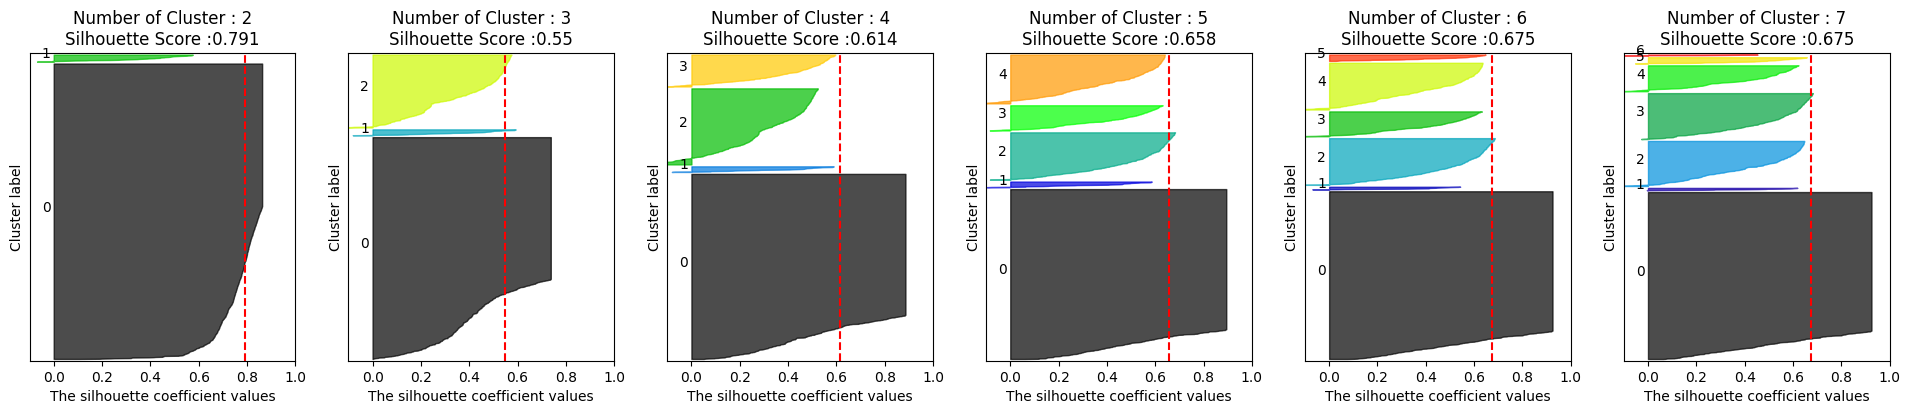

In [106]:
visualize_silhouette([2,3,4,5,6,7], X) 

➡️실루엣 점수가 0.5이상이어야 상당히 좋은 클러스터링 결과로 간주됨. 즉, 클러스터 내의 샘플들이 밀집되어 있고, 클러스터 간에 잘 구분이 되어있음 나타냄. 실루엣 점수가 0에 가까운 경우에는 클러스터 간에 중첩이 많거나 데이터가 분리되지 않은 경우가 있음. growth_zscore_data2를 재분류한 결과 k=2로 했을때 실루엣 점수가 0.791로 1에 가까워 클러스터링이 매우 잘됨을 알 수 있음

In [107]:
# 최적의 클러스터로 kmeas 수행
k = 2
kmeans_growth2 = KMeans(n_clusters=k, random_state=42) 
y_pred_growth2 = kmeans_growth2.fit_predict(growth_zscore_data2) 

## cluster열 추가
growth_zscore_data2['Cluster']=y_pred_growth2  # 새로운 열 추가 

## cluster 결과 확인
growth_zscore_data2.Cluster.value_counts()

Cluster
1    1664
0      40
Name: count, dtype: int64

DBSCAN으로 재수행한 경우

In [108]:
# 데이터
data = growth_zscore_data2.iloc[:,:-1]

# DBSCAN 모델 생성
dbscan = DBSCAN(eps=0.3, min_samples=2)

# 클러스터링 수행
labels = dbscan.fit_predict(data)

# 클러스터링 결과 출력
print(labels)

[0 0 0 ... 0 0 0]


In [109]:
growth_zscore_data3 = data.copy()
growth_zscore_data3['Cluster'] = labels
growth_zscore_data3

영업이익증가율(전년동기)(%)  영업이익증가율(3년평균)(%)  Cluster
Name                                                   
삼성전자               -0.184030         -0.095105        0
LG에너지솔루션           -0.047108          0.000000        0
SK하이닉스             -0.237999          0.245677        0
현대차                -0.067314          0.312041        0
NAVER              -0.157324         -0.300057        0
...                      ...               ...      ...
키움제6호스팩             0.000000          0.000000        0
유진스팩9호              0.000000          0.000000        0
엔에이치스팩25호           0.000000          0.000000        0
하나금융20호스팩           0.000000          0.000000        0
IBKS제17호스팩          0.000000          0.000000        0

[1704 rows x 3 columns]

In [110]:
growth_zscore_data3.Cluster.value_counts()

Cluster
 0    1695
 3       3
 1       2
 2       2
-1       2
Name: count, dtype: int64

계층적클러스터링으로 재수행

In [111]:
# 계층적 클러스터링 모델 생성
clusterig = AgglomerativeClustering(n_clusters=2)

# 클러스터링 수행
labels = clusterig.fit_predict(data)

# 클러스터링 결과 출력
print(labels)

[0 0 0 ... 0 0 0]


In [112]:
growth_zscore_data4 = data.copy()
growth_zscore_data4['Cluster'] = labels
growth_zscore_data4

영업이익증가율(전년동기)(%)  영업이익증가율(3년평균)(%)  Cluster
Name                                                   
삼성전자               -0.184030         -0.095105        0
LG에너지솔루션           -0.047108          0.000000        0
SK하이닉스             -0.237999          0.245677        0
현대차                -0.067314          0.312041        0
NAVER              -0.157324         -0.300057        0
...                      ...               ...      ...
키움제6호스팩             0.000000          0.000000        0
유진스팩9호              0.000000          0.000000        0
엔에이치스팩25호           0.000000          0.000000        0
하나금융20호스팩           0.000000          0.000000        0
IBKS제17호스팩          0.000000          0.000000        0

[1704 rows x 3 columns]

In [113]:
growth_zscore_data4.Cluster.value_counts()

Cluster
0    1685
1      19
Name: count, dtype: int64

➡️ factor2를 재분류한 결과, 3가지 모델중 kmeans로 수행했을 때가 그나마 잘 분류됨. 그러나 의미가 없어 기존에 분류된 결과를 활용할 것임

Decision Tree를 이용한 feature_importances_

Accuracy: 1.00


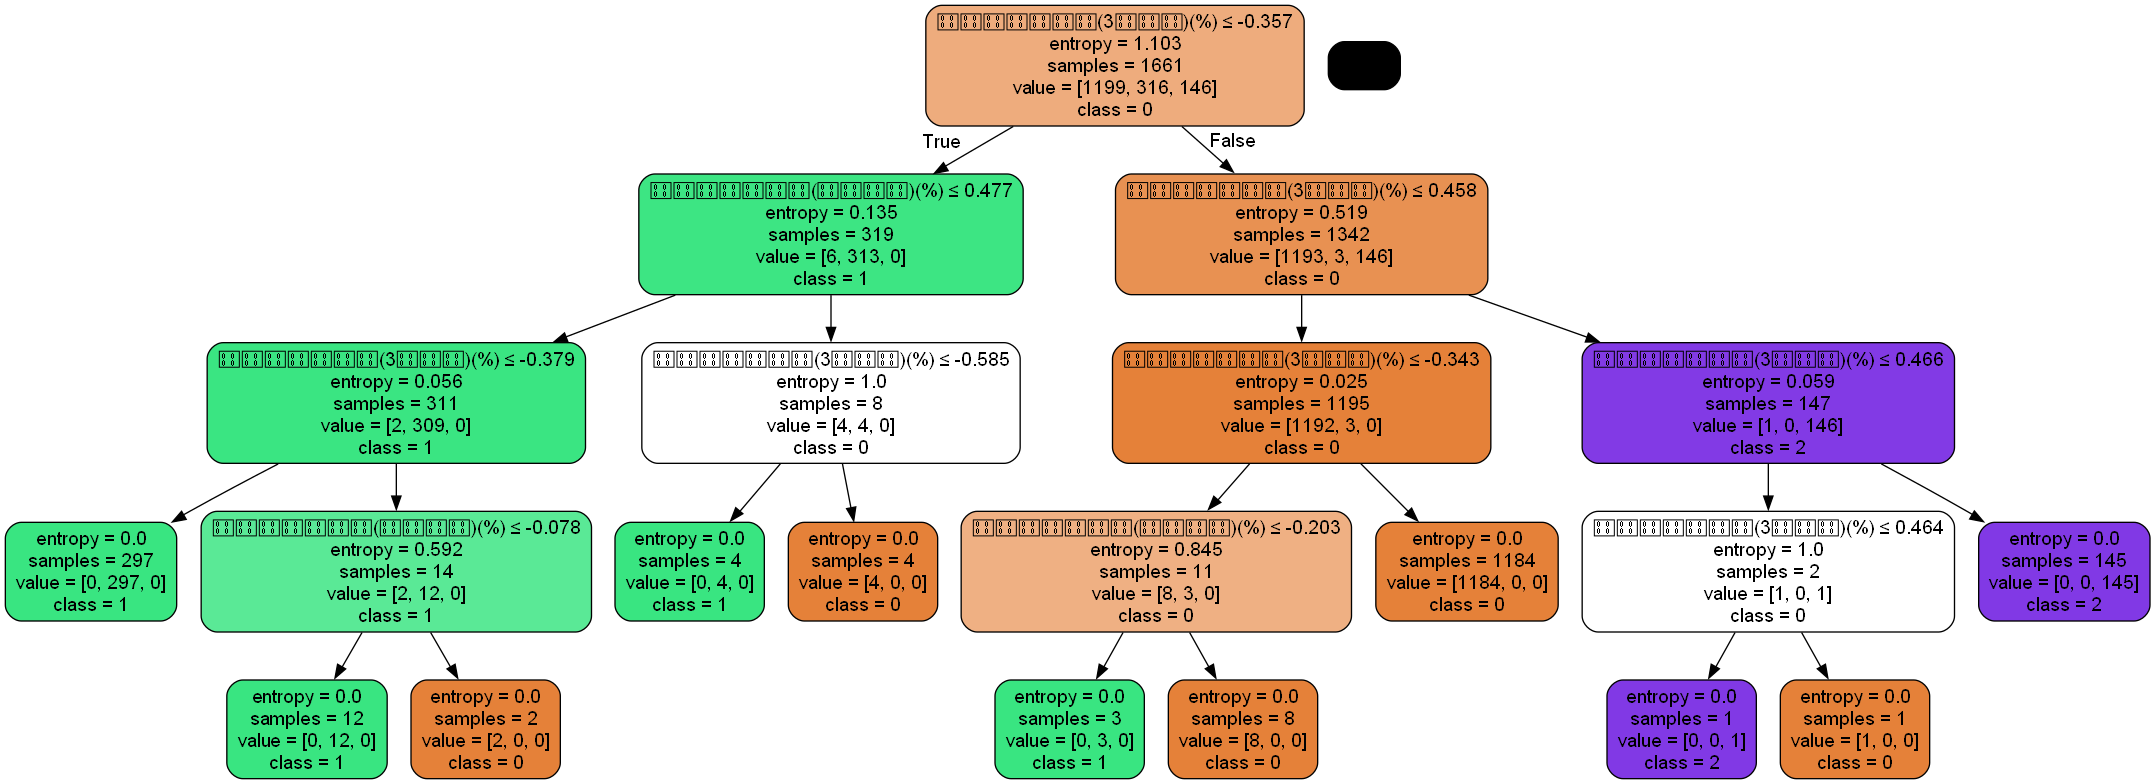

In [114]:

X = growth_zscore_data.iloc[:,:2] 
Y = growth_zscore_data['Cluster'] # 클러스터링 Number Y화

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
tree.fit(X_train, y_train)

y_pred_tr = tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))


dot_data = export_graphviz(tree, out_file=None, feature_names= X.columns,
                          class_names=['0','1','2'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [115]:
importance_growth= pd.DataFrame()
importance_growth['feacture'] = pd.DataFrame(list(growth_zscore_data.columns[:2]))
importance_growth['importance'] = tree.feature_importances_
importance_growth= importance_growth.sort_values(by=importance_growth.columns[1],ascending=False)
importance_growth

feacture  importance
1  영업이익증가율(3년평균)(%)    0.980838
0  영업이익증가율(전년동기)(%)    0.019162

In [116]:
print( "1번째로 중요한 데이터와 중요도: ",importance_growth.iloc[0]['feacture'], "=",importance_growth.iloc[0]['importance']) 
print( "2번째로 중요한 데이터와 중요도: ",importance_growth.iloc[1]['feacture'], "=",importance_growth.iloc[1]['importance']) 

1번째로 중요한 데이터와 중요도:  영업이익증가율(3년평균)(%) = 0.9808382693209554
2번째로 중요한 데이터와 중요도:  영업이익증가율(전년동기)(%) = 0.01916173067904457


### factor3: 모멘텀으로 클러스터링

In [117]:
momentum_zscore_data

수익률 (현금배당반영,3개월)(%)  수익률 (현금배당반영,12개월)(%)     순매수강세
Name                                                           
삼성전자                   0.101762              0.178272  0.477517
LG에너지솔루션               0.014618              0.777877  0.146087
SK하이닉스                -0.244657             -0.109493  0.496955
삼성바이오로직스              -0.158745              0.140075  0.178405
LG화학                   0.194448              0.825222 -0.075728
...                         ...                   ...       ...
키움제6호스팩                0.156265             -0.156999  0.618659
유진스팩9호                 0.066350              0.000000 -0.038886
엔에이치스팩25호              0.021085              0.000000 -0.538318
하나금융20호스팩              0.096835              0.113272  0.171393
IBKS제17호스팩             0.055265              0.233482  0.324613

[2271 rows x 3 columns]

In [118]:
k = 5
kmeans_momentum = KMeans(n_clusters=k, random_state=42) # 5개의 군집화로 KMeans 실행 
y_pred_momentum = kmeans_momentum.fit_predict(momentum_zscore_data) # zscore 값으로 y_pred : 예측 값 

kmeans_momentum.cluster_centers_

array([[-0.11779832, -0.08497874, -0.88459305],
       [ 0.92202888,  0.49149108, -0.0203164 ],
       [ 0.35242369,  0.27991146,  0.82900425],
       [-0.07729446, -0.10187915,  0.15739804],
       [-0.63640668, -0.43249467,  0.06110125]])

In [119]:
np.unique(y_pred_momentum[:]) # 라벨링 잘 되어있음

array([0, 1, 2, 3, 4])

In [120]:
X = momentum_zscore_data.values
y = y_pred_momentum

In [121]:
# 위 데이터셋의 산점도

plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1], s=1, c=y)
plt.scatter(kmeans_momentum.cluster_centers_[:,0],kmeans_momentum.cluster_centers_[:,1], marker='s', c='b')
plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.show()

중심점 초기화

방법1) 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션을 선택

max_iter=1일 때 클러스터 중심좌표
[[-0.    0.01 -0.93]
 [ 0.05 -0.23 -0.08]
 [ 0.56  0.12  0.95]
 [-0.41 -0.22  0.13]
 [ 0.05  0.26  0.56]]


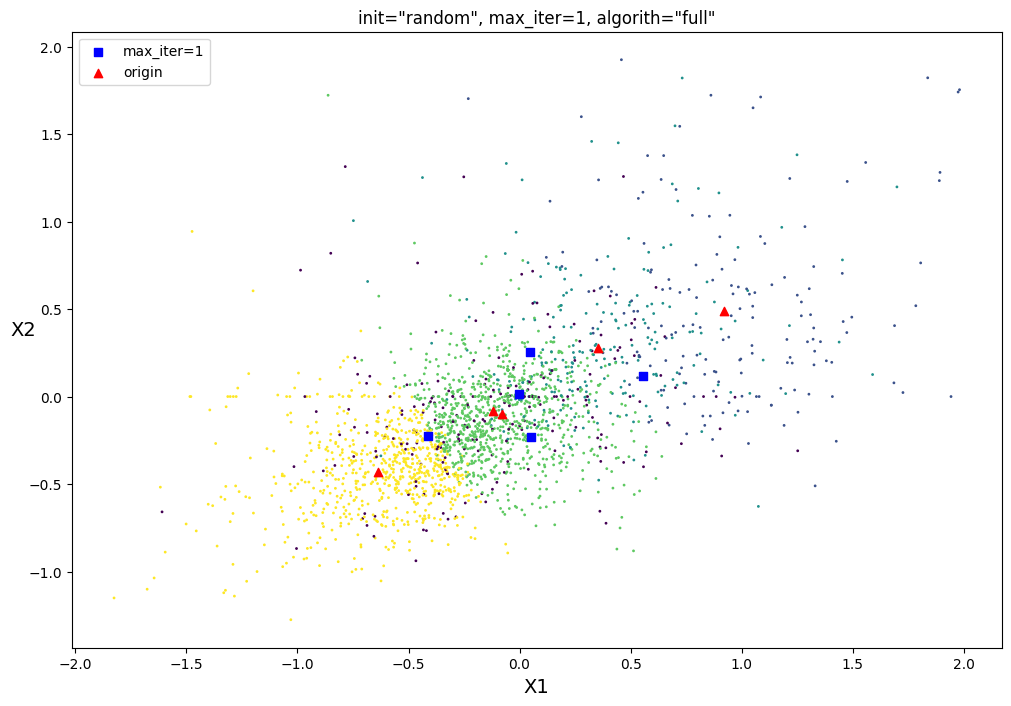

max_iter=2일 때 클러스터 중심좌표
[[ 0.02  0.01 -0.95]
 [ 0.1  -0.16 -0.01]
 [ 0.78  0.35  0.78]
 [-0.51 -0.33  0.1 ]
 [ 0.11  0.26  0.41]]


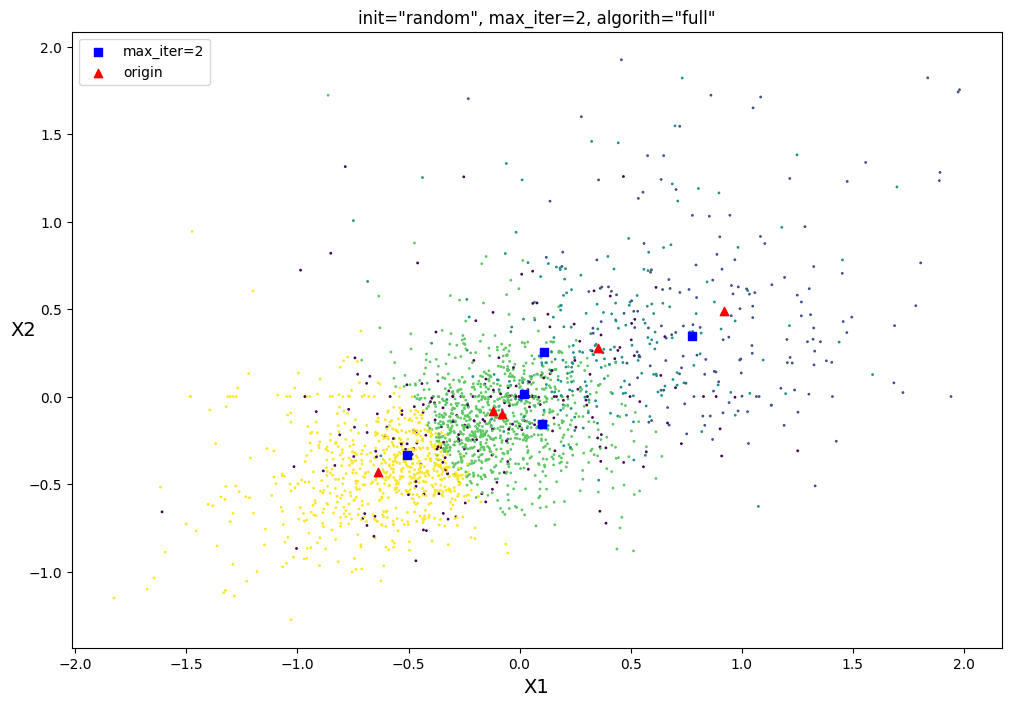

max_iter=3일 때 클러스터 중심좌표
[[ 0.04  0.03 -0.95]
 [ 0.06 -0.14  0.03]
 [ 0.87  0.47  0.65]
 [-0.54 -0.37  0.08]
 [ 0.08  0.2   0.43]]


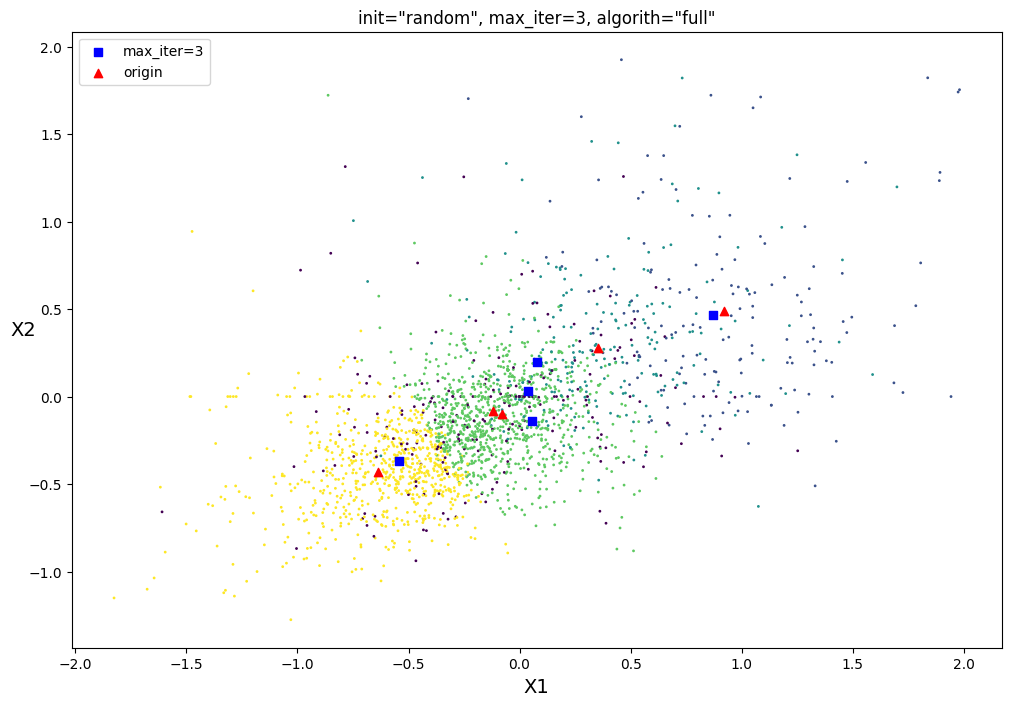

max_iter=4일 때 클러스터 중심좌표
[[ 0.05  0.03 -0.95]
 [ 0.01 -0.14  0.06]
 [ 0.91  0.52  0.54]
 [-0.57 -0.39  0.06]
 [ 0.06  0.16  0.49]]


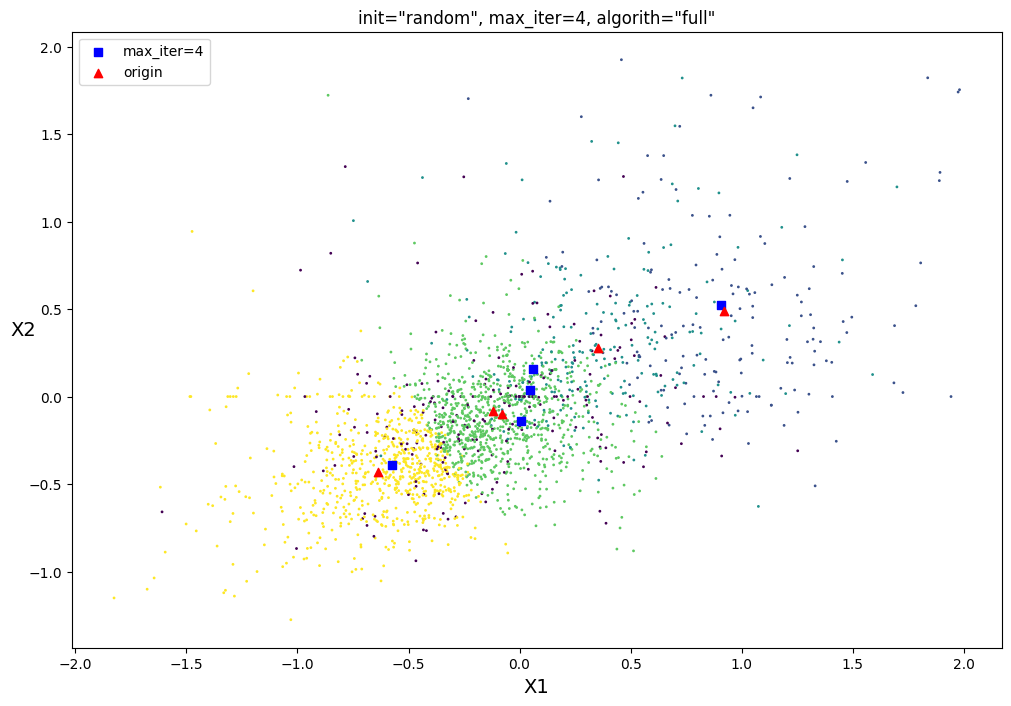

max_iter=5일 때 클러스터 중심좌표
[[ 0.06  0.03 -0.95]
 [-0.03 -0.14  0.07]
 [ 0.92  0.53  0.45]
 [-0.59 -0.4   0.05]
 [ 0.07  0.15  0.55]]


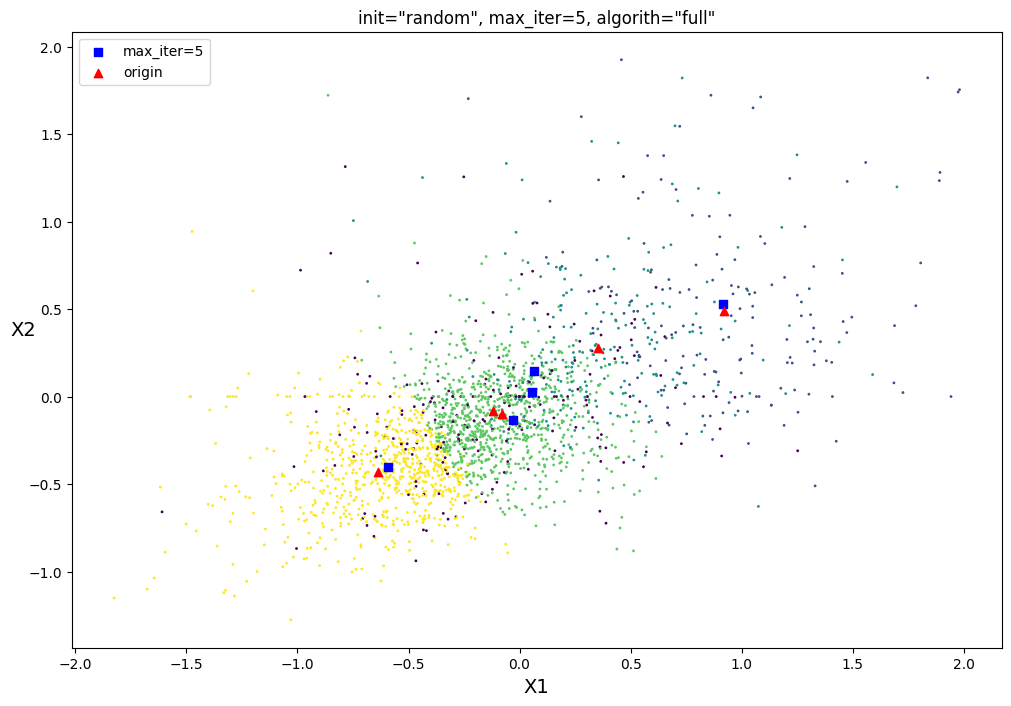

max_iter=6일 때 클러스터 중심좌표
[[ 0.07  0.02 -0.95]
 [-0.05 -0.13  0.08]
 [ 0.92  0.54  0.39]
 [-0.61 -0.41  0.04]
 [ 0.08  0.14  0.6 ]]


max_iter=7일 때 클러스터 중심좌표
[[ 0.06  0.02 -0.95]
 [-0.07 -0.12  0.09]
 [ 0.91  0.55  0.34]
 [-0.62 -0.43  0.04]
 [ 0.11  0.13  0.65]]


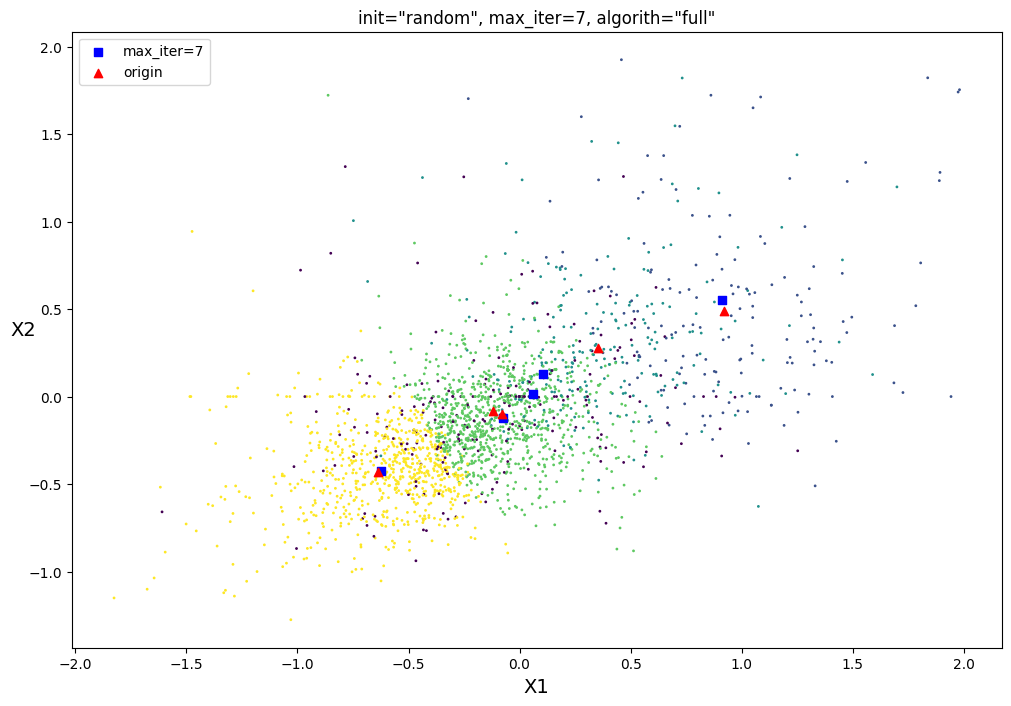

In [122]:
max_iters = [1, 2, 3, 4, 5, 6, 7]
for iter_n in max_iters:  # max_iter 변화시키면서 군집 수행
    kmeans_mometum = KMeans(n_clusters=k, init='random', n_init=1,
                    max_iter=iter_n, algorithm='full', random_state=0)
    kmeans_mometum.fit(X)
    centers = kmeans_mometum.cluster_centers_
    print(f'max_iter={iter_n}일 때 클러스터 중심좌표\n{np.round(centers,2)}')
    title = f'init="random", max_iter={iter_n}, algorith="full"'
    draw_cluster(X,y,centers=[(f'max_iter={iter_n}', centers),
                              ('origin',kmeans_momentum.cluster_centers_)],
                title=title)

방법2) k-means ++ 초기화 알고리즘 사용

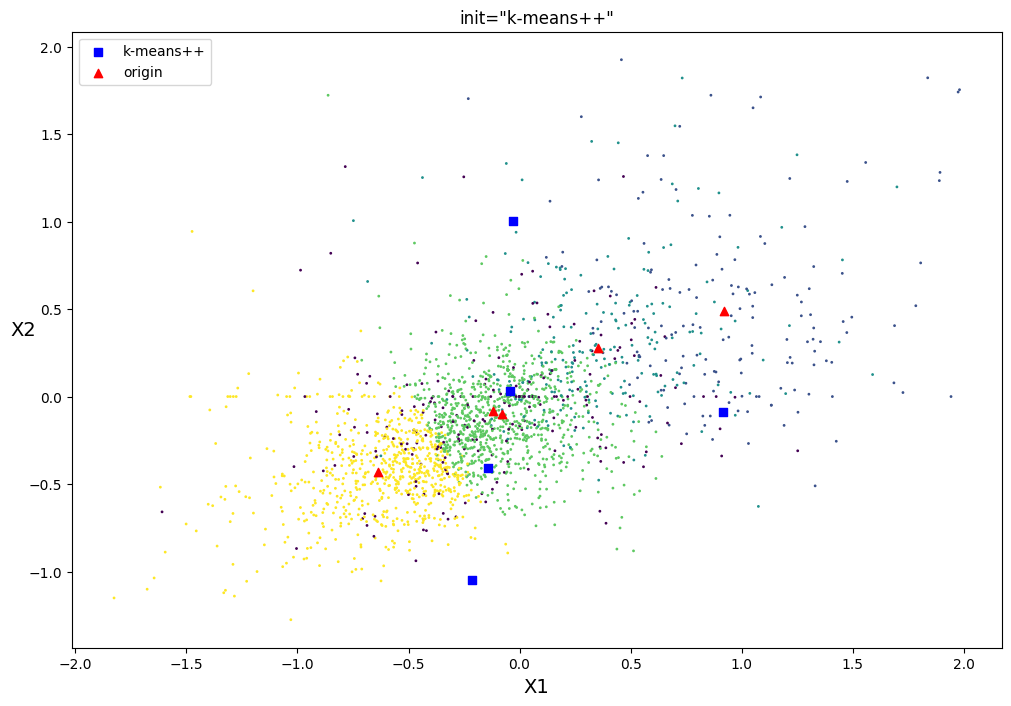

In [123]:
k=5
kmeans_momentum = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans_momentum.fit(X)
kp_centers = kmeans.cluster_centers_
draw_cluster(X,y,centers=[('k-means++', kp_centers),
                          ('origin', kmeans_momentum.cluster_centers_)], 
             title='init="k-means++"')

최적의 클러스터 개수 찾기

방법1) 이너셔가 급격히 작아지는 elbow의 K선택

In [124]:
kmeans_momentum = [KMeans(n_clusters=k, random_state=42).fit(X) 
                for k in range(1,11)]
inertias = [model.inertia_ for model in kmeans_momentum]
inertias_s = pd.Series(data=inertias, 
                       index=['k='+str(k) for k in range(1,11)])
inertias_s

k=1     1550.019648
k=2     1059.114323
k=3      840.117490
k=4      685.826182
k=5      609.815844
k=6      557.226303
k=7      509.391188
k=8      470.789336
k=9      441.037702
k=10     416.585780
dtype: float64

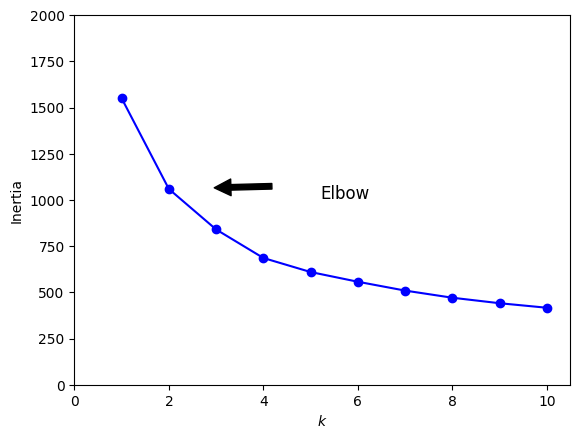

In [125]:
plt.plot(range(1,11), inertias, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Inertia')
plt.axis([0,10.5,0,2000]) #(x축범위시작,끝,y축범위시작,끝)
plt.annotate('Elbow',xy=(2,inertias[1]),xytext=(0.5,0.5),
            textcoords='figure fraction',
            fontsize=12,
            arrowprops=dict(facecolor='black',shrink=0.3))
plt.show()

방법2) 실루엣 점수로 찾기

In [126]:
k = 5
kmeans_momentum = KMeans(n_clusters=k, random_state=42).fit(X)
# kmeans에 대한 실루엣점수
silhouette_score(X, kmeans_momentum.labels_) # 묶여진 군집의 결과가 잘 묶였는지

0.2748460382071885

In [127]:
# 클러스터 개수에 따른 실루엣 점수 비교
kmeans_perk= [KMeans(n_clusters=k, random_state=42).fit(X) 
                for k in range(2,11)] # 실루엣 계산은 거리를 계산하는 거라 최소 2개이상의 클러스터가 되어야 함(라벨의수가 2이상)
sil_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_perk]
sil_scores_s = pd.Series(data=sil_scores,
                         index=['k='+str(i) for i in range(2,11)])
sil_scores_s

k=2     0.320452
k=3     0.350754
k=4     0.279596
k=5     0.274846
k=6     0.260257
k=7     0.237998
k=8     0.242607
k=9     0.235172
k=10    0.228238
dtype: float64

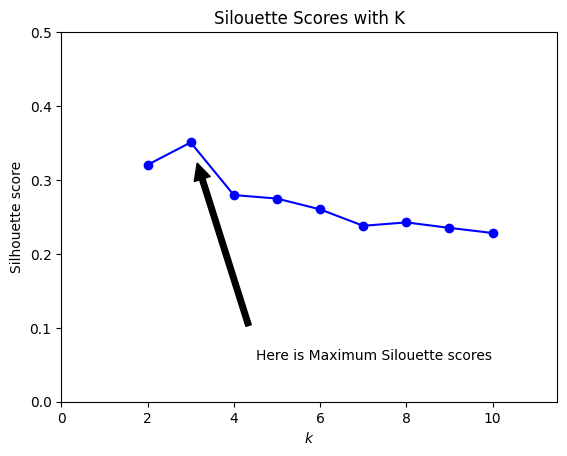

In [128]:
plt.plot(range(2,11), sil_scores, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.axis([0,11.5,0.0,0.5]) #(x축범위시작,끝,y축범위시작,끝)
plt.title('Silouette Scores with K')
plt.annotate('Here is Maximum Silouette scores ', 
             xy=(3,sil_scores[1]),
             xytext=(0.4,0.2),
             textcoords='figure fraction',
             fontsize=10, 
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

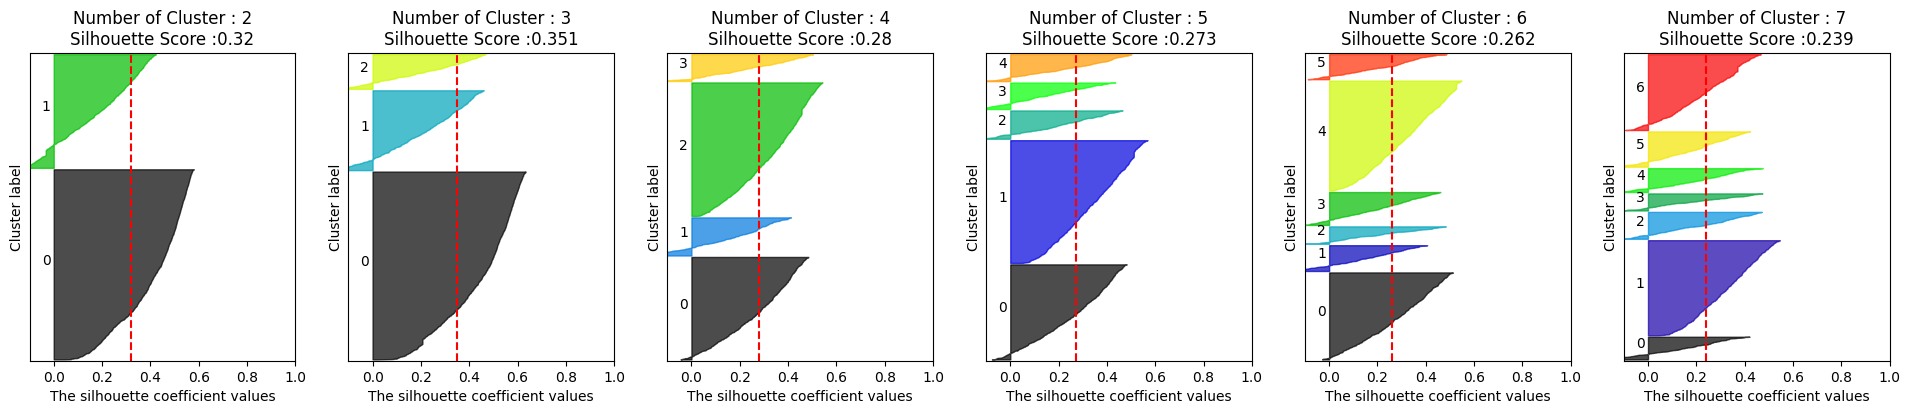

In [129]:
visualize_silhouette([2,3,4,5,6,7], X)

In [130]:
k = 3
kmeans_momentum = KMeans(n_clusters=k, random_state=42) 
y_pred_momentum = kmeans_momentum.fit_predict(momentum_zscore_data) # zscore 값으로 y_pred : 예측 값 

클러스터 라벨링 작업

In [131]:
## cluster열 추가
momentum_zscore_data['Cluster']=y_pred_momentum  # 새로운 열 추가 
len(momentum_zscore_data['Cluster'].unique()) # 추가된 열의 요소 갯수

3

In [132]:
momentum_zscore_data.Cluster.value_counts()

Cluster
0    1409
1     599
2     263
Name: count, dtype: int64

In [133]:
momentum_zscore_data[momentum_zscore_data.Cluster==0].describe()

수익률 (현금배당반영,3개월)(%)  수익률 (현금배당반영,12개월)(%)        순매수강세  Cluster
count          1409.000000           1409.000000  1409.000000   1409.0
mean             -0.400942             -0.298561     0.091621      0.0
std               0.330176              0.269359     0.277020      0.0
min              -1.825868             -1.275320    -1.433707      0.0
25%              -0.584918             -0.468999    -0.043681      0.0
50%              -0.355204             -0.292617     0.108244      0.0
75%              -0.173218             -0.118802     0.209301      0.0
max               0.513154              0.943667     1.737554      0.0

In [134]:
momentum_zscore_data[momentum_zscore_data.Cluster==1].describe()

수익률 (현금배당반영,3개월)(%)  수익률 (현금배당반영,12개월)(%)       순매수강세  Cluster
count           599.000000            599.000000  599.000000    599.0
mean              0.400891              0.249979    0.454995      1.0
std               0.443576              0.416570    0.416676      0.0
min              -0.862053             -0.871518   -0.628938      1.0
25%               0.096681             -0.011351    0.177833      1.0
50%               0.293293              0.171050    0.380603      1.0
75%               0.614616              0.430087    0.660971      1.0
max               1.981047              1.924926    1.967335      1.0

In [135]:
momentum_zscore_data[momentum_zscore_data.Cluster==2].describe()

수익률 (현금배당반영,3개월)(%)  수익률 (현금배당반영,12개월)(%)       순매수강세  Cluster
count           263.000000            263.000000  263.000000    263.0
mean              0.074887              0.010408   -0.815394      2.0
std               0.512880              0.375404    0.415884      0.0
min              -1.609702             -0.938604   -1.989001      2.0
25%              -0.254511             -0.209240   -1.105105      2.0
50%               0.021085              0.000000   -0.711850      2.0
75%               0.361961              0.105889   -0.509236      2.0
max               1.726390              1.650000   -0.137066      2.0

클러스터 재분류

클러스터링을 수행한 후에 하나의 라벨에 몰려있는 데이터를 다시 클러스터링을 진행하면, 데이터를 더 세분화하거나 몰려있는 데이터를 더 세분화할 수 있음.

KMeans로 재수행한 경우

In [136]:
# 1) 라벨 0로 분류된 주식 종목 추출
momentum_zscore_data2 = momentum_zscore_data[momentum_zscore_data.Cluster==0].iloc[:,:3]
momentum_zscore_data2

수익률 (현금배당반영,3개월)(%)  수익률 (현금배당반영,12개월)(%)     순매수강세
Name                                                          
SK하이닉스               -0.244657             -0.109493  0.496955
삼성바이오로직스             -0.158745              0.140075  0.178405
삼성SDI                -0.247121              0.329618 -0.175094
NAVER                -0.367213             -0.225530 -0.049400
카카오                  -0.561207             -0.352962  0.055110
...                        ...                   ...       ...
아리온                  -0.053126              0.152272  0.000000
에스디시스템               -0.053126              0.152272  0.000000
비엔케이제1호스팩             0.006920              0.000000 -0.043681
지나인제약                -0.053126              0.152272  0.000000
유진스팩9호                0.066350              0.000000 -0.038886

[1409 rows x 3 columns]

In [137]:
# 2) 라벨 1로 분류된 주식끼리 다시 클러스터링
k = 5
kmeans_momentum2 = KMeans(n_clusters=k, random_state=42) # 5개의 군집화로 KMeans 실행 
y_pred_momentum2 = kmeans_momentum2.fit_predict(momentum_zscore_data2) # zscore 값으로 y_pred : 예측 값 

kmeans_momentum2.cluster_centers_

array([[-0.09060699, -0.32478141,  0.24872647],
       [-0.68890983, -0.44521081, -0.35395549],
       [-0.48734919, -0.43507935,  0.10285754],
       [-0.24660866, -0.01623227,  0.05170472],
       [-1.02439513, -0.50100744,  0.33308546]])

In [138]:
X = momentum_zscore_data2.values
y = y_pred_momentum2

In [139]:
# 최적의 클러스터 개수 찾기
kmeans_momentum2 = [KMeans(n_clusters=k, random_state=42).fit(X) 
                for k in range(1,11)]
inertias = [model.inertia_ for model in kmeans_momentum2]
inertias_s = pd.Series(data=inertias, 
                       index=['k='+str(k) for k in range(1,11)])
inertias_s

k=1     363.701457
k=2     248.708709
k=3     211.382556
k=4     180.764836
k=5     160.872525
k=6     145.043589
k=7     130.483526
k=8     117.658877
k=9     108.920265
k=10    100.949932
dtype: float64

In [140]:
k = 5
kmeans_momentum2 = KMeans(n_clusters=k, random_state=42).fit(X)
# kmeans에 대한 실루엣점수
silhouette_score(X, kmeans_momentum2.labels_) # 묶여진 군집의 결과가 잘 묶였는지

0.2243266279397014

In [141]:
# 클러스터 개수에 따른 실루엣 점수 비교
kmeans_perk= [KMeans(n_clusters=k, random_state=42).fit(X) 
                for k in range(2,11)] # 실루엣 계산은 거리를 계산하는 거라 최소 2개이상의 클러스터가 되어야 함(라벨의수가 2이상)
sil_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_perk]
sil_scores_s = pd.Series(data=sil_scores,
                         index=['k='+str(i) for i in range(2,11)])
sil_scores_s

k=2     0.321272
k=3     0.268493
k=4     0.225516
k=5     0.224327
k=6     0.232708
k=7     0.243030
k=8     0.251180
k=9     0.236246
k=10    0.235685
dtype: float64

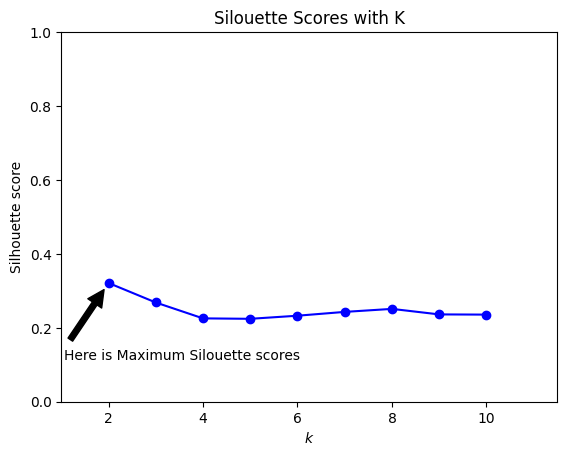

In [142]:
plt.plot(range(2,11), sil_scores, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.axis([1,11.5,0,1]) #(x축범위시작,끝,y축범위시작,끝)
plt.title('Silouette Scores with K')
plt.annotate('Here is Maximum Silouette scores ', 
             xy=(2,sil_scores[0]),
             xytext=(0.1,0.2),
             textcoords='figure fraction',
             fontsize=10, 
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

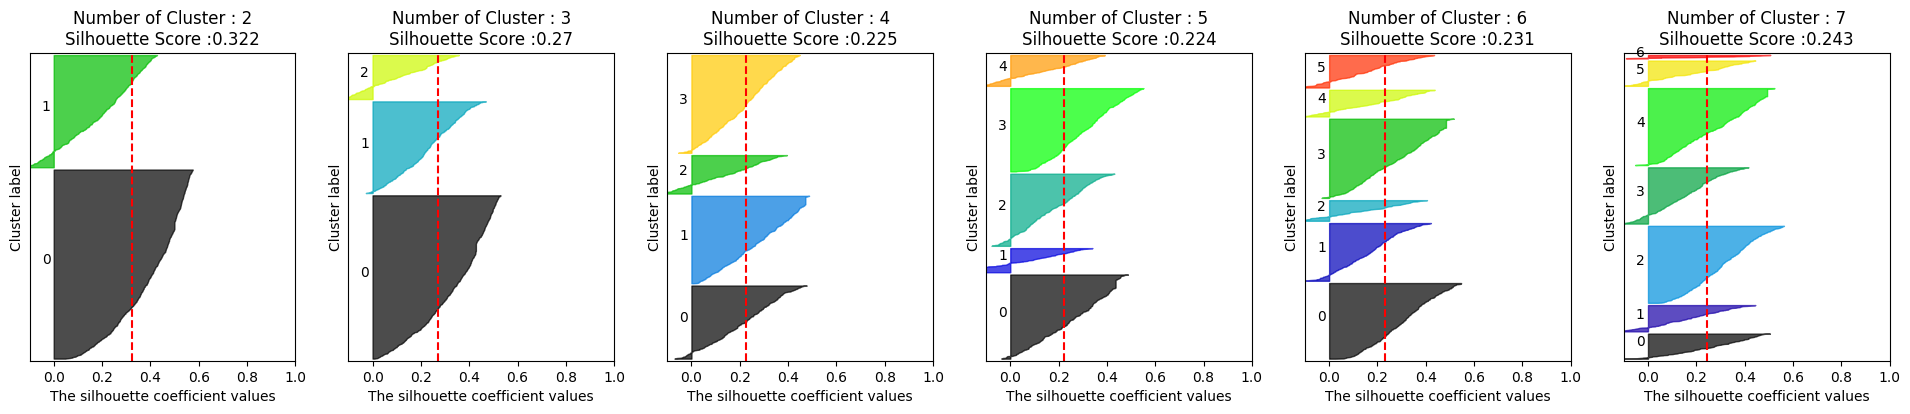

In [143]:
visualize_silhouette([2,3,4,5,6,7], X) 

In [144]:
# 최적의 클러스터로 kmeas 수행
k = 2
kmeans_momentum2 = KMeans(n_clusters=k, random_state=42) 
y_pred_momentum2 = kmeans_momentum2.fit_predict(momentum_zscore_data2) 

## cluster열 추가
momentum_zscore_data2['Cluster']=y_pred_momentum2  # 새로운 열 추가 

## cluster 결과 확인
momentum_zscore_data2.Cluster.value_counts()

Cluster
0    878
1    531
Name: count, dtype: int64

DBSCAN으로 재수행한 경우

In [145]:
# 데이터
data = momentum_zscore_data2.iloc[:,:-1]

# DBSCAN 모델 생성
dbscan = DBSCAN(eps=0.3, min_samples=2)

# 클러스터링 수행
labels = dbscan.fit_predict(data)

# 클러스터링 결과 출력
print(labels)

[0 0 0 ... 0 0 0]


In [146]:
momentum_zscore_data3 = data.copy()
momentum_zscore_data3['Cluster'] = labels
momentum_zscore_data3

수익률 (현금배당반영,3개월)(%)  수익률 (현금배당반영,12개월)(%)     순매수강세  Cluster
Name                                                                   
SK하이닉스               -0.244657             -0.109493  0.496955        0
삼성바이오로직스             -0.158745              0.140075  0.178405        0
삼성SDI                -0.247121              0.329618 -0.175094        0
NAVER                -0.367213             -0.225530 -0.049400        0
카카오                  -0.561207             -0.352962  0.055110        0
...                        ...                   ...       ...      ...
아리온                  -0.053126              0.152272  0.000000        0
에스디시스템               -0.053126              0.152272  0.000000        0
비엔케이제1호스팩             0.006920              0.000000 -0.043681        0
지나인제약                -0.053126              0.152272  0.000000        0
유진스팩9호                0.066350              0.000000 -0.038886        0

[1409 rows x 4 columns]

In [147]:
momentum_zscore_data3.Cluster.value_counts()

Cluster
 0    1389
-1      16
 1       2
 2       2
Name: count, dtype: int64

계층적클러스터링으로 재수행

In [148]:
# 계층적 클러스터링 모델 생성
clusterig = AgglomerativeClustering(n_clusters=2)

# 클러스터링 수행
labels = clusterig.fit_predict(data)

# 클러스터링 결과 출력
print(labels)

[1 1 1 ... 1 1 1]


In [149]:
momentum_zscore_data4 = data.copy()
momentum_zscore_data4['Cluster'] = labels
momentum_zscore_data4

수익률 (현금배당반영,3개월)(%)  수익률 (현금배당반영,12개월)(%)     순매수강세  Cluster
Name                                                                   
SK하이닉스               -0.244657             -0.109493  0.496955        1
삼성바이오로직스             -0.158745              0.140075  0.178405        1
삼성SDI                -0.247121              0.329618 -0.175094        1
NAVER                -0.367213             -0.225530 -0.049400        1
카카오                  -0.561207             -0.352962  0.055110        0
...                        ...                   ...       ...      ...
아리온                  -0.053126              0.152272  0.000000        1
에스디시스템               -0.053126              0.152272  0.000000        1
비엔케이제1호스팩             0.006920              0.000000 -0.043681        1
지나인제약                -0.053126              0.152272  0.000000        1
유진스팩9호                0.066350              0.000000 -0.038886        1

[1409 rows x 4 columns]

In [150]:
momentum_zscore_data4.Cluster.value_counts()

Cluster
1    778
0    631
Name: count, dtype: int64

➡️ factor3을 재분류한 결과 3가지 방법중 kmeans를 수행했을 때가 가장 잘 분류됨

Decision Tree를 이용한 feature_importances_

Accuracy: 0.83


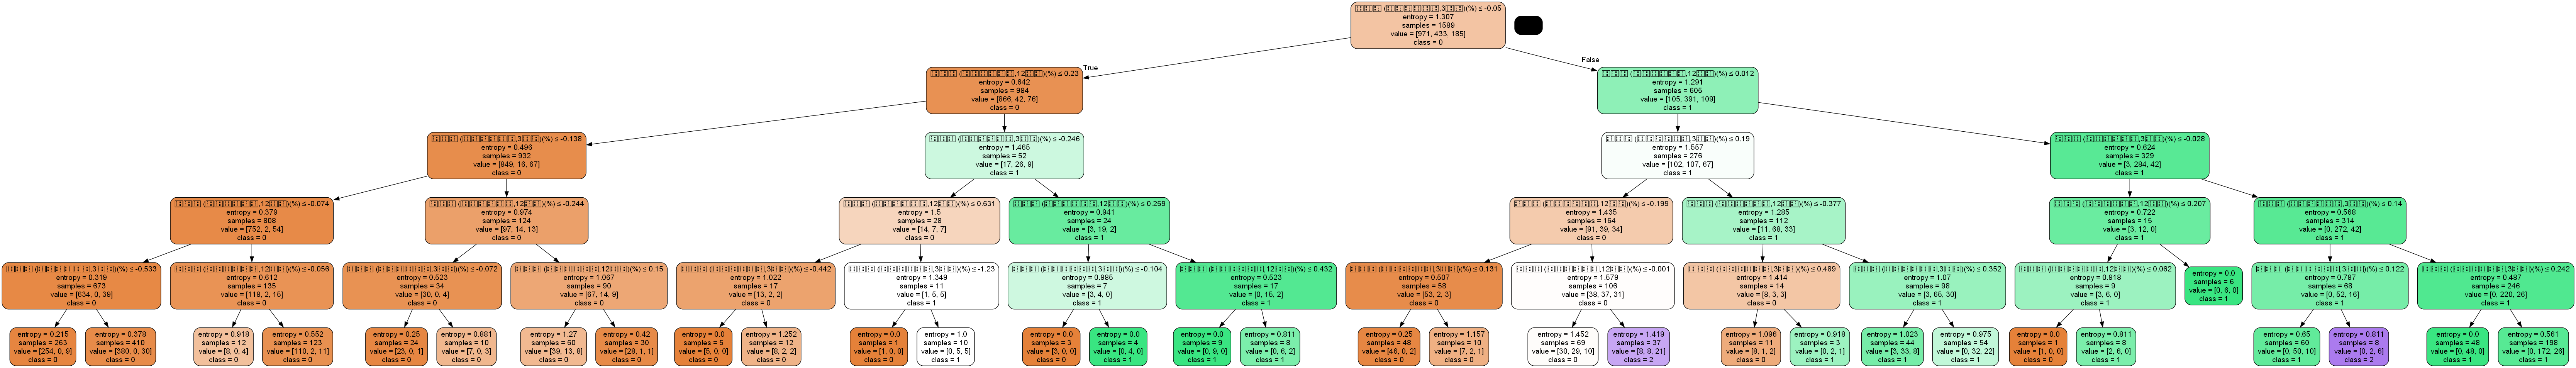

In [151]:
X = momentum_zscore_data.iloc[:,:2] # 순매수강세까지 X화 
Y = momentum_zscore_data['Cluster'] # 클러스터링 Number Y화


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
tree.fit(X_train, y_train)


y_pred_tr = tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))


dot_data = export_graphviz(tree, out_file=None, feature_names= X.columns,
                          class_names=['0','1','2'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [152]:
importance_momentum= pd.DataFrame()
importance_momentum= pd.DataFrame()
importance_momentum['feacture'] = pd.DataFrame(list(momentum_zscore_data.columns[:2])) 
importance_momentum['importance'] = tree.feature_importances_
importance_momentum= importance_momentum.sort_values(by=importance_momentum.columns[1],ascending=False)
importance_momentum

feacture  importance
0   수익률 (현금배당반영,3개월)(%)    0.698782
1  수익률 (현금배당반영,12개월)(%)    0.301218

### factor4: 퀄리티로 클러스터링

In [153]:
quality_zscore_data

ROE(영업이익)(%)   부채비율(%)
Name                              
삼성전자            0.334203 -0.255359
LG에너지솔루션        0.183570 -0.112851
SK하이닉스          0.263208 -0.165146
삼성바이오로직스        0.362910 -0.116248
LG화학            0.232958 -0.123927
...                  ...       ...
키움제6호스팩        -0.119239 -0.275813
유진스팩9호          0.000000 -0.281578
엔에이치스팩25호       0.000000 -0.301290
하나금융20호스팩      -0.092075 -0.281817
IBKS제17호스팩     -0.177887 -0.281745

[2349 rows x 2 columns]

In [154]:
k = 5
kmeans_quality = KMeans(n_clusters=k, random_state=42) # 5개의 군집화로 KMeans 실행 
y_pred_quality = kmeans_quality.fit_predict(quality_zscore_data) # zscore 값으로 y_pred : 예측 값 

kmeans_quality.cluster_centers_

array([[ 0.30005323, -0.11718903],
       [-0.98391992, -0.00397431],
       [-0.08366206, -0.15425505],
       [ 0.19024555,  1.15951657],
       [ 0.89636158, -0.02207871]])

In [155]:
np.unique(y_pred_quality[:]) # 라벨링 잘 되어있음

array([0, 1, 2, 3, 4])

In [156]:
X = quality_zscore_data.values
y = y_pred_quality

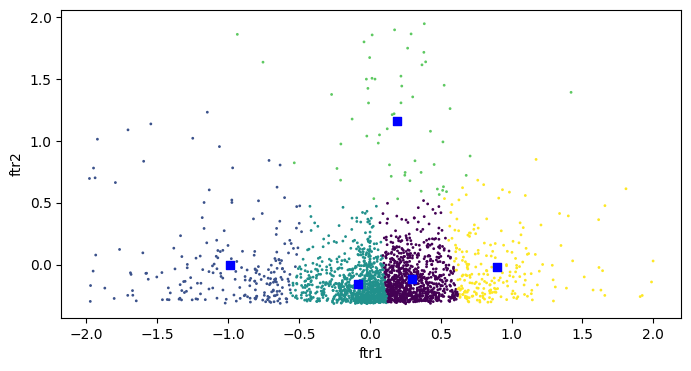

In [157]:
# 위 데이터셋의 산점도

plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1], s=1, c=y)
plt.scatter(kmeans_quality.cluster_centers_[:,0],kmeans_quality.cluster_centers_[:,1], marker='s', c='b')
plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.show()

중심점 초기화

방법1) 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션을 선택

max_iter=1일 때 클러스터 중심좌표
[[ 0.07 -0.13]
 [-0.14 -0.21]
 [ 0.39 -0.12]
 [ 0.65  0.5 ]
 [-0.92 -0.  ]]


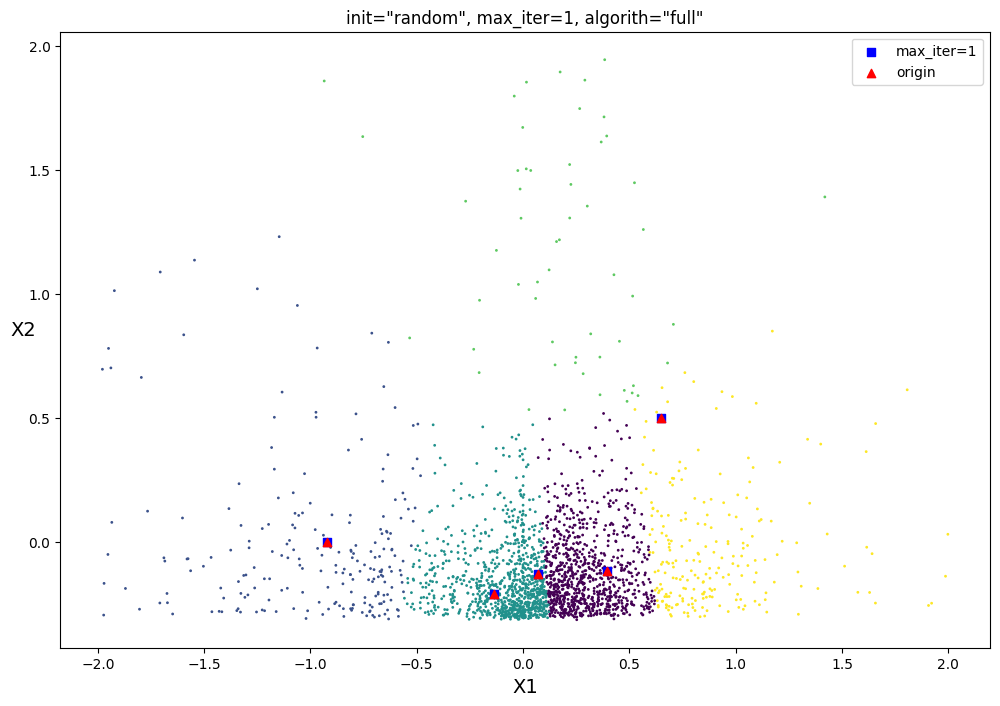

max_iter=2일 때 클러스터 중심좌표
[[ 0.09 -0.11]
 [-0.18 -0.2 ]
 [ 0.47 -0.14]
 [ 0.66  0.56]
 [-0.97  0.02]]


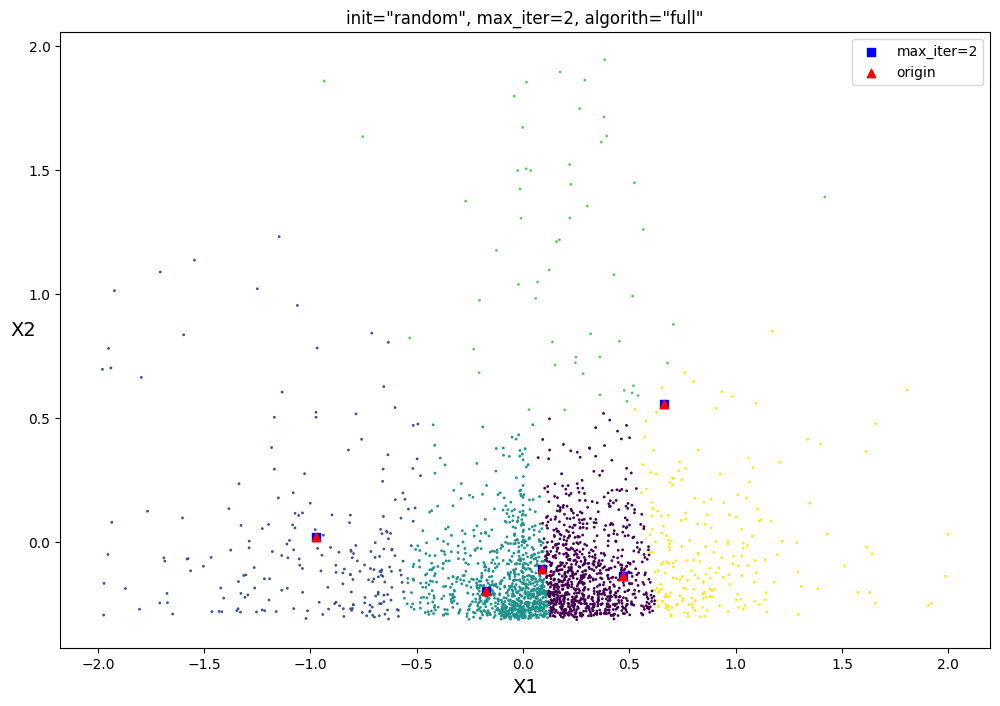

max_iter=3일 때 클러스터 중심좌표
[[ 0.11 -0.11]
 [-0.2  -0.19]
 [ 0.54 -0.14]
 [ 0.59  0.66]
 [-1.    0.03]]


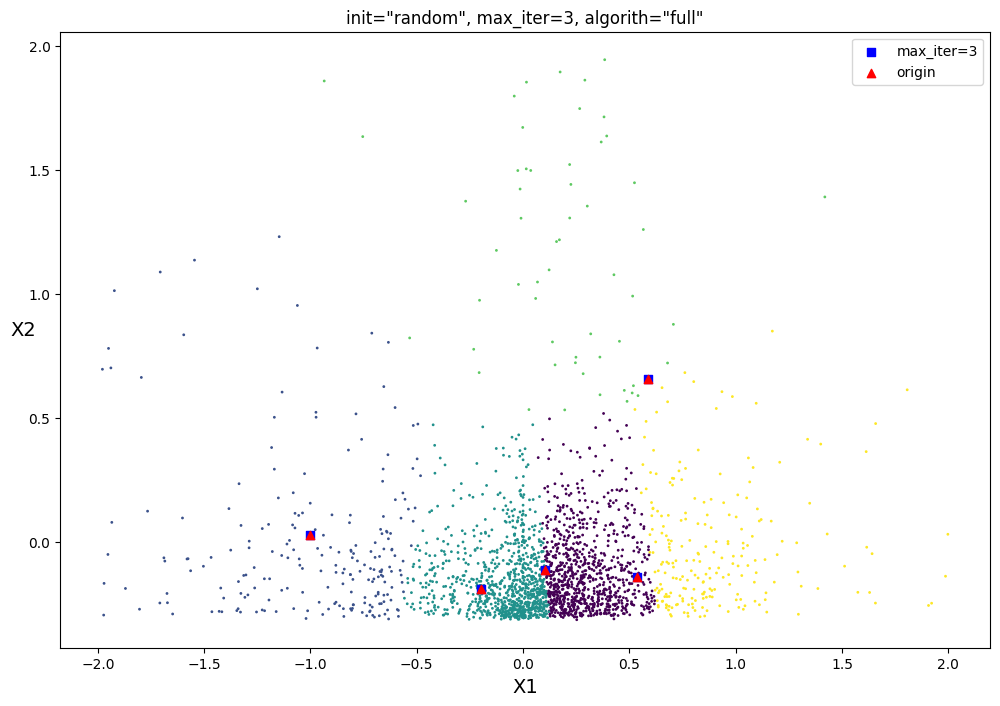

max_iter=4일 때 클러스터 중심좌표
[[ 0.12 -0.13]
 [-0.22 -0.18]
 [ 0.6  -0.13]
 [ 0.47  0.77]
 [-1.02  0.03]]


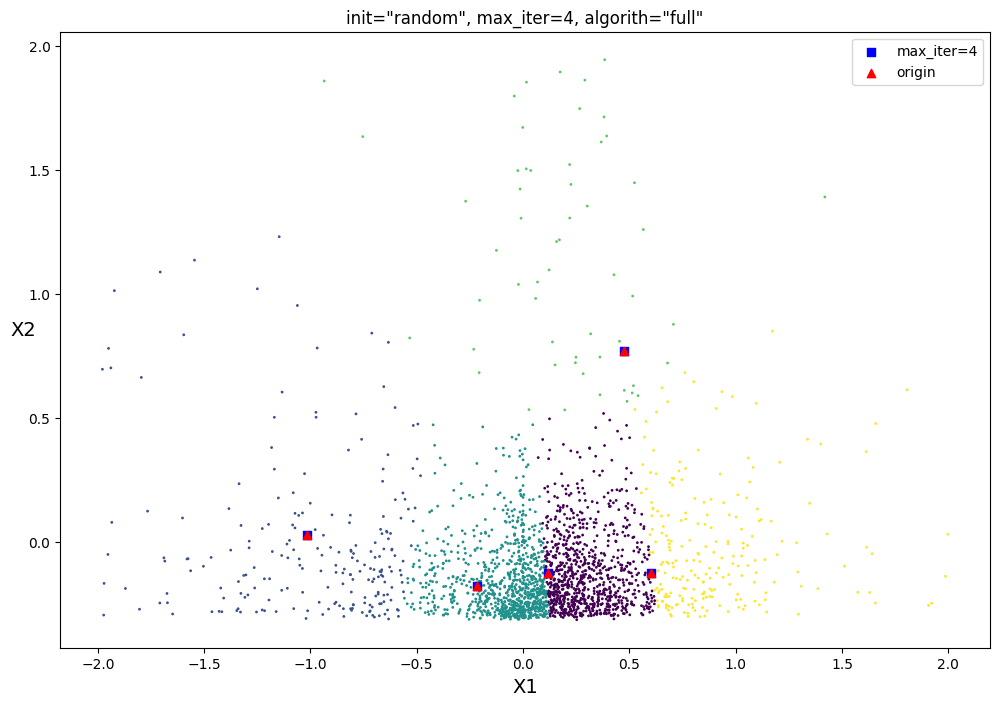

max_iter=5일 때 클러스터 중심좌표
[[ 0.13 -0.13]
 [-0.23 -0.17]
 [ 0.65 -0.11]
 [ 0.34  0.9 ]
 [-1.03  0.01]]


max_iter=6일 때 클러스터 중심좌표
[[ 0.14 -0.14]
 [-0.24 -0.16]
 [ 0.68 -0.09]
 [ 0.3   0.97]
 [-1.06  0.01]]


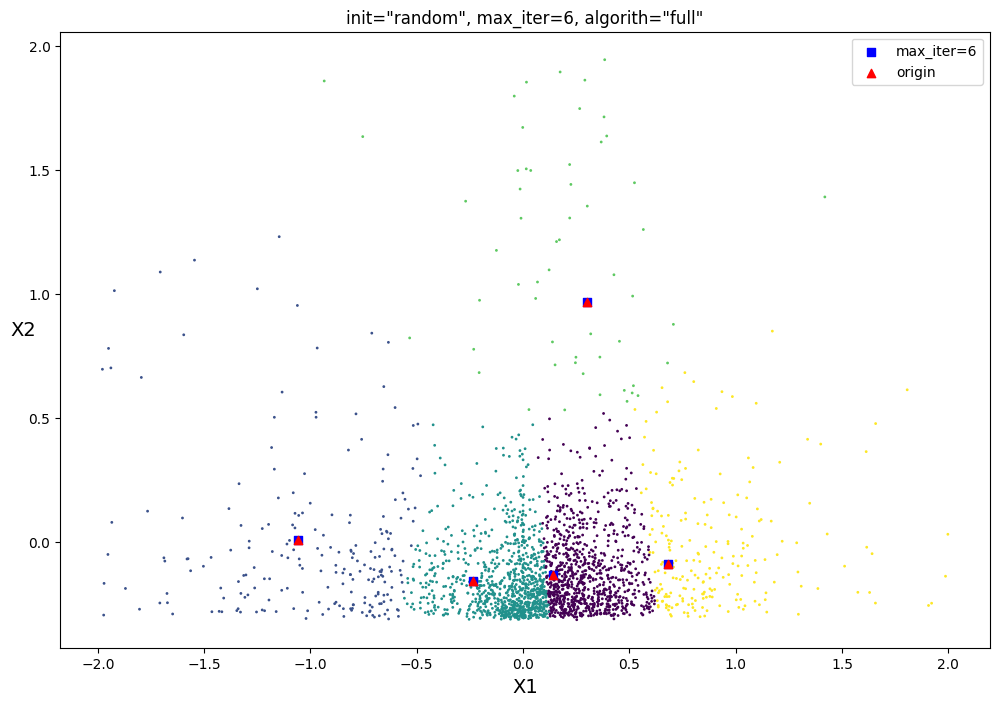

max_iter=7일 때 클러스터 중심좌표
[[ 0.15 -0.14]
 [-0.24 -0.15]
 [ 0.71 -0.07]
 [ 0.27  1.02]
 [-1.07  0.01]]


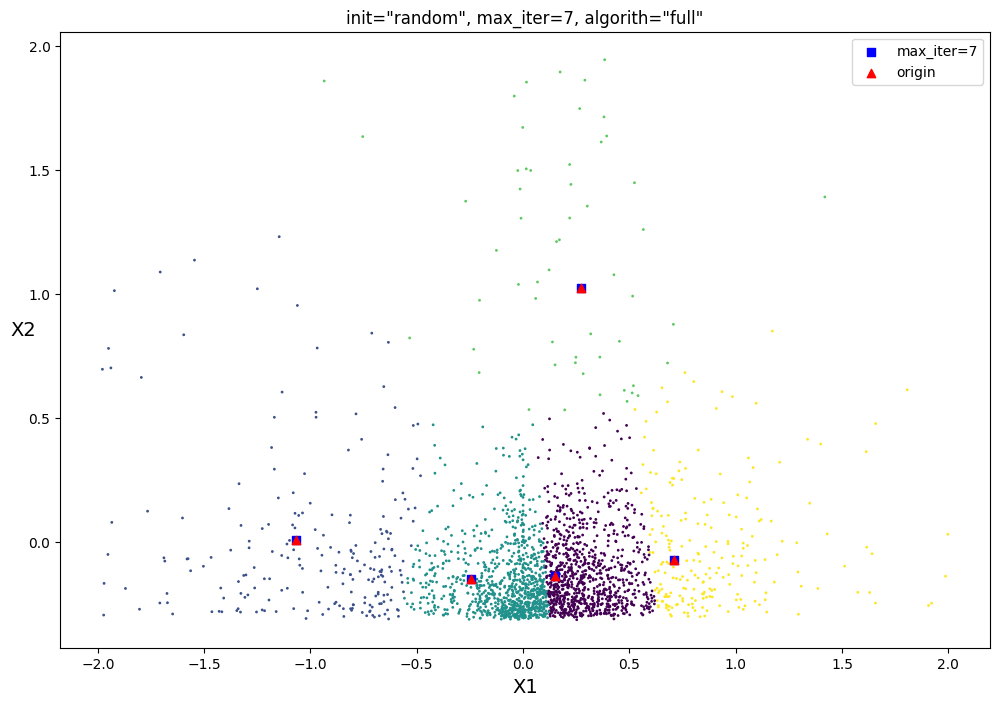

In [158]:
max_iters = [1, 2, 3, 4, 5, 6, 7]
for iter_n in max_iters:  # max_iter 변화시키면서 군집 수행
    kmeans_quality = KMeans(n_clusters=k, init='random', n_init=1,
                    max_iter=iter_n, algorithm='full', random_state=0)
    kmeans_quality.fit(X)
    centers = kmeans_quality.cluster_centers_
    print(f'max_iter={iter_n}일 때 클러스터 중심좌표\n{np.round(centers,2)}')
    title = f'init="random", max_iter={iter_n}, algorith="full"'
    draw_cluster(X,y,centers=[(f'max_iter={iter_n}', centers),
                              ('origin',kmeans_quality.cluster_centers_)],
                title=title)

방법2) k-means ++ 초기화 알고리즘 사용

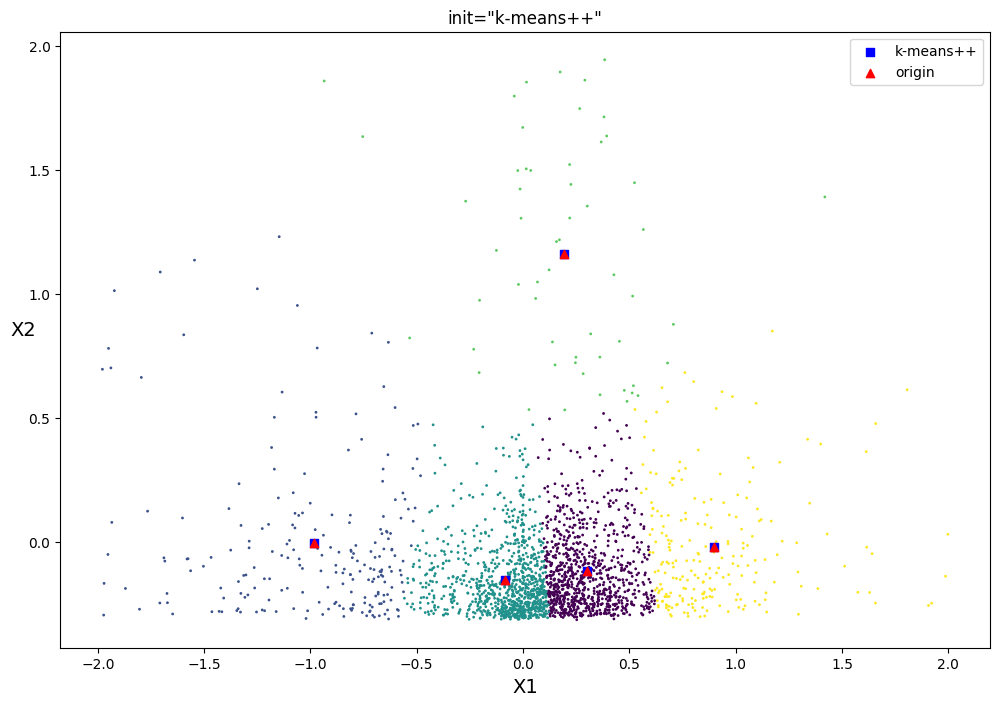

In [159]:
k=5
kmeans_quality = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans_quality.fit(X)
kp_centers = kmeans_quality.cluster_centers_
draw_cluster(X,y,centers=[('k-means++', kp_centers),
                          ('origin', kmeans_quality.cluster_centers_)], 
             title='init="k-means++"')

최적의 클러스터 개수 찾기

방법1) 이너셔가 급격히 작아지는 elbow의 K선택

In [160]:
kmeans_quality = [KMeans(n_clusters=k, random_state=42).fit(X) 
                for k in range(1,11)]
inertias = [model.inertia_ for model in kmeans_quality]
inertias_s = pd.Series(data=inertias, 
                       index=['k='+str(k) for k in range(1,11)])
inertias_s

k=1     739.495349
k=2     447.508600
k=3     307.332042
k=4     228.159285
k=5     182.505037
k=6     149.901618
k=7     127.216672
k=8     113.975893
k=9     101.559645
k=10     89.681778
dtype: float64

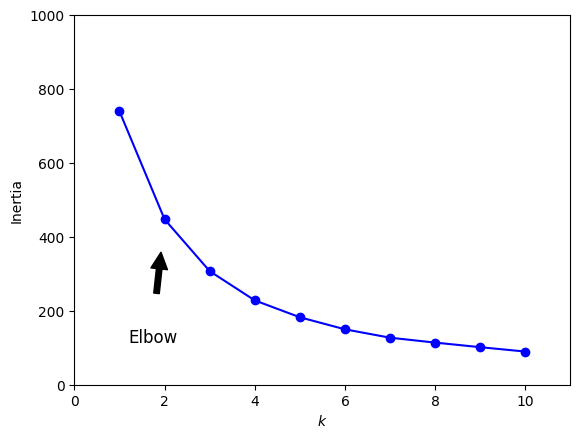

In [161]:
plt.plot(range(1,11), inertias, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Inertia')
plt.axis([0,11,0,1000]) #(x축범위시작,끝,y축범위시작,끝)
plt.annotate('Elbow',xy=(2,inertias[1]),xytext=(0.2,0.2),
            textcoords='figure fraction',
            fontsize=12,
            arrowprops=dict(facecolor='black',shrink=0.3))
plt.show()

방법2) 실루엣 점수로 찾기

In [162]:
k = 5
kmeans_quality = KMeans(n_clusters=k, random_state=42).fit(X)
# kmeans에 대한 실루엣점수
silhouette_score(X, kmeans_quality.labels_) # 묶여진 군집의 결과가 잘 묶였는지

0.371672578614242

In [163]:
# 클러스터 개수에 따른 실루엣 점수 비교
kmeans_perk= [KMeans(n_clusters=k, random_state=42).fit(X) 
                for k in range(2,11)] # 실루엣 계산은 거리를 계산하는 거라 최소 2개이상의 클러스터가 되어야 함(라벨의수가 2이상)
sil_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_perk]
sil_scores_s = pd.Series(data=sil_scores,
                         index=['k='+str(i) for i in range(2,11)])
sil_scores_s

k=2     0.529752
k=3     0.464551
k=4     0.456220
k=5     0.371673
k=6     0.384779
k=7     0.401129
k=8     0.401241
k=9     0.404277
k=10    0.384067
dtype: float64

In [164]:
plt.plot(range(2,11), sil_scores, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.axis([1,11.5,0.2,0.8]) #(x축범위시작,끝,y축범위시작,끝)
plt.title('Silouette Scores with K')
plt.annotate('Here is Maximum Silouette scores ', 
             xy=(2,sil_scores[0]),
             xytext=(0.3,0.5),
             textcoords='figure fraction',
             fontsize=10, 
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

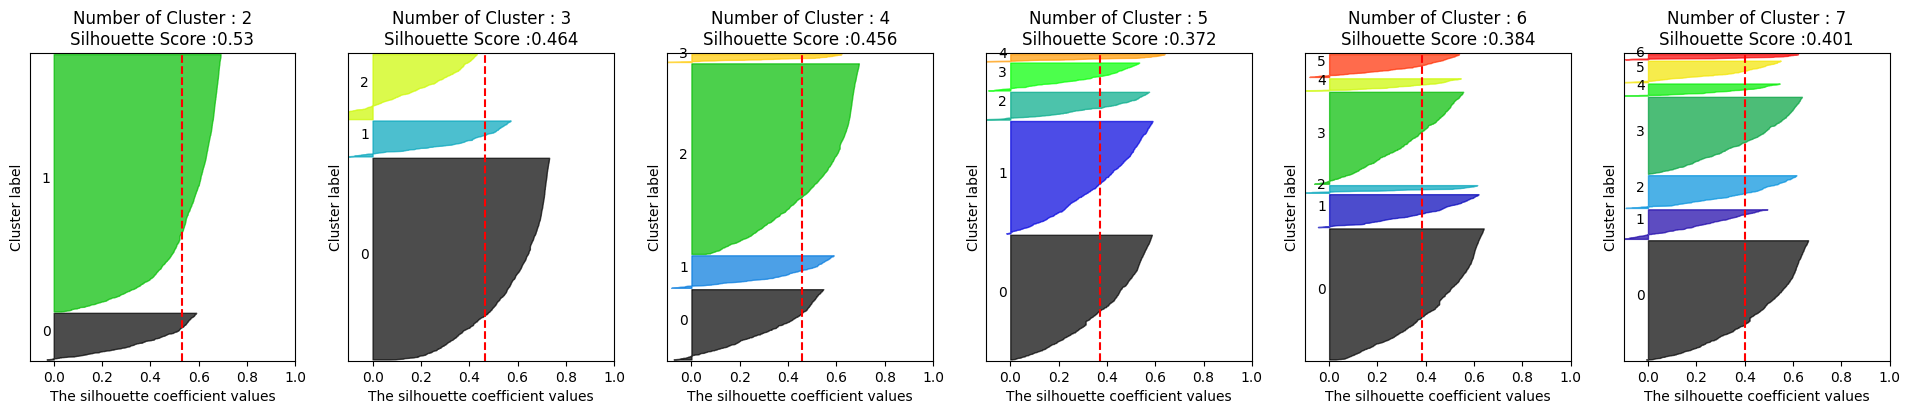

In [165]:
visualize_silhouette([2,3,4,5,6,7], X)

In [166]:
k = 2
kmeans_quality = KMeans(n_clusters=k, random_state=42) 
y_pred_quality = kmeans_quality.fit_predict(quality_zscore_data) # zscore 값으로 y_pred : 예측 값 

클러스터 라벨링 작업

In [167]:
## cluster열 추가
quality_zscore_data['Cluster']=y_pred_quality  # 새로운 열 추가 
len(quality_zscore_data['Cluster'].unique()) # 추가된 열의 요소 갯수

2

In [168]:
quality_zscore_data.Cluster.value_counts()

Cluster
1    1988
0     361
Name: count, dtype: int64

In [169]:
quality_zscore_data[quality_zscore_data.Cluster==0].describe()

ROE(영업이익)(%)     부채비율(%)  Cluster
count    361.000000  361.000000    361.0
mean      -0.749013   -0.026989      0.0
std        0.416403    0.317776      0.0
min       -1.978691   -0.311960      0.0
25%       -0.974266   -0.226364      0.0
50%       -0.649849   -0.117994      0.0
75%       -0.420813    0.031930      0.0
max       -0.204741    1.858480      0.0

In [170]:
quality_zscore_data[quality_zscore_data.Cluster==1].describe()

ROE(영업이익)(%)      부채비율(%)  Cluster
count   1988.000000  1988.000000   1988.0
mean       0.226372    -0.092759      1.0
std        0.320458     0.269841      0.0
min       -0.265550    -0.314974      1.0
25%        0.000000    -0.251047      1.0
50%        0.160420    -0.172442      1.0
75%        0.377881    -0.029342      1.0
max        1.998265     1.944219      1.0

클러스터 재분류

클러스터링을 수행한 후에 하나의 라벨에 몰려있는 데이터를 다시 클러스터링을 진행하면, 데이터를 더 세분화하거나 몰려있는 데이터를 더 세분화할 수 있음.

KMeans로 재수행한 경우

In [171]:
# 1) 라벨 1로 분류된 주식 종목 추출
quality_zscore_data2 = quality_zscore_data[quality_zscore_data.Cluster==1].iloc[:,:2]
quality_zscore_data2

ROE(영업이익)(%)   부채비율(%)
Name                              
삼성전자            0.334203 -0.255359
LG에너지솔루션        0.183570 -0.112851
SK하이닉스          0.263208 -0.165146
삼성바이오로직스        0.362910 -0.116248
LG화학            0.232958 -0.123927
...                  ...       ...
키움제6호스팩        -0.119239 -0.275813
유진스팩9호          0.000000 -0.281578
엔에이치스팩25호       0.000000 -0.301290
하나금융20호스팩      -0.092075 -0.281817
IBKS제17호스팩     -0.177887 -0.281745

[1988 rows x 2 columns]

In [172]:
# 2) 라벨 1로 분류된 주식끼리 다시 클러스터링
k = 5
kmeans_quality2 = KMeans(n_clusters=k, random_state=42) # 5개의 군집화로 KMeans 실행 
y_pred_quality2 = kmeans_quality2.fit_predict(quality_zscore_data2) # zscore 값으로 y_pred : 예측 값 

kmeans_quality2.cluster_centers_

array([[ 0.36533878, -0.17653487],
       [ 0.24637903,  0.22087481],
       [ 0.97305869, -0.03253948],
       [ 0.24849785,  1.36686839],
       [-0.00398448, -0.18221382]])

In [173]:
X = quality_zscore_data2.values
y = y_pred_quality2

In [174]:
# 최적의 클러스터 개수 찾기
kmeans_quality2 = [KMeans(n_clusters=k, random_state=42).fit(X) 
                for k in range(1,11)]
inertias = [model.inertia_ for model in kmeans_quality2]
inertias_s = pd.Series(data=inertias, 
                       index=['k='+str(k) for k in range(1,11)])
inertias_s

k=1     348.734405
k=2     212.911602
k=3     141.577387
k=4     104.088712
k=5      82.093830
k=6      68.779933
k=7      56.892682
k=8      49.969732
k=9      44.492331
k=10     40.241655
dtype: float64

In [175]:
k = 5
kmeans_quality2 = KMeans(n_clusters=k, random_state=42).fit(X)
# kmeans에 대한 실루엣점수
silhouette_score(X, kmeans_quality2.labels_) # 묶여진 군집의 결과가 잘 묶였는지

0.4198918742584141

In [176]:
# 클러스터 개수에 따른 실루엣 점수 비교
kmeans_perk= [KMeans(n_clusters=k, random_state=42).fit(X) 
                for k in range(2,11)] # 실루엣 계산은 거리를 계산하는 거라 최소 2개이상의 클러스터가 되어야 함(라벨의수가 2이상)
sil_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_perk]
sil_scores_s = pd.Series(data=sil_scores,
                         index=['k='+str(i) for i in range(2,11)])
sil_scores_s

k=2     0.519829
k=3     0.504100
k=4     0.399004
k=5     0.419892
k=6     0.374669
k=7     0.393786
k=8     0.369508
k=9     0.381637
k=10    0.359762
dtype: float64

In [177]:
plt.plot(range(2,11), sil_scores, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.axis([1,11.5,0,1]) #(x축범위시작,끝,y축범위시작,끝)
plt.title('Silouette Scores with K')
plt.annotate('Here is Maximum Silouette scores ', 
             xy=(2,sil_scores[0]),
             xytext=(0.1,0.2),
             textcoords='figure fraction',
             fontsize=10, 
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

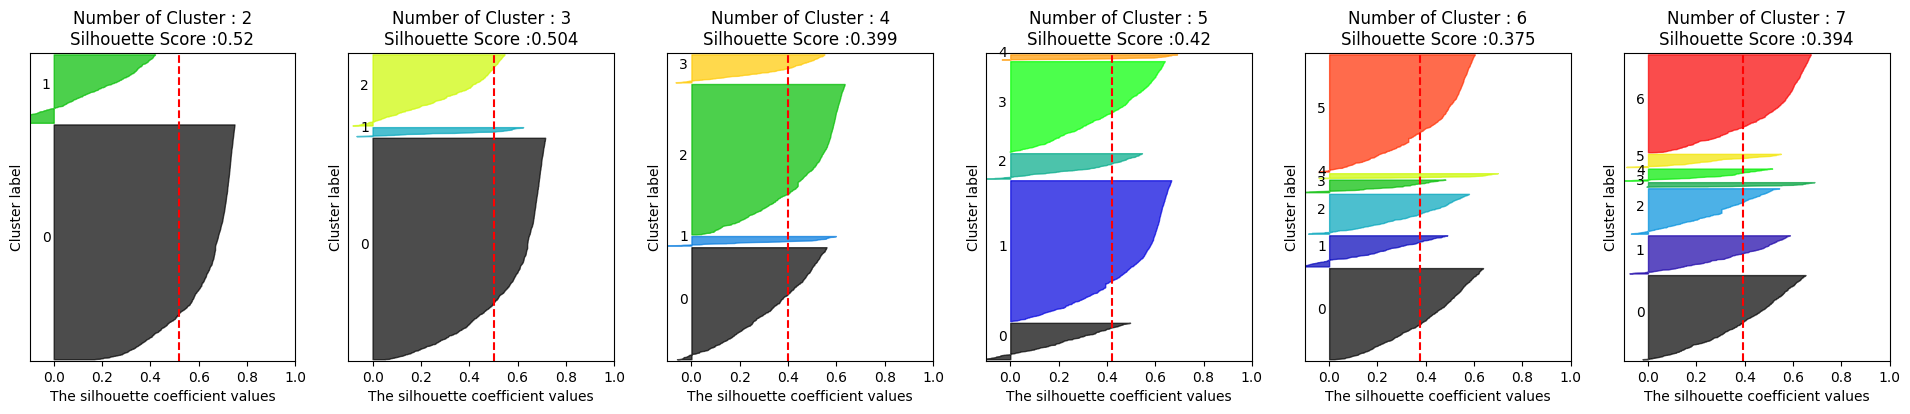

In [178]:
visualize_silhouette([2,3,4,5,6,7], X) 

➡️실루엣 점수가 0.5이상이어야 상당히 좋은 클러스터링 결과로 간주됨. 즉, 클러스터 내의 샘플들이 밀집되어 있고, 클러스터 간에 잘 구분이 되어있음 나타냄. 실루엣 점수가 0에 가까운 경우에는 클러스터 간에 중첩이 많거나 데이터가 분리되지 않은 경우가 있음. quality_zscore_data2를 재분류한 결과 k=2으로 했을때 실루엣 점수가 0.5 이상으로 클러스터링이 잘 되었음을 알 수 있음

In [179]:
# 최적의 클러스터로 kmeas 수행
k = 2
kmeans_quality2 = KMeans(n_clusters=k, random_state=42) 
y_pred_quality2 = kmeans_quality2.fit_predict(quality_zscore_data2) 

## cluster열 추가
quality_zscore_data2['Cluster']=y_pred_quality2  # 새로운 열 추가 

## cluster 결과 확인
quality_zscore_data2.Cluster.value_counts()

Cluster
1    1538
0     450
Name: count, dtype: int64

DBSCAN으로 재수행한 경우

In [180]:
# 데이터
data = quality_zscore_data2.iloc[:,:-1]

# DBSCAN 모델 생성
dbscan = DBSCAN(eps=0.3, min_samples=2)

# 클러스터링 수행
labels = dbscan.fit_predict(data)

# 클러스터링 결과 출력
print(labels)

[0 0 0 ... 0 0 0]


In [181]:
quality_zscore_data3 = data.copy()
quality_zscore_data3['Cluster'] = labels
quality_zscore_data3

ROE(영업이익)(%)   부채비율(%)  Cluster
Name                                       
삼성전자            0.334203 -0.255359        0
LG에너지솔루션        0.183570 -0.112851        0
SK하이닉스          0.263208 -0.165146        0
삼성바이오로직스        0.362910 -0.116248        0
LG화학            0.232958 -0.123927        0
...                  ...       ...      ...
키움제6호스팩        -0.119239 -0.275813        0
유진스팩9호          0.000000 -0.281578        0
엔에이치스팩25호       0.000000 -0.301290        0
하나금융20호스팩      -0.092075 -0.281817        0
IBKS제17호스팩     -0.177887 -0.281745        0

[1988 rows x 3 columns]

In [182]:
quality_zscore_data3.Cluster.value_counts()

Cluster
 0    1986
-1       2
Name: count, dtype: int64

계층적클러스터링으로 재수행

In [183]:
# 계층적 클러스터링 모델 생성
clusterig = AgglomerativeClustering(n_clusters=2)

# 클러스터링 수행
labels = clusterig.fit_predict(data)

# 클러스터링 결과 출력
print(labels)

[1 1 1 ... 1 1 1]


In [184]:
quality_zscore_data4 = data.copy()
quality_zscore_data4['Cluster'] = labels
quality_zscore_data4

ROE(영업이익)(%)   부채비율(%)  Cluster
Name                                       
삼성전자            0.334203 -0.255359        1
LG에너지솔루션        0.183570 -0.112851        1
SK하이닉스          0.263208 -0.165146        1
삼성바이오로직스        0.362910 -0.116248        1
LG화학            0.232958 -0.123927        1
...                  ...       ...      ...
키움제6호스팩        -0.119239 -0.275813        1
유진스팩9호          0.000000 -0.281578        1
엔에이치스팩25호       0.000000 -0.301290        1
하나금융20호스팩      -0.092075 -0.281817        1
IBKS제17호스팩     -0.177887 -0.281745        1

[1988 rows x 3 columns]

In [185]:
quality_zscore_data4.Cluster.value_counts()

Cluster
1    1649
0     339
Name: count, dtype: int64

➡️ factor4를 재분류 했을 때는 3가지 방법중 kmeans으로 했을 때 잘 분류됨.

Decision Tree를 이용한 feature_importances_

In [186]:
X = quality_zscore_data.iloc[:,:2] # 순매수강세까지 X화 
Y = quality_zscore_data['Cluster'] # 클러스터링 Number Y화

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
tree.fit(X_train, y_train)


y_pred_tr = tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))


dot_data = export_graphviz(tree, out_file=None, feature_names= X.columns,
                          class_names=['0','1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Accuracy: 1.00


In [187]:
importance_quality= pd.DataFrame()
importance_quality= pd.DataFrame()
importance_quality['feacture'] = pd.DataFrame(list(quality_zscore_data.columns[:2])) 
importance_quality['importance'] = tree.feature_importances_
importance_quality= importance_quality.sort_values(by=importance_quality.columns[1],ascending=False)
importance_quality

feacture  importance
0  ROE(영업이익)(%)    0.988525
1       부채비율(%)    0.011475

In [188]:
print( "1번째로 중요한 데이터와 중요도: ",importance_quality.iloc[0]['feacture'], "=",importance_quality.iloc[0]['importance']) 
print( "2번째로 중요한 데이터와 중요도: ",importance_quality.iloc[1]['feacture'], "=",importance_quality.iloc[1]['importance']) 

1번째로 중요한 데이터와 중요도:  ROE(영업이익)(%) = 0.9885252035161197
2번째로 중요한 데이터와 중요도:  부채비율(%) = 0.011474796483880216


### 4) 종목별 라벨링

Factor1 라벨링

In [189]:
## Factor1 라벨링
value_label_data = []

value_zscore_data4['Cluster'] = value_zscore_data4['Cluster'] + 1 # 라벨링 번호 겹치는 것을 방지하여 재분류한 라벨링은 +1을 해줌
value_label_data = pd.concat([value_zscore_data4,value_zscore_data[value_zscore_data.Cluster==0]],axis=0)
value_label_data.Cluster.value_counts()

Cluster
2    1025
1     967
0     375
Name: count, dtype: int64

In [190]:
# 평균을 기준으로 순위를 정해서 라벨링을 진행함 
# : 값이 낮은 것이 A
print(value_label_data[value_label_data.Cluster==0].mean())
print(value_label_data[value_label_data.Cluster==1].mean())
print(value_label_data[value_label_data.Cluster==2].mean())

PER(배)     0.005233
PBR(배)     0.690461
Cluster    0.000000
dtype: float64
PER(배)     0.014483
PBR(배)    -0.095276
Cluster    1.000000
dtype: float64
PER(배)    -0.145093
PBR(배)    -0.375245
Cluster    2.000000
dtype: float64


In [191]:
value_label_data['Cluster'] = value_label_data['Cluster'].replace({0: 'C', 1: 'B', 2:'A'})
value_label_data

PER(배)    PBR(배) Cluster
Name                                
삼성전자     -0.196697 -0.219802       A
SK하이닉스   -0.110471 -0.302964       A
LG화학     -0.105776 -0.091860       B
삼성SDI    -0.126024  0.221597       B
현대차      -0.202468 -0.408516       A
...            ...       ...     ...
지티지웰니스    0.000000  0.771746       C
엔지스테크널러지  0.000000  0.637407       C
피피아이     -0.004780  0.989247       C
비케이탑스     0.000000  0.467885       C
일정실업      0.000000  0.774945       C

[2367 rows x 3 columns]

Factor2 라벨링

In [192]:
## Factor2 라벨링
growth_label_data = []
growth_label_data = growth_zscore_data
growth_label_data.Cluster.value_counts()

Cluster
0    1704
1     451
2     218
Name: count, dtype: int64

In [193]:
# 평균을 기준으로 순위를 정해서 라벨링을 진행함
# : 높은 값이 A로 분류됨
print(growth_label_data[growth_label_data.Cluster==0].mean())
print(growth_label_data[growth_label_data.Cluster==1].mean())
print(growth_label_data[growth_label_data.Cluster==2].mean())

영업이익증가율(전년동기)(%)   -0.037371
영업이익증가율(3년평균)(%)   -0.012027
Cluster             0.000000
dtype: float64
영업이익증가율(전년동기)(%)   -0.153110
영업이익증가율(3년평균)(%)   -0.724162
Cluster             1.000000
dtype: float64
영업이익증가율(전년동기)(%)   -0.017266
영업이익증가율(3년평균)(%)    0.938619
Cluster             2.000000
dtype: float64


In [194]:
growth_label_data['Cluster'] = growth_label_data['Cluster'].replace({0: 'B', 1: 'C', 2:'A'})
growth_label_data

영업이익증가율(전년동기)(%)  영업이익증가율(3년평균)(%) Cluster
Name                                                  
삼성전자               -0.184030         -0.095105       B
LG에너지솔루션           -0.047108          0.000000       B
SK하이닉스             -0.237999          0.245677       B
삼성바이오로직스           -0.000566          1.705853       A
LG화학               -0.229239          0.553881       A
...                      ...               ...     ...
키움제6호스팩             0.000000          0.000000       B
유진스팩9호              0.000000          0.000000       B
엔에이치스팩25호           0.000000          0.000000       B
하나금융20호스팩           0.000000          0.000000       B
IBKS제17호스팩          0.000000          0.000000       B

[2373 rows x 3 columns]

Factor3 라벨링

In [195]:
## Factor3 라벨링
momentum_label_data = []
momentum_zscore_data2['Cluster'] = momentum_zscore_data2['Cluster'] + 3  # 라벨링 넘버 안겹치게 3을 더함
momentum_label_data = pd.concat([momentum_zscore_data2,momentum_zscore_data[momentum_zscore_data.Cluster!=0]],axis=0)
momentum_label_data.Cluster.value_counts()

Cluster
3    878
1    599
4    531
2    263
Name: count, dtype: int64

In [196]:
# 평균을 기준으로 순위를 정해서 라벨링을 진행함
print(momentum_label_data[momentum_label_data.Cluster==1].mean())
print(momentum_label_data[momentum_label_data.Cluster==2].mean())
print(momentum_label_data[momentum_label_data.Cluster==3].mean())
print(momentum_label_data[momentum_label_data.Cluster==4].mean())

수익률 (현금배당반영,3개월)(%)     0.400891
수익률 (현금배당반영,12개월)(%)    0.249979
순매수강세                   0.454995
Cluster                 1.000000
dtype: float64
수익률 (현금배당반영,3개월)(%)     0.074887
수익률 (현금배당반영,12개월)(%)    0.010408
순매수강세                  -0.815394
Cluster                 2.000000
dtype: float64
수익률 (현금배당반영,3개월)(%)    -0.207443
수익률 (현금배당반영,12개월)(%)   -0.199325
순매수강세                   0.137100
Cluster                 3.000000
dtype: float64
수익률 (현금배당반영,3개월)(%)    -0.720891
수익률 (현금배당반영,12개월)(%)   -0.462646
순매수강세                   0.016422
Cluster                 4.000000
dtype: float64


In [197]:
momentum_label_data['Cluster'] = momentum_label_data['Cluster'].replace({1: 'A', 2: 'B', 3:'D', 4:'C'})
momentum_label_data

수익률 (현금배당반영,3개월)(%)  수익률 (현금배당반영,12개월)(%)     순매수강세 Cluster
Name                                                                   
SK하이닉스                -0.244657             -0.109493  0.496955       D
삼성바이오로직스              -0.158745              0.140075  0.178405       D
삼성SDI                 -0.247121              0.329618 -0.175094       D
NAVER                 -0.367213             -0.225530 -0.049400       D
카카오                   -0.561207             -0.352962  0.055110       C
...                         ...                   ...       ...     ...
유진스팩6호                 0.427242              0.283075  0.508642       A
키움제6호스팩                0.156265             -0.156999  0.618659       A
엔에이치스팩25호              0.021085              0.000000 -0.538318       B
하나금융20호스팩              0.096835              0.113272  0.171393       A
IBKS제17호스팩             0.055265              0.233482  0.324613       A

[2271 rows x 4 columns]

Factor4 라벨링

In [198]:
## Factor4 라벨링
quality_label_data = []
quality_zscore_data2['Cluster'] = quality_zscore_data2['Cluster'] + 1 
quality_label_data = pd.concat([quality_zscore_data2,quality_zscore_data[quality_zscore_data.Cluster==0]],axis=0)
quality_label_data.Cluster.value_counts()

Cluster
2    1538
1     450
0     361
Name: count, dtype: int64

In [199]:
# 평균을 기준으로 순위를 정해서 라벨링을 진행함
# : 부채비율은 낮은 값이 A고, ROE는 높은 값이 A이므로, 가중치가 높은 ROE를 기준으로 라벨링
print(quality_label_data[quality_label_data.Cluster==0].mean())
print(quality_label_data[quality_label_data.Cluster==1].mean())
print(quality_label_data[quality_label_data.Cluster==2].mean())

ROE(영업이익)(%)   -0.749013
부채비율(%)        -0.026989
Cluster         0.000000
dtype: float64
ROE(영업이익)(%)    0.665802
부채비율(%)         0.108259
Cluster         1.000000
dtype: float64
ROE(영업이익)(%)    0.097800
부채비율(%)        -0.151575
Cluster         2.000000
dtype: float64


In [200]:
quality_label_data['Cluster'] = quality_label_data['Cluster'].replace({0: 'C', 1: 'A', 2:'B'})
quality_label_data

ROE(영업이익)(%)   부채비율(%) Cluster
Name                                    
삼성전자          0.334203 -0.255359       B
LG에너지솔루션      0.183570 -0.112851       B
SK하이닉스        0.263208 -0.165146       B
삼성바이오로직스      0.362910 -0.116248       B
LG화학          0.232958 -0.123927       B
...                ...       ...     ...
한솔인티큐브       -0.542739 -0.148352       C
텔레필드         -1.934550  0.077813       C
더코디          -0.663740  0.032217       C
노블엠앤비        -0.481931 -0.167777       C
에스디시스템       -0.331606 -0.217465       C

[2349 rows x 3 columns]

라벨링 종합

In [201]:
label_data = []
label_data=  pd.merge(value_label_data['Cluster'],growth_label_data['Cluster'],left_index=True,right_index=True,how='outer')

In [202]:
label_data=  pd.merge(label_data,momentum_label_data['Cluster'],left_index=True,right_index=True,how='outer')

In [203]:
label_data

Cluster_x Cluster_y Cluster
Name                              
3S             B         B       D
AJ네트웍스         A         A       C
AK홀딩스          A         B       A
APS            B         B       D
AP시스템          A         B       A
...          ...       ...     ...
흥국에프엔비         A         B       D
흥국화재           A         A       D
흥아해운           B         B       D
희림             B         B       D
힘스             B         B       D

[2433 rows x 3 columns]

In [204]:
momentum_label_data

수익률 (현금배당반영,3개월)(%)  수익률 (현금배당반영,12개월)(%)     순매수강세 Cluster
Name                                                                   
SK하이닉스                -0.244657             -0.109493  0.496955       D
삼성바이오로직스              -0.158745              0.140075  0.178405       D
삼성SDI                 -0.247121              0.329618 -0.175094       D
NAVER                 -0.367213             -0.225530 -0.049400       D
카카오                   -0.561207             -0.352962  0.055110       C
...                         ...                   ...       ...     ...
유진스팩6호                 0.427242              0.283075  0.508642       A
키움제6호스팩                0.156265             -0.156999  0.618659       A
엔에이치스팩25호              0.021085              0.000000 -0.538318       B
하나금융20호스팩              0.096835              0.113272  0.171393       A
IBKS제17호스팩             0.055265              0.233482  0.324613       A

[2271 rows x 4 columns]

In [205]:
quality_label_data

ROE(영업이익)(%)   부채비율(%) Cluster
Name                                    
삼성전자          0.334203 -0.255359       B
LG에너지솔루션      0.183570 -0.112851       B
SK하이닉스        0.263208 -0.165146       B
삼성바이오로직스      0.362910 -0.116248       B
LG화학          0.232958 -0.123927       B
...                ...       ...     ...
한솔인티큐브       -0.542739 -0.148352       C
텔레필드         -1.934550  0.077813       C
더코디          -0.663740  0.032217       C
노블엠앤비        -0.481931 -0.167777       C
에스디시스템       -0.331606 -0.217465       C

[2349 rows x 3 columns]

In [206]:
pd.merge(label_data,quality_label_data['Cluster'],left_index=True,right_index=True,how='outer', suffixes=('_df1', '_df2'))

Cluster_x Cluster_y Cluster_df1 Cluster_df2
Name                                              
3S             B         B           D           B
AJ네트웍스         A         A           C           A
AK홀딩스          A         B           A           B
APS            B         B           D           C
AP시스템          A         B           A           A
...          ...       ...         ...         ...
흥국에프엔비         A         B           D           B
흥국화재           A         A           D         NaN
흥아해운           B         B           D           A
희림             B         B           D           A
힘스             B         B           D           C

[2433 rows x 4 columns]

라벨링 종합

In [207]:
label_data = []
label_data=  pd.merge(value_label_data['Cluster'],growth_label_data['Cluster'],left_index=True,right_index=True,how='outer')
label_data=  pd.merge(label_data,momentum_label_data['Cluster'],left_index=True,right_index=True,how='outer')
label_data=  pd.merge(label_data,quality_label_data['Cluster'],left_index=True,right_index=True,how='outer', suffixes=('_df1', '_df2'))
label_data.set_index(new_data.index,inplace=True)
label_data.columns = ['value','growth','momentum','quality']
label_data

value growth momentum quality
Name                                    
삼성전자           B      B        D       B
LG에너지솔루션       A      A        C       A
SK하이닉스         A      B        A       B
삼성바이오로직스       B      B        D       C
LG화학           A      B        A       A
...          ...    ...      ...     ...
키움제6호스팩        A      B        D       B
유진스팩9호         A      A        D     NaN
엔에이치스팩25호      B      B        D       A
하나금융20호스팩      B      B        D       A
IBKS제17호스팩     B      B        D       C

[2433 rows x 4 columns]

In [208]:
label_data['label'] = label_data.astype('str').apply(lambda row: ''.join(row), axis=1)
label_data

value growth momentum quality   label
Name                                            
삼성전자           B      B        D       B    BBDB
LG에너지솔루션       A      A        C       A    AACA
SK하이닉스         A      B        A       B    ABAB
삼성바이오로직스       B      B        D       C    BBDC
LG화학           A      B        A       A    ABAA
...          ...    ...      ...     ...     ...
키움제6호스팩        A      B        D       B    ABDB
유진스팩9호         A      A        D     NaN  AADnan
엔에이치스팩25호      B      B        D       A    BBDA
하나금융20호스팩      B      B        D       A    BBDA
IBKS제17호스팩     B      B        D       C    BBDC

[2433 rows x 5 columns]

### 5) 종목별 시각화

Factor 1 시각화

In [209]:
# 클러스터 0, 1, 2에 대한 평균값 계산
cluster0_mean = value_label_data.loc[value_label_data.Cluster=='A'].drop('Cluster', axis=1).mean()
cluster1_mean = value_label_data.loc[value_label_data.Cluster=='B'].drop('Cluster', axis=1).mean()
cluster2_mean = value_label_data.loc[value_label_data.Cluster=='C'].drop('Cluster', axis=1).mean()

# 2D 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(value_label_data['PER(배)'], value_label_data['PBR(배)'],cmap='Pastel2', alpha=0.3)
ax.scatter(cluster0_mean['PER(배)'], cluster0_mean['PBR(배)'], marker='o', s=8000, c='skyblue')
ax.scatter(cluster1_mean['PER(배)'], cluster1_mean['PBR(배)'], marker='o', s=8000, c='blue')
ax.scatter(cluster2_mean['PER(배)'], cluster2_mean['PBR(배)'], marker='o', s=8000, c='#000080')


# X, Y축 레이블 추가
ax.set_xlabel('PER')
ax.set_ylabel('PBR')

#텍스트 추가
ax.text(cluster0_mean['PER(배)'], cluster0_mean['PBR(배)'],'Cluster A', fontsize=10, color='black')
ax.text(cluster1_mean['PER(배)'], cluster1_mean['PBR(배)'],'Cluster B', fontsize=10, color='black')
ax.text(cluster2_mean['PER(배)'], cluster2_mean['PBR(배)'],'Cluster C', fontsize=10, color='white')

# X, Y축 범위 설정
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')

# 그래프 제목 추가
plt.title('Value')

plt.show()

Factor2 시각화

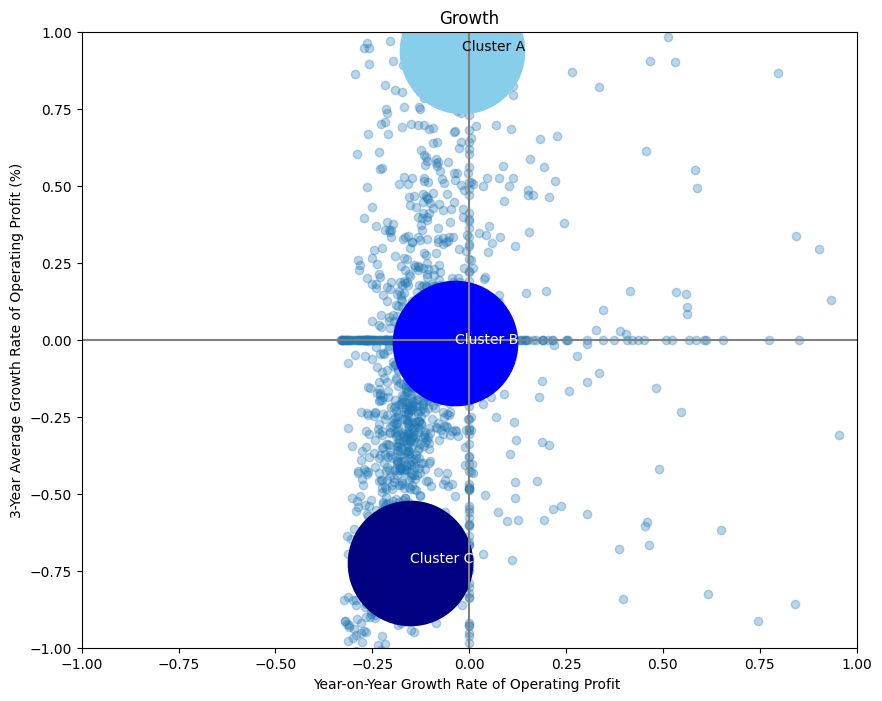

In [210]:
# 클러스터 0, 1, 2에 대한 평균값 계산
cluster0_mean = growth_label_data.loc[growth_label_data.Cluster=='A'].drop('Cluster', axis=1).mean()
cluster1_mean = growth_label_data.loc[growth_label_data.Cluster=='B'].drop('Cluster', axis=1).mean()
cluster2_mean = growth_label_data.loc[growth_label_data.Cluster=='C'].drop('Cluster', axis=1).mean()

# 2D 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(growth_label_data['영업이익증가율(전년동기)(%)'], growth_label_data['영업이익증가율(3년평균)(%)'], cmap='Pastel2', alpha=0.3)
ax.scatter(cluster0_mean['영업이익증가율(전년동기)(%)'], cluster0_mean['영업이익증가율(3년평균)(%)'], marker='o', s=8000, c='skyblue')
ax.scatter(cluster1_mean['영업이익증가율(전년동기)(%)'], cluster1_mean['영업이익증가율(3년평균)(%)'], marker='o', s=8000, c='blue')
ax.scatter(cluster2_mean['영업이익증가율(전년동기)(%)'], cluster2_mean['영업이익증가율(3년평균)(%)'], marker='o', s=8000, c='#000080')


# X, Y축 레이블 추가
ax.set_xlabel('Year-on-Year Growth Rate of Operating Profit ')
ax.set_ylabel('3-Year Average Growth Rate of Operating Profit (%)')

#텍스트 추가
ax.text(cluster0_mean['영업이익증가율(전년동기)(%)'], cluster0_mean['영업이익증가율(3년평균)(%)'],'Cluster A', fontsize=10, color='black')
ax.text(cluster1_mean['영업이익증가율(전년동기)(%)'], cluster1_mean['영업이익증가율(3년평균)(%)'],'Cluster B', fontsize=10, color='white')
ax.text(cluster2_mean['영업이익증가율(전년동기)(%)'], cluster2_mean['영업이익증가율(3년평균)(%)'], 'Cluster C', fontsize=10, color='white')

# X, Y축 범위 설정
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')

# 그래프 제목 추가
plt.title('Growth')

plt.show()

fig.savefig('growth_cluster1.png')

Factor3 시각화

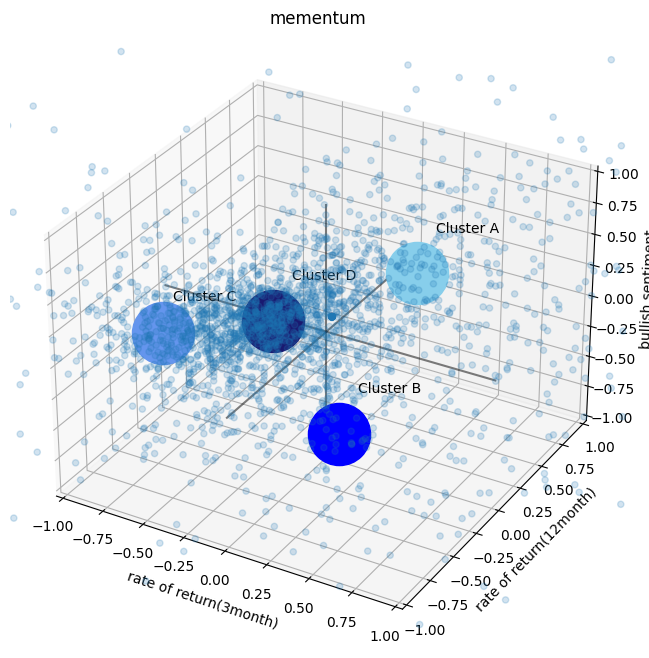

In [211]:
# 클러스터 0, 1, 2, 3 에 대한 평균값 계산
cluster0_mean = momentum_label_data.loc[momentum_label_data.Cluster=='A'].drop('Cluster', axis=1).mean()
cluster1_mean = momentum_label_data.loc[momentum_label_data.Cluster=='B'].drop('Cluster', axis=1).mean()
cluster2_mean = momentum_label_data.loc[momentum_label_data.Cluster=='C'].drop('Cluster', axis=1).mean()
cluster3_mean = momentum_label_data.loc[momentum_label_data.Cluster=='D'].drop('Cluster', axis=1).mean()

# 3D 그래프 그리기
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(momentum_label_data['수익률 (현금배당반영,3개월)(%)'], momentum_label_data['수익률 (현금배당반영,12개월)(%)'], momentum_label_data['순매수강세'],cmap='Pastel2', alpha=0.2)

ax.scatter(cluster0_mean['수익률 (현금배당반영,3개월)(%)'], cluster0_mean['수익률 (현금배당반영,12개월)(%)'], cluster0_mean['순매수강세'],marker='o', s=2000, c='skyblue')
ax.scatter(cluster1_mean['수익률 (현금배당반영,3개월)(%)'], cluster1_mean['수익률 (현금배당반영,12개월)(%)'], cluster1_mean['순매수강세'], marker='o', s=2000,  c='blue')
ax.scatter(cluster2_mean['수익률 (현금배당반영,3개월)(%)'], cluster2_mean['수익률 (현금배당반영,12개월)(%)'], cluster2_mean['순매수강세'], marker='o', s=2000, c='#6495ED')
ax.scatter(cluster3_mean['수익률 (현금배당반영,3개월)(%)'], cluster3_mean['수익률 (현금배당반영,12개월)(%)'], cluster3_mean['순매수강세'], marker='o', s=2000, c='#191970')

# X, Y, Z축 레이블 추가
ax.set_xlabel('rate of return(3month)')
ax.set_ylabel('rate of return(12month)')
ax.set_zlabel('bullish sentiment')

#텍스트 추가
ax.text(cluster0_mean['수익률 (현금배당반영,3개월)(%)'], cluster0_mean['수익률 (현금배당반영,12개월)(%)']+0.2, cluster0_mean['순매수강세']+0.2, 'Cluster A', fontsize=10, color='black')
ax.text(cluster1_mean['수익률 (현금배당반영,3개월)(%)'], cluster1_mean['수익률 (현금배당반영,12개월)(%)']+0.2, cluster1_mean['순매수강세']+0.2, 'Cluster B', fontsize=10, color='black')
ax.text(cluster2_mean['수익률 (현금배당반영,3개월)(%)'], cluster2_mean['수익률 (현금배당반영,12개월)(%)']+0.1, cluster2_mean['순매수강세']+0.2, 'Cluster C', fontsize=10, color='black')
ax.text(cluster3_mean['수익률 (현금배당반영,3개월)(%)'], cluster3_mean['수익률 (현금배당반영,12개월)(%)']+0.2, cluster3_mean['순매수강세']+0.2, 'Cluster D', fontsize=10, color='black')



# X, Y, Z축 범위 설정
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)


# 각 축에 대한 라인 그리기
ax.plot([-1, 1], [0, 0], [0, 0], c='black', alpha=0.5)
ax.plot([0, 0], [-1, 1], [0, 0], c='black', alpha=0.5)
ax.plot([0, 0], [0, 0], [-1, 1], c='black', alpha=0.5)

# 그래프 제목 추가
plt.title('mementum')

plt.show()

Factor4 시각화

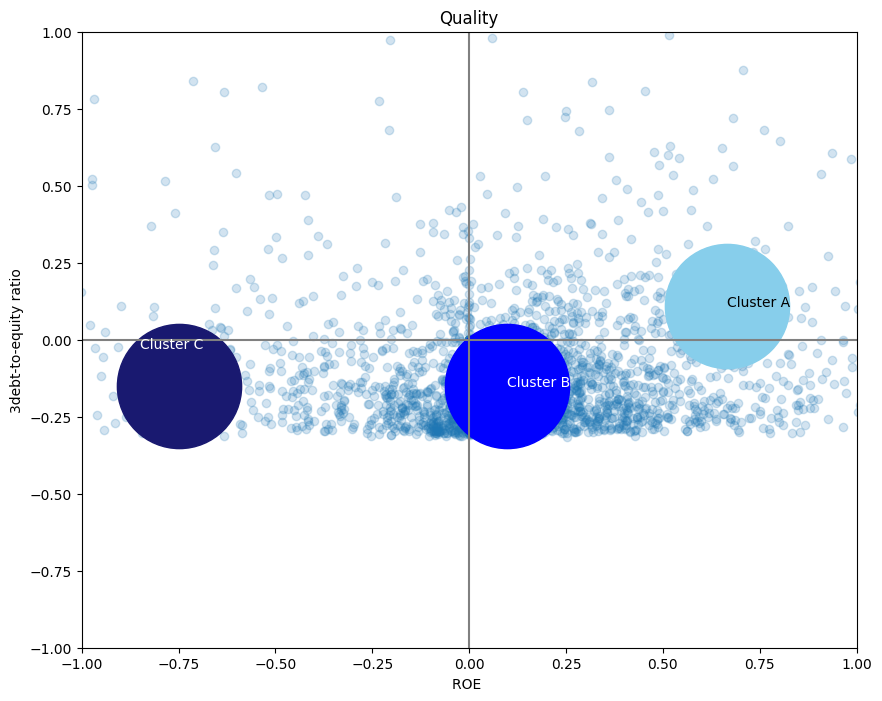

In [212]:
# 클러스터 0, 1, 2에 대한 평균값 계산
cluster0_mean = quality_label_data.loc[quality_label_data.Cluster=='A'].drop('Cluster', axis=1).mean()
cluster1_mean = quality_label_data.loc[quality_label_data.Cluster=='B'].drop('Cluster', axis=1).mean()
cluster2_mean = quality_label_data.loc[quality_label_data.Cluster=='C'].drop('Cluster', axis=1).mean()
# 2D 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(quality_label_data['ROE(영업이익)(%)'], quality_label_data['부채비율(%)'],cmap='Pastel2', alpha=0.2)
ax.scatter(cluster0_mean['ROE(영업이익)(%)'], cluster0_mean['부채비율(%)'], marker='o', s=8000,  c='skyblue')
ax.scatter(cluster1_mean['ROE(영업이익)(%)'], cluster1_mean['부채비율(%)'], marker='o', s=8000,  c='blue')
ax.scatter(cluster2_mean['ROE(영업이익)(%)'], cluster1_mean['부채비율(%)'], marker='o', s=8000,  c='#191970')

# X, Y축 레이블 추가
ax.set_xlabel('ROE ')
ax.set_ylabel('3debt-to-equity ratio')

#텍스트 추가
ax.text(cluster0_mean['ROE(영업이익)(%)'], cluster0_mean['부채비율(%)'],'Cluster A', fontsize=10, color='black')
ax.text(cluster1_mean['ROE(영업이익)(%)'], cluster1_mean['부채비율(%)'],'Cluster B', fontsize=10, color='white')
ax.text(cluster2_mean['ROE(영업이익)(%)']-0.1, cluster2_mean['부채비율(%)'],'Cluster C', fontsize=10, color='white')

# X, Y축 범위 설정
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')

# 그래프 제목 추가
plt.title('Quality')

plt.show()

### 6) 공통 특성가진 종목 추천

In [213]:
label_data

value growth momentum quality   label
Name                                            
삼성전자           B      B        D       B    BBDB
LG에너지솔루션       A      A        C       A    AACA
SK하이닉스         A      B        A       B    ABAB
삼성바이오로직스       B      B        D       C    BBDC
LG화학           A      B        A       A    ABAA
...          ...    ...      ...     ...     ...
키움제6호스팩        A      B        D       B    ABDB
유진스팩9호         A      A        D     NaN  AADnan
엔에이치스팩25호      B      B        D       A    BBDA
하나금융20호스팩      B      B        D       A    BBDA
IBKS제17호스팩     B      B        D       C    BBDC

[2433 rows x 5 columns]

In [214]:
# 종목명 입력 받기
stock_names = []
while True:
    stock_name = input("종목명을 입력하세요 (종료하려면 엔터키): ")
    if stock_name == "":
        break
    if stock_name in label_data.index:
        stock_names.append(stock_name)
    else:
        print("입력한 종목명은 데이터프레임의 인덱스에 존재하지 않습니다. 다시 입력해주세요.")

# 입력된 종목명에 해당하는 데이터 추출
stock_values = label_data.loc[stock_names,:]

# 결과 출력
stock_values

value growth momentum quality label
Name                                    
현대차      A      B        D       B  ABDB
삼성전자     B      B        D       B  BBDB

In [215]:
# 내가 입력한 종목의 평균 성향
df = pd.DataFrame(stock_values.describe())
df

value growth momentum quality label
count      2      2        2       2     2
unique     2      1        1       1     2
top        A      B        D       B  ABDB
freq       1      2        2       2     1

In [216]:
top_label = df.iloc[2,:4]
preference_label = ''.join(top_label)
preference_label

'ABDB'

In [217]:
# 내가 선호하는 종목과 같은 라벨링을 가진 종목들
preference_stock = label_data[label_data.label == preference_label]
preference_stock.index

Index(['현대차', 'KB금융', '삼성에스디에스', '아모레퍼시픽', 'F&F', 'GS', '한미반도체', '포스코DX',
       '대한전선', 'LIG넥스원',
       ...
       '동일철강', '에스에스알', '대동금속', '엠에프엠코리아', '케이비제23호스팩', '상상인제3호스팩', '유안타제9호스팩',
       '교보13호스팩', '유진스팩6호', '키움제6호스팩'],
      dtype='object', name='Name', length=210)

참고. 각각의 라벨마다 몇개씩 분류되는가?

In [218]:
value = ['A','B','C']
growth = ['A','B','C']
momentum = ['A','B','C','D']
quality = ['A','B','C']

combinations = []

for v in value:
    for g in growth:
        for m in momentum:
            for q in quality:
                combination = v + g + m + q
                combinations.append(combination)

# 생성된 모든 조합 출력
for combination in combinations:
    print(combination)

AAAA
AAAB
AAAC
AABA
AABB
AABC
AACA
AACB
AACC
AADA
AADB
AADC
ABAA
ABAB
ABAC
ABBA
ABBB
ABBC
ABCA
ABCB
ABCC
ABDA
ABDB
ABDC
ACAA
ACAB
ACAC
ACBA
ACBB
ACBC
ACCA
ACCB
ACCC
ACDA
ACDB
ACDC
BAAA
BAAB
BAAC
BABA
BABB
BABC
BACA
BACB
BACC
BADA
BADB
BADC
BBAA
BBAB
BBAC
BBBA
BBBB
BBBC
BBCA
BBCB
BBCC
BBDA
BBDB
BBDC
BCAA
BCAB
BCAC
BCBA
BCBB
BCBC
BCCA
BCCB
BCCC
BCDA
BCDB
BCDC
CAAA
CAAB
CAAC
CABA
CABB
CABC
CACA
CACB
CACC
CADA
CADB
CADC
CBAA
CBAB
CBAC
CBBA
CBBB
CBBC
CBCA
CBCB
CBCC
CBDA
CBDB
CBDC
CCAA
CCAB
CCAC
CCBA
CCBB
CCBC
CCCA
CCCB
CCCC
CCDA
CCDB
CCDC


In [219]:
for combination in combinations:
  count = len(label_data[label_data.label==combination])
  print(combination,count)

AAAA 24
AAAB 16
AAAC 0
AABA 5
AABB 8
AABC 0
AACA 5
AACB 12
AACC 0
AADA 12
AADB 26
AADC 0
ABAA 43
ABAB 128
ABAC 2
ABBA 10
ABBB 30
ABBC 2
ABCA 14
ABCB 74
ABCC 17
ABDA 51
ABDB 210
ABDC 20
ACAA 2
ACAB 55
ACAC 0
ACBA 1
ACBB 13
ACBC 0
ACCA 10
ACCB 40
ACCC 0
ACDA 6
ACDB 98
ACDC 0
BAAA 10
BAAB 10
BAAC 0
BABA 4
BABB 4
BABC 0
BACA 3
BACB 12
BACC 0
BADA 6
BADB 8
BADC 0
BBAA 32
BBAB 90
BBAC 24
BBBA 19
BBBB 69
BBBC 13
BBCA 28
BBCB 78
BBCC 61
BBDA 36
BBDB 144
BBDC 59
BCAA 4
BCAB 34
BCAC 0
BCBA 0
BCBB 21
BCBC 0
BCCA 0
BCCB 50
BCCC 0
BCDA 4
BCDB 55
BCDC 0
CAAA 6
CAAB 1
CAAC 0
CABA 1
CABB 0
CABC 0
CACA 0
CACB 3
CACC 0
CADA 2
CADB 7
CADC 0
CBAA 16
CBAB 31
CBAC 20
CBBA 7
CBBB 13
CBBC 17
CBCA 6
CBCB 21
CBCC 48
CBDA 9
CBDB 21
CBDC 36
CCAA 3
CCAB 7
CCAC 0
CCBA 0
CCBB 4
CCBC 0
CCCA 1
CCCB 6
CCCC 0
CCDA 2
CCDB 6
CCDC 0


입력한 종목들의 각각의 factor가 몇퍼센트의 영향을 끼치는지 확인

In [220]:
def percent(stock_values):
  p1 = (stock_values.value.value_counts()/stock_values.value.count()).max()
  p2 = (stock_values.growth.value_counts()/stock_values.growth.count()).max()
  p3 = (stock_values.momentum.value_counts()/stock_values.momentum.count()).max()
  p4 = (stock_values.quality.value_counts()/stock_values.quality.count()).max()
  return(p1,p2,p3,p4)

In [221]:
percent(stock_values)

(0.5, 1.0, 1.0, 1.0)

입력한 종목들과 유사한 종목들 중에서 3개월 이내의 수익률이 높은 종목들 추천

In [222]:
preference_stock

value growth momentum quality label
Name                                        
현대차          A      B        D       B  ABDB
KB금융         A      B        D       B  ABDB
삼성에스디에스      A      B        D       B  ABDB
아모레퍼시픽       A      B        D       B  ABDB
F&F          A      B        D       B  ABDB
...        ...    ...      ...     ...   ...
상상인제3호스팩     A      B        D       B  ABDB
유안타제9호스팩     A      B        D       B  ABDB
교보13호스팩      A      B        D       B  ABDB
유진스팩6호       A      B        D       B  ABDB
키움제6호스팩      A      B        D       B  ABDB

[210 rows x 5 columns]

In [223]:
preference_stock2 = new_data.merge(preference_stock, left_index=True, right_index=True)
preference_stock2

Symbol  PER(배)  PBR(배)  배당수익률(보통주,현금+주식)(%)  영업이익증가율(전년동기)(%)   
Name                                                                       
현대차       A005380    5.68    0.50                 4.64             47.03  \
KB금융      A105560    4.54    0.40                 6.08             -7.52   
삼성에스디에스   A018260    8.65    1.16                 2.60             13.36   
아모레퍼시픽    A090430   70.60    1.98                 0.49            -37.61   
F&F       A383220   12.53    5.88                 1.11             62.66   
...           ...     ...     ...                  ...               ...   
상상인제3호스팩  A415580  125.68    1.07                  NaN               NaN   
유안타제9호스팩  A430700   98.26    1.02                  NaN               NaN   
교보13호스팩   A440790     NaN    1.00                  NaN               NaN   
유진스팩6호    A373340  251.76    1.12                  NaN               NaN   
키움제6호스팩   A413600  653.39    1.05                  NaN               NaN   

          영업이익증가율(3년평균)(%)  수익률 (현금배당반영,3개월)(%)  수익률 (현금배당반영,12개월)(%)   
Name                                                                    
현대차                  39.65                17.26                 15.94  \
KB금융                  7.88               -10.62                -12.15   
삼성에스디에스              -2.56                -9.99                -16.77   
아모레퍼시픽              -20.59               -22.12                -29.87   
F&F                    NaN                -4.00                 10.20   
...                    ...                  ...                   ...   
상상인제3호스팩               NaN                 6.20                 -1.38   
유안타제9호스팩               NaN                 3.91                   NaN   
교보13호스팩                NaN                 3.43                   NaN   
유진스팩6호                 NaN                15.60                  8.15   
키움제6호스팩                NaN                 6.80                -19.27   

          ROE(영업이익)(%)  부채비율(%)     순매수강세 value growth momentum quality label  
Name                                                                           
현대차              11.32   181.36  0.952968     A      B        D       B  ABDB  
KB금융             11.52  1312.43  0.082557     A      B        D       B  ABDB  
삼성에스디에스          11.52    41.17  0.013056     A      B        D       B  ABDB  
아모레퍼시픽            4.50    21.39 -1.044850     A      B        D       B  ABDB  
F&F              70.72    66.48  0.583569     A      B        D       B  ABDB  
...                ...      ...       ...   ...    ...      ...     ...   ...  
상상인제3호스팩         -0.99     7.67 -2.816510     A      B        D       B  ABDB  
유안타제9호스팩           NaN    14.97 -2.746655     A      B        D       B  ABDB  
교보13호스팩            NaN    22.36 -0.803417     A      B        D       B  ABDB  
유진스팩6호           -0.86    19.13  0.637714     A      B        D       B  ABDB  
키움제6호스팩          -1.54    17.86  0.845746     A      B        D       B  ABDB  

[210 rows x 16 columns]

In [224]:
preference_stock2.to_csv('유사종목.csv', index=False)

In [225]:
top_10 = preference_stock2['수익률 (현금배당반영,3개월)(%)'].nlargest(10)
top_10

Name
슈프리마아이디     300.63
진시스템         97.23
포스코DX        93.66
와이투솔루션       91.46
에쓰씨엔지니어링     78.02
한농화성         72.80
보로노이         72.61
베노홀딩스        71.40
에스앤에스텍       67.17
만호제강         60.61
Name: 수익률 (현금배당반영,3개월)(%), dtype: float64

### 7) 포트폴리오 최적화

In [226]:
price_data = pd.read_excel('price_data.xlsx',header=9)
price_data = price_data.iloc[4:,:]
price_data = price_data.set_index('Symbol Name')
profit_data = price_data.copy() # 원본데이터유지
profit_data

삼성전자 LG에너지솔루션  SK하이닉스 삼성바이오로직스    LG화학   삼성SDI     현대차     기아   
Symbol Name                                                                   
2022-05-12   63291   388000  107463   788000  477567  563038  172747  81610  \
2022-05-13   64852   400500  110913   785000  501667  587996  178489  81610   
2022-05-14     NaN      NaN     NaN      NaN     NaN     NaN     NaN    NaN   
2022-05-15     NaN      NaN     NaN      NaN     NaN     NaN     NaN    NaN   
2022-05-16   64657   400500  108941   770000  498716  585999  176097  80570   
...            ...      ...     ...      ...     ...     ...     ...    ...   
2023-05-08   65900   558000   88700   788000  726000  684000  202500  87100   
2023-05-09   65300   563000   87300   788000  722000  680000  205000  87600   
2023-05-10   64600   566000   86900   780000  709000  672000  210000  90000   
2023-05-11   64200   553000   86300   783000  691000  670000  208000  90100   
2023-05-12   64100   547000   87200   781000  688000  665000  208500  89400   

              NAVER POSCO홀딩스  ... 지나인제약 교보13호스팩 하나금융20호스팩 에스케이증권제8호스팩   
Symbol Name                   ...                                       
2022-05-12   268750   261096  ...  2120     NaN      3126         NaN  \
2022-05-13   273229   268269  ...  2120     NaN      3133         NaN   
2022-05-14      NaN      NaN  ...   NaN     NaN       NaN         NaN   
2022-05-15      NaN      NaN  ...   NaN     NaN       NaN         NaN   
2022-05-16   272234   268747  ...  2120     NaN      3119         NaN   
...             ...      ...  ...   ...     ...       ...         ...   
2023-05-08   207000   367500  ...  2120    2110      3160        2235   
2023-05-09   211000   372000  ...  2120    2090      3175        2240   
2023-05-10   210000   366000  ...  2120    2115      3090        2250   
2023-05-11   211000   362500  ...  2120    2130      2860        2250   
2023-05-12   213500   363500  ...  2120    2130      2790        2270   

            신한제10호스팩 키움제6호스팩 유진스팩6호 유진스팩9호 엔에이치스팩25호 IBKS제17호스팩  
Symbol Name                                                      
2022-05-12       NaN    2525   2335    NaN       NaN       2352  
2022-05-13       NaN    2460   2340    NaN       NaN       2352  
2022-05-14       NaN     NaN    NaN    NaN       NaN        NaN  
2022-05-15       NaN     NaN    NaN    NaN       NaN        NaN  
2022-05-16       NaN    2460   2360    NaN       NaN       2289  
...              ...     ...    ...    ...       ...        ...  
2023-05-08      2120    2200   2520   2140      2340       2355  
2023-05-09      2125    2190   2520   2135      2340       2370  
2023-05-10      2115    2190   2520   2155      2340       2395  
2023-05-11      2115    2215   2520   2165      2340       2420  
2023-05-12      2115    2220   2520   2170      2340       2420  

[366 rows x 2433 columns]

In [227]:
profit_data.count()

삼성전자          249
LG에너지솔루션      249
SK하이닉스        249
삼성바이오로직스      249
LG화학          249
             ... 
키움제6호스팩       249
유진스팩6호        249
유진스팩9호        111
엔에이치스팩25호     131
IBKS제17호스팩    249
Length: 2433, dtype: int64

In [228]:
profit_data2 = profit_data.loc[:, profit_data.count() >= 249]
profit_data2

삼성전자 LG에너지솔루션  SK하이닉스 삼성바이오로직스    LG화학   삼성SDI     현대차     기아   
Symbol Name                                                                   
2022-05-12   63291   388000  107463   788000  477567  563038  172747  81610  \
2022-05-13   64852   400500  110913   785000  501667  587996  178489  81610   
2022-05-14     NaN      NaN     NaN      NaN     NaN     NaN     NaN    NaN   
2022-05-15     NaN      NaN     NaN      NaN     NaN     NaN     NaN    NaN   
2022-05-16   64657   400500  108941   770000  498716  585999  176097  80570   
...            ...      ...     ...      ...     ...     ...     ...    ...   
2023-05-08   65900   558000   88700   788000  726000  684000  202500  87100   
2023-05-09   65300   563000   87300   788000  722000  680000  205000  87600   
2023-05-10   64600   566000   86900   780000  709000  672000  210000  90000   
2023-05-11   64200   553000   86300   783000  691000  670000  208000  90100   
2023-05-12   64100   547000   87200   781000  688000  665000  208500  89400   

              NAVER POSCO홀딩스  ... 교보11호스팩 신한제9호스팩 신영스팩7호 에스디시스템 한화플러스제2호스팩   
Symbol Name                   ...                                            
2022-05-12   268750   261096  ...    2180    2195   2250    739       2290  \
2022-05-13   273229   268269  ...    2170    2190   2230    739       2300   
2022-05-14      NaN      NaN  ...     NaN     NaN    NaN    NaN        NaN   
2022-05-15      NaN      NaN  ...     NaN     NaN    NaN    NaN        NaN   
2022-05-16   272234   268747  ...    2165    2185   2205    739       2320   
...             ...      ...  ...     ...     ...    ...    ...        ...   
2023-05-08   207000   367500  ...    2190    2110   2205    739       2115   
2023-05-09   211000   372000  ...    2205    2115   2205    739       2125   
2023-05-10   210000   366000  ...    2200    2130   2205    739       2125   
2023-05-11   211000   362500  ...    2205    2140   2225    739       2125   
2023-05-12   213500   363500  ...    2210    2135   2225    739       2140   

            지나인제약 하나금융20호스팩 키움제6호스팩 유진스팩6호 IBKS제17호스팩  
Symbol Name                                            
2022-05-12   2120      3126    2525   2335       2352  
2022-05-13   2120      3133    2460   2340       2352  
2022-05-14    NaN       NaN     NaN    NaN        NaN  
2022-05-15    NaN       NaN     NaN    NaN        NaN  
2022-05-16   2120      3119    2460   2360       2289  
...           ...       ...     ...    ...        ...  
2023-05-08   2120      3160    2200   2520       2355  
2023-05-09   2120      3175    2190   2520       2370  
2023-05-10   2120      3090    2190   2520       2395  
2023-05-11   2120      2860    2215   2520       2420  
2023-05-12   2120      2790    2220   2520       2420  

[366 rows x 2314 columns]

➡️ 1년 내 수익률이 없는 데이터를 구분하기 위해 각 열마다의 len값을 확인함. 그 결과 294길이보다 작은 경우는 데이터가 없다고 판단하여 제거해줌

In [229]:
profit_data2.dropna(inplace=True)
profit_data2

삼성전자 LG에너지솔루션  SK하이닉스 삼성바이오로직스    LG화학   삼성SDI     현대차     기아   
Symbol Name                                                                   
2022-05-12   63291   388000  107463   788000  477567  563038  172747  81610  \
2022-05-13   64852   400500  110913   785000  501667  587996  178489  81610   
2022-05-16   64657   400500  108941   770000  498716  585999  176097  80570   
2022-05-17   65924   408500  110913   766000  496748  589992  177532  80570   
2022-05-18   66412   410000  111899   793000  503634  601972  177532  79908   
...            ...      ...     ...      ...     ...     ...     ...    ...   
2023-05-08   65900   558000   88700   788000  726000  684000  202500  87100   
2023-05-09   65300   563000   87300   788000  722000  680000  205000  87600   
2023-05-10   64600   566000   86900   780000  709000  672000  210000  90000   
2023-05-11   64200   553000   86300   783000  691000  670000  208000  90100   
2023-05-12   64100   547000   87200   781000  688000  665000  208500  89400   

              NAVER POSCO홀딩스  ... 교보11호스팩 신한제9호스팩 신영스팩7호 에스디시스템 한화플러스제2호스팩   
Symbol Name                   ...                                            
2022-05-12   268750   261096  ...    2180    2195   2250    739       2290  \
2022-05-13   273229   268269  ...    2170    2190   2230    739       2300   
2022-05-16   272234   268747  ...    2165    2185   2205    739       2320   
2022-05-17   274224   274964  ...    2165    2185   2215    739       2320   
2022-05-18   275220   275442  ...    2170    2190   2210    739       2315   
...             ...      ...  ...     ...     ...    ...    ...        ...   
2023-05-08   207000   367500  ...    2190    2110   2205    739       2115   
2023-05-09   211000   372000  ...    2205    2115   2205    739       2125   
2023-05-10   210000   366000  ...    2200    2130   2205    739       2125   
2023-05-11   211000   362500  ...    2205    2140   2225    739       2125   
2023-05-12   213500   363500  ...    2210    2135   2225    739       2140   

            지나인제약 하나금융20호스팩 키움제6호스팩 유진스팩6호 IBKS제17호스팩  
Symbol Name                                            
2022-05-12   2120      3126    2525   2335       2352  
2022-05-13   2120      3133    2460   2340       2352  
2022-05-16   2120      3119    2460   2360       2289  
2022-05-17   2120      3126    2535   2375       2265  
2022-05-18   2120      3119    2540   2365       2265  
...           ...       ...     ...    ...        ...  
2023-05-08   2120      3160    2200   2520       2355  
2023-05-09   2120      3175    2190   2520       2370  
2023-05-10   2120      3090    2190   2520       2395  
2023-05-11   2120      2860    2215   2520       2420  
2023-05-12   2120      2790    2220   2520       2420  

[249 rows x 2314 columns]

In [230]:
profit_data3 = profit_data2.pct_change()
profit_data3 = profit_data3.iloc[1:]
profit_data3

삼성전자  LG에너지솔루션    SK하이닉스  삼성바이오로직스      LG화학     삼성SDI   
Symbol Name                                                               
2022-05-13   0.024664  0.032216  0.032104 -0.003807  0.050464  0.044327  \
2022-05-16  -0.003007  0.000000 -0.017780 -0.019108 -0.005882 -0.003396   
2022-05-17   0.019596  0.019975  0.018102 -0.005195 -0.003946  0.006814   
2022-05-18   0.007402  0.003672  0.008890  0.035248  0.013862  0.020305   
2022-05-19  -0.008809  0.013415 -0.022029  0.003783 -0.019532 -0.019901   
...               ...       ...       ...       ...       ...       ...   
2023-05-08   0.012289 -0.010638  0.000000 -0.011292 -0.006840  0.000000   
2023-05-09  -0.009105  0.008961 -0.015784  0.000000 -0.005510 -0.005848   
2023-05-10  -0.010720  0.005329 -0.004582 -0.010152 -0.018006 -0.011765   
2023-05-11  -0.006192 -0.022968 -0.006904  0.003846 -0.025388 -0.002976   
2023-05-12  -0.001558 -0.010850  0.010429 -0.002554 -0.004342 -0.007463   

                  현대차        기아     NAVER  POSCO홀딩스  ...   교보11호스팩   신한제9호스팩   
Symbol Name                                          ...                       
2022-05-13   0.033239  0.000000  0.016666  0.027473  ... -0.004587 -0.002278  \
2022-05-16  -0.013401 -0.012744 -0.003642  0.001782  ... -0.002304 -0.002283   
2022-05-17   0.008149  0.000000  0.007310  0.023133  ...  0.000000  0.000000   
2022-05-18   0.000000 -0.008216  0.003632  0.001738  ...  0.002309  0.002288   
2022-05-19  -0.018864 -0.028408 -0.018084 -0.010416  ... -0.004608 -0.002283   
...               ...       ...       ...       ...  ...       ...       ...   
2023-05-08   0.016566  0.013970  0.055584 -0.030343  ... -0.002278  0.002375   
2023-05-09   0.012346  0.005741  0.019324  0.012245  ...  0.006849  0.002370   
2023-05-10   0.024390  0.027397 -0.004739 -0.016129  ... -0.002268  0.007092   
2023-05-11  -0.009524  0.001111  0.004762 -0.009563  ...  0.002273  0.004695   
2023-05-12   0.002404 -0.007769  0.011848  0.002759  ...  0.002268 -0.002336   

               신영스팩7호  에스디시스템  한화플러스제2호스팩  지나인제약  하나금융20호스팩   키움제6호스팩   
Symbol Name                                                             
2022-05-13  -0.008889     0.0    0.004367    0.0   0.002239 -0.025743  \
2022-05-16  -0.011211     0.0    0.008696    0.0  -0.004469  0.000000   
2022-05-17   0.004535     0.0    0.000000    0.0   0.002244  0.030488   
2022-05-18  -0.002257     0.0   -0.002155    0.0  -0.002239  0.001972   
2022-05-19   0.002262     0.0   -0.004320    0.0  -0.001924 -0.019685   
...               ...     ...         ...    ...        ...       ...   
2023-05-08   0.002273     0.0    0.000000    0.0   0.046358  0.000000   
2023-05-09   0.000000     0.0    0.004728    0.0   0.004747 -0.004545   
2023-05-10   0.000000     0.0    0.000000    0.0  -0.026772  0.000000   
2023-05-11   0.009070     0.0    0.000000    0.0  -0.074434  0.011416   
2023-05-12   0.000000     0.0    0.007059    0.0  -0.024476  0.002257   

               유진스팩6호  IBKS제17호스팩  
Symbol Name                        
2022-05-13   0.002141    0.000000  
2022-05-16   0.008547   -0.026786  
2022-05-17   0.006356   -0.010485  
2022-05-18  -0.004211    0.000000  
2022-05-19  -0.004228    0.000000  
...               ...         ...  
2023-05-08   0.003984    0.023913  
2023-05-09   0.000000    0.006369  
2023-05-10   0.000000    0.010549  
2023-05-11   0.000000    0.010438  
2023-05-12   0.000000    0.000000  

[248 rows x 2314 columns]

In [231]:
top_15 = preference_stock2['수익률 (현금배당반영,3개월)(%)'].nlargest(15)

In [232]:
top_15 = top_15.index.drop('보로노이')
top_15.to_list()

['슈프리마아이디',
 '진시스템',
 '포스코DX',
 '와이투솔루션',
 '에쓰씨엔지니어링',
 '한농화성',
 '베노홀딩스',
 '에스앤에스텍',
 '만호제강',
 '광무',
 '뷰노',
 '에이에프더블류',
 '서남',
 '포스코스틸리온']

➡️ 앞서 1년 이내 수익률이 없는 종목을 삭제하여 top 리스트에 없는 종목이 발생할 수 있음. 위와 같이 '보로노이' 종목은 1년 이내 수익률이 없어 제거함.

In [233]:
profit_data_T = profit_data3.transpose()
profit_data3 = profit_data_T.loc[top_15,:].transpose()
profit_data3

Name          슈프리마아이디      진시스템     포스코DX    와이투솔루션  에쓰씨엔지니어링      한농화성   
Symbol Name                                                               
2022-05-13  -0.011527 -0.033019  0.027603  0.000000 -0.040210  0.049980  \
2022-05-16   0.037901  0.029268  0.005100  0.000000 -0.005464 -0.003212   
2022-05-17  -0.005618 -0.009479 -0.001691  0.000000  0.071429  0.006380   
2022-05-18  -0.050847  0.014354  0.001694  0.000000 -0.029060  0.006340   
2022-05-19   0.017857 -0.042453 -0.011840  0.000000  0.014085  0.000000   
...               ...       ...       ...       ...       ...       ...   
2023-05-08   0.014241 -0.049472 -0.028052 -0.040489 -0.028070 -0.006018   
2023-05-09  -0.088924  0.030409 -0.031201 -0.054936  0.000000 -0.054995   
2023-05-10   0.080479  0.066402 -0.017713  0.060657  0.084838 -0.030966   
2023-05-11   0.019017 -0.051091 -0.014754 -0.035743  0.016639 -0.027548   
2023-05-12  -0.009331 -0.009534 -0.024958  0.054366  0.207856 -0.024929   

Name            베노홀딩스    에스앤에스텍      만호제강        광무        뷰노   에이에프더블류   
Symbol Name                                                               
2022-05-13   0.015528  0.019721  0.010096  0.017389  0.015512  0.016746  \
2022-05-16  -0.036697 -0.009650  0.004006  0.001486  0.004073  0.000000   
2022-05-17   0.000000  0.001925  0.013945 -0.011872  0.008114  0.008235   
2022-05-18  -0.001058  0.000000 -0.019637 -0.012015  0.056338  0.007001   
2022-05-19   0.023305 -0.013647 -0.002027 -0.040537  0.000000 -0.028969   
...               ...       ...       ...       ...       ...       ...   
2023-05-08  -0.040275  0.018367 -0.003175 -0.039117 -0.002269  0.062374   
2023-05-09   0.013306  0.002004  0.009554 -0.060543 -0.032973 -0.047348   
2023-05-10  -0.012121  0.030000  0.015773 -0.011111  0.008230 -0.023857   
2023-05-11   0.026585 -0.051456 -0.001553 -0.026966  0.131195 -0.009165   
2023-05-12  -0.024900 -0.011259  0.006221 -0.030023  0.087629 -0.059609   

Name               서남   포스코스틸리온  
Symbol Name                      
2022-05-13   0.000000  0.027781  
2022-05-16  -0.003344  0.010808  
2022-05-17   0.000000  0.005335  
2022-05-18  -0.016779 -0.015942  
2022-05-19   0.000000 -0.031357  
...               ...       ...  
2023-05-08  -0.025602 -0.034417  
2023-05-09   0.080371 -0.024752  
2023-05-10  -0.051502 -0.026396  
2023-05-11   0.003017 -0.009385  
2023-05-12  -0.027068 -0.045263  

[248 rows x 14 columns]

In [234]:
def ef1(ticker):

    profit=pd.DataFrame()

    dataset=pd.DataFrame()
    for i in ticker:

        ret=profit_data3[i]
        ret=pd.DataFrame(ret)

        
        

        dataset=pd.concat([dataset,ret],axis=1)

        mean=np.mean(ret)
        meanannual=(1+mean)**252-1
        var=np.var(ret)
        varannual=var*252

        profit=pd.concat([profit,meanannual])



    num=len(ticker)

    
    weightdata=[]
    meandata=[]
    riskdata=[]
    for w in range(100000):
            weight=np.random.random(num)
            weight/=np.sum(weight)
            weightdata.append(weight)
            portmean=np.dot(profit.T,weight)
            portmean=float(portmean)
            meandata.append(portmean)
            
            
            cov=dataset.cov()*252
            portvar=np.dot(weight.T,np.dot(cov,weight))
            risk=np.sqrt(portvar)
            riskdata.append(risk)


    Rf=0
    ratio=[]
    for j in range(100000):
        ratio.append((meandata[j]-Rf)/riskdata[j])
    
    minlocate=np.argmin(riskdata)
    maxlocate=np.argmax(ratio)
    sharperatio=ratio[maxlocate]
    print(sharperatio)
    
    print(weightdata[maxlocate])
    optimalchoice=(riskdata[maxlocate],meandata[maxlocate])
    MinRisk=(riskdata[minlocate],meandata[minlocate])
    
    print(optimalchoice)

    plt.scatter(riskdata,meandata,alpha=0.6,s=4,c='g')
    plt.scatter(optimalchoice[0],optimalchoice[1],marker='X',s=150,c='k',label='Optimal Choice')
    plt.scatter(MinRisk[0],MinRisk[1],marker='o',s=150,c='k',label='Minimum Risk')
    plt.title('Efficient Frontier',fontsize=20)
    plt.legend()
    plt.grid(True)
    plt.xlabel('Expected std')
    plt.ylabel('Expected Return')

In [235]:
ef1(top_15)

TypeError: cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid